## **I. Business Problem Understanding**

#### **Context**

Sebuah perusahaan telekomunikasi ingin mengidentifikasi **pelanggan yang akan berhenti berlangganan (customer churn)**, dimana **Rata-rata churn rate tahunan** dalam industri telekomunikasi mencapai **30–35%**, yang menunjukkan potensi kerugian besar jika tidak dikelola dengan baik ([Lu, 2002](https://support.sas.com/resources/papers/proceedings/proceedings/sugi27/p114-27.pdf), [King & Rice, 2019](https://www.researchgate.net/publication/343015148_Analysis_of_Churn_in_Mobile_Telecommunications_Predicting_the_Timing_of_Customer_Churn))

Untuk itu, perusahaan perlu mengetahui pelanggan mana yang berisiko churn, agar dapat diberikan intervensi atau program retensi yang tepat. Strategi ini membantu mengurangi biaya, meningkatkan efisiensi, serta menyempurnakan kualitas layanan dan perencanaan produk. Informasi terkait data pelanggan telah tersedia di perusahaan.

Target:
- 0 : Tidak churn (tetap menjadi pelanggan)
- 1 : Churn (berhenti menjadi pelanggan)


#### **Problem Statement**

Perusahaan telekomunikasi menghadapi masalah utama terkait customer churn, di mana **biaya akuisisi untuk mendapatkan pelanggan baru dapat mencapai 5 hingga 25 kali lebih besar** dibandingkan dengan mempertahankan pelanggan yang sudah ada ([Saleh & Saha, 2023](https://www.researchgate.net/publication/370129330_Customer_Churn_Prediction_in_Telecom_Industry_Using_Machine_Learning)). Oleh karena itu, perusahaan berupaya **mengurangi biaya akuisisi** dengan meningkatkan retensi pelanggan, yaitu melalui identifikasi pelanggan yang berisiko melakukan churn agar dapat diberikan program retensi yang lebih tepat sasaran.

Namun, apabila program retensi diterapkan kepada seluruh pelanggan tanpa seleksi, maka biaya yang dikeluarkan justru akan menjadi tidak efisien karena juga mencakup pelanggan yang sudah loyal dan tidak berisiko churn.


#### **Goals**

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki **kemampuan untuk memprediksi kemungkinan seorang pelanggan akan melakukan churn atau tidak**, sehingga perusahaan dapat **menghindari biaya akuisisi pelanggan baru yang sangat besar** melalui peningkatan efektivitas program retensi.

Selain itu, perusahaan juga ingin mengetahui **faktor-faktor atau variabel-variabel yang memengaruhi keputusan pelanggan untuk melakukan churn**, agar manajemen dapat menyusun strategi yang lebih tepat sasaran dalam mempertahankan pelanggan, sekaligus mengurangi kebutuhan akan akuisisi pelanggan baru.


#### **Analytic Approach**

Analisis data yang dilakukan untuk menemukan pola-pola yang membedakan pelanggan yang melakukan churn dan yang tidak (loyal).
Selanjutnya, akan dibangun model klasifikasi yang dapat membantu perusahaan memprediksi probabilitas seorang pelanggan akan melakukan churn (berhenti berlangganan) atau tidak (tetap loyal).

Oleh karena itu, proses pemodelan akan dilakukan menggunakan beberapa algoritma klasifikasi, seperti Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), Random Forest, XGBoost, dan LightGBM, guna membandingkan performa masing-masing model dan memilih yang paling optimal.


#### **Stakeholders yang terlibat**

Berikut adalah pihak-pihak yang memiliki peran penting dalam keberhasilan implementasi model prediksi churn pelanggan:

| **Stakeholder**                | **Peran dan Kepentingan**                                                                                     |
|--------------------------------|----------------------------------------------------------------------------------------------------------------|
| **Manajemen Eksekutif**        | Mengambil keputusan strategis berbasis data churn, seperti alokasi anggaran retensi atau pengembangan produk. |
| **Tim Pemasaran**              | Menggunakan hasil prediksi untuk membuat program retensi yang lebih terarah kepada pelanggan berisiko.        |


#### **Metric Evaluation**

<img src='MatrixChurn.png'>

- **True Positive (TP)** : Model memprediksi customer akan churn dan memang benar churn

- **True Negative (TN)** : Model memprediksi customer tidak akan churn dan memang tidak churn

- **Type 1 error (False Positive/FP)** : Model memprediksi customer akan churn, padahal sebenarnya tidak churn.
  - Konsekuensi : Perusahaan mengalokasikan biaya retensi (diskon, promo, insentif) kepada customer yang sebenarnya loyal. Ini menyebabkan pemborosan biaya karena strategi retensi diterapkan pada customer yang tetap akan bertahan tanpa insentif.

- **Type 2 error (False Negative/FN)** : Model memprediksi customer tidak akan churn, padahal sebenarnya churn
  - Konsekuensi : Customer yang benar-benar akan churn tidak mendapatkan perhatian atau intervensi, sehingga:
     - Customer benar-benar pergi tanpa upaya pencegahan.
     - Perusahaan kehilangan pendapatan dan harus mengeluarkan biaya akuisisi yang lebih besar untuk mencari customer baru.

Berdasarkan konsekuensinya, sebisa mungkin model yang dibangun harus dapat mengurangi biaya akuisisi (untuk mendapatkan pelanggan baru) perusahaan, namun tanpa mengorbankan jumlah pelanggan loyal yang ingin dipertahankan. Oleh karena itu, metric evaluation yang akan digunakan adalah Recall sebagai metric utama.



## **II. Data Understanding**

In [2]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Voting and Stacking
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Evaluation
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

import warnings

# Menonaktifkan semua jenis warning
warnings.filterwarnings('ignore')


In [3]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [4]:
#Load Dataset
print("Files in dataset directory:", os.listdir(path))
df = pd.read_csv(f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

Files in dataset directory: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


| Kolom              | Deskripsi                                                | Tipe Data Awal | Tipe Data Seharusnya |
| ------------------ | -------------------------------------------------------- | -------------- | -------------------- |
| `customerID`       | ID unik tiap pelanggan                                   | `object`       | `object` (string)    |
| `gender`           | Jenis kelamin pelanggan (`Male` / `Female`)              | `object`       | `category`           |
| `SeniorCitizen`    | Apakah pelanggan adalah warga senior (1 = ya, 0 = tidak) | `int64`        | **category**         |
| `Partner`          | Apakah pelanggan memiliki pasangan                       | `object`       | `category`           |
| `Dependents`       | Apakah pelanggan memiliki tanggungan                     | `object`       | `category`           |
| `tenure`           | Lama berlangganan (dalam bulan)                          | `int64`        | `int64`              |
| `PhoneService`     | Apakah pelanggan berlangganan layanan telepon            | `object`       | `category`           |
| `MultipleLines`    | Apakah pelanggan memiliki lebih dari satu jalur telepon  | `object`       | `category`           |
| `InternetService`  | Jenis layanan internet                                   | `object`       | `category`           |
| `OnlineSecurity`   | Layanan keamanan online                                  | `object`       | `category`           |
| `OnlineBackup`     | Layanan pencadangan online                               | `object`       | `category`           |
| `DeviceProtection` | Proteksi perangkat                                       | `object`       | `category`           |
| `TechSupport`      | Dukungan teknis                                          | `object`       | `category`           |
| `StreamingTV`      | Layanan streaming TV                                     | `object`       | `category`           |
| `StreamingMovies`  | Layanan streaming film                                   | `object`       | `category`           |
| `Contract`         | Jenis kontrak                                            | `object`       | `category`           |
| `PaperlessBilling` | Apakah pelanggan menggunakan tagihan tanpa kertas        | `object`       | `category`           |
| `PaymentMethod`    | Metode pembayaran                                        | `object`       | `category`           |
| `MonthlyCharges`   | Biaya bulanan ($)                                        | `float64`      | `float64`            |
| `TotalCharges`     | Total biaya yang telah dibayarkan ($)                    | `object`       | **float64**          |
| `Churn`            | Status churn                                             | `object`       | `category`           |


In [5]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### **Summary Dataset**

- Dataset terdiri dari **7.043 baris** dan **21 kolom fitur**.
- Terdapat **3 fitur numerik**:
  - `SeniorCitizen` (biner: 0 atau 1) -> akan diubah tipe data menjadi category pada data cleaning
  - `tenure` (lama berlangganan dalam bulan)
  - `MonthlyCharges` (jumlah tagihan bulanan pelanggan ($))
- Fitur `TotalCharges` bertipe *object*, meskipun semestinya numerik — akan dipastikan pada tahap data cleaning apakah ada nilai kosong atau non-numerik sebelum dikonversi.
- **18 fitur lainnya bertipe kategorik**, termasuk:
  - Identitas pelanggan: `customerID`
  - Informasi pribadi: `gender`, `Partner`, `Dependents`
  - Layanan yang digunakan: `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`
  - Informasi kontrak: `Contract`, `PaperlessBilling`, `PaymentMethod`
  - Target variabel: `Churn` (apakah pelanggan berhenti atau tidak)
- Dataset **didominasi oleh data kategorikal**, yang penting untuk dilakukan encoding sebelum proses pemodelan.
- Tidak terdapat **missing value** berdasarkan output `info()` — namun validasi akan dilakukan pada tahap data cleaning.

In [6]:
# Daftar kolom yang akan diubah ke tipe kategori
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Ubah kolom menjadi tipe data category
df[categorical_columns] = df[categorical_columns].astype('category')

# Ubah nilai pada kolom SeniorCitizen: 0 → 'No', 1 → 'Yes'
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'}).astype('category')


In [7]:
# Cek data setelah diubah tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

> - Terkait fitur/variabel yang **tipe data sebelumnya object** seperti 'gender', 'Partner', 'Dependents', 
'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
telah dilakukan perubahan menjadi tipe data **category**
> - Untuk fitur SeniorCitizen tipe datanya adalah Integer diubah menjadi Category

In [8]:
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


#### **Pengecekan Data Balance/Imbalance**

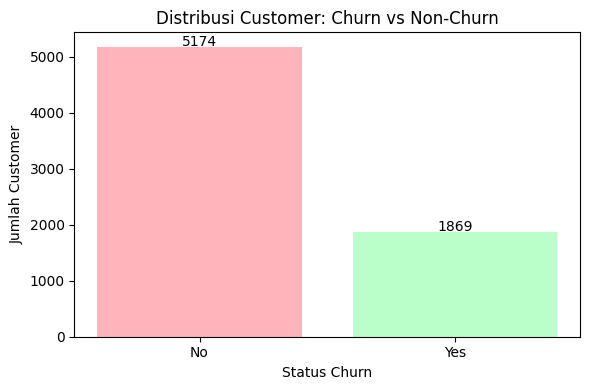

Jumlah customer Churn (Berhenti): 1869
Jumlah customer non Churn (Loyal): 5174
Persentase Churn: 26.54 %
Persentase non Churn: 73.46 %


In [9]:
# Hitung jumlah churn dan non-churn
churn_counts = df['Churn'].value_counts()

# Plot barchart dengan warna pastel
plt.figure(figsize=(6, 4))
plt.bar(churn_counts.index, churn_counts.values, color=['#ffb3ba', '#baffc9'])  # pastel pink & green
plt.title('Distribusi Customer: Churn vs Non-Churn')
plt.xlabel('Status Churn')
plt.ylabel('Jumlah Customer')

# Tambahkan label di atas bar
for i, val in enumerate(churn_counts.values):
    plt.text(i, val + 10, str(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Check Data Balance / Imbalance
yes = df[df['Churn'] == 'Yes'].count()[1]
print('Jumlah customer Churn (Berhenti):', yes)

no = df[df['Churn'] == 'No'].count()[1]
print('Jumlah customer non Churn (Loyal):', no)

# Cek persentase Churn yes dan no 
print('Persentase Churn:', round(yes / (yes + no) * 100, 2), '%')
print('Persentase non Churn:', round(no / (yes + no) * 100, 2), '%')

> Berdasarkan hasil analisis di atas, dapat disimpulkan bahwa **dataset bersifat imbalanced**, di mana proporsi kelas positif (customer yang churn atau berhenti) hanya sebesar 26.54%, sedangkan proporsi kelas negatif (customer yang non-churn atau loyal) mencapai 73.46%. Ketidakseimbangan ini menunjukkan bahwa jumlah customer yang tetap loyal jauh lebih besar dibandingkan dengan yang berhenti, sehingga perlu diperhatikan dalam pemodelan agar tidak terjadi bias terhadap kelas mayoritas.

## **III. Data Cleaning**

In [10]:
# Check unique in each variable
pd.set_option('display.max_colwidth', None)

item = []
for col in df.columns:
    unique_values = df[col].drop_duplicates()
    sample_size = min(5, len(unique_values))  # ambil maksimal 5 atau kurang jika tidak cukup
    sample_values = list(unique_values.sample(sample_size, replace=False).values)
    
    item.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        round((df[col].isna().sum() / len(df)) * 100, 2),
        df[col].nunique(),
        sample_values
    ])

table_unique = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
    data=item
)

table_unique

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[2621-UDNLU, 5574-NXZIU, 6963-EZQEE, 5982-PSMKW, 3978-YNKDD]"
1,gender,category,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,category,0,0.0,2,"[Yes, No]"
3,Partner,category,0,0.0,2,"[Yes, No]"
4,Dependents,category,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[28, 59, 67, 14, 13]"
6,PhoneService,category,0,0.0,2,"[No, Yes]"
7,MultipleLines,category,0,0.0,3,"[Yes, No phone service, No]"
8,InternetService,category,0,0.0,3,"[DSL, No, Fiber optic]"
9,OnlineSecurity,category,0,0.0,3,"[Yes, No internet service, No]"


In [11]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,2,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,No,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,5901,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


#### **1. Pengecekan Data Duplikat**

In [12]:
print('Jumlah data yang memiliki duplikat:', df.duplicated().sum())

Jumlah data yang memiliki duplikat: 0


#### **2. Pengecekan Missing Values**

In [13]:
# null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> Tidak ada missing values pada dataset

#### **3. Pengecekan Tipe Data dan Invalid Data**

- **Pengecekan dan Handling Data pada Variable Tenure**

In [14]:
# Melihat Nilai Unique pada Tenure
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [15]:
# Menampilkan jumlah pelanggan yg memiliki tenure = 0
print((df['tenure'] == 0).sum())

11


Ditemukan 11 baris data dengan `tenure = 0`, yang dapat diinterpretasikan sebagai berikut:

1. `tenure = 0` menunjukkan bahwa pelanggan **baru saja mendaftar** (belum genap sebulan berlangganan).
2. Namun, jika `MonthlyCharges` sudah terisi, maka sistem kemungkinan telah **menetapkan biaya langganan**, walaupun pelanggan belum menyelesaikan bulan pertamanya.

Untuk memperkuat interpretasi tersebut, kita analisis beberapa variabel pendukung yaitu 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod'

In [16]:
# Menampilkan jumlah pelanggan yg memiliki tenure = 0
print((df['TotalCharges'] == 0).sum())

0


In [17]:
# Analisis beberapa variable pendukung
df[df['tenure'] == 0][['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod']]


,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod
488,0,52.55,,Two year,Bank transfer (automatic)
753,0,20.25,,Two year,Mailed check
936,0,80.85,,Two year,Mailed check
1082,0,25.75,,Two year,Mailed check
1340,0,56.05,,Two year,Credit card (automatic)
3331,0,19.85,,Two year,Mailed check
3826,0,25.35,,Two year,Mailed check
4380,0,20.00,,Two year,Mailed check
5218,0,19.70,,One year,Mailed check
6670,0,73.35,,Two year,Mailed check


Ditemukan terdapat total charges yang bersisi spasi, maka perlu di analisis lebih mendalam.

In [18]:
# Analisis beberapa variable pendukung
df[df['TotalCharges'] == ' '][['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod']]

,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod
488,0,52.55,,Two year,Bank transfer (automatic)
753,0,20.25,,Two year,Mailed check
936,0,80.85,,Two year,Mailed check
1082,0,25.75,,Two year,Mailed check
1340,0,56.05,,Two year,Credit card (automatic)
3331,0,19.85,,Two year,Mailed check
3826,0,25.35,,Two year,Mailed check
4380,0,20.00,,Two year,Mailed check
5218,0,19.70,,One year,Mailed check
6670,0,73.35,,Two year,Mailed check


Kesimpulan

Pelanggan dengan `tenure = 0` kemungkinan merupakan:
1. **Pelanggan baru** yang telah mendaftar dan melakukan pembayaran pertama.
2. Data `tenure` mungkin belum terbarui karena siklus tagihan pertama belum selesai.
3. Pada Tenure `0` diketahui TotalCharges berisis `spasi` sehingga pelanggan Totalcharges yang berisi spasi memiliki Tenure 0

Dalam konteks analisis **churn**, pelanggan dengan `tenure = 0` **belum memiliki riwayat perilaku yang cukup untuk dianalisis secara bermakna**.  
Karena jumlahnya hanya **11 pelanggan**, mereka akan **dikeluarkan dari analisis** guna menghasilkan model yang lebih representatif dan akurat.

In [19]:
# Menghapus 11 pelanggan yg memiliki tenure = 0
df = df[df['tenure'] != 0].copy()

In [20]:
# Menampilkan jumlah baris sesudah dihapus
df.shape

(7032, 21)

> Dataset awal terdiri dari 7043 baris, setelah 11 pelanggan dgn tenure 0 dihapus, maka saat ini berjumlah 7032 baris

- **Pengecekan dan Handling Data pada Variable TotalCharge**

Pada info dataset, untuk kolom TotalCharge seharusnya merupakan numerik berupa data float

In [21]:
# Menampilkan Nama Kolom
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# Menampilkan tipe data TotalCharge
df['TotalCharges'].dtype

dtype('O')

Berarti kolom TotalCharges tidak berupa angka murni dan harus dikonversi dulu agar bisa dianalisis secara numerik.

In [23]:
# Ubah tipe data TotalCharges ke float, aman dari error string kosong
# errors='coerce': akan mengubah data yang tidak bisa dikonversi menjadi NaN (daripada error).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [24]:
# Menampilkan tipe data TotalCharge setelah diconversi menjadi Numerik
df['TotalCharges'].dtype

dtype('float64')

In [25]:
# Menampilkan data TotalCharge
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [26]:
# Pencekan ulang null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> Tidak terdapat missing values pada TotalCharges

#### **5. Pengecekan Outliers**

In [27]:
# Pengecekan Distribusi Data pada Variable Numerik
kolom_numerik = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Melihat statistika deskriptive untuk variable numerik
df[kolom_numerik].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


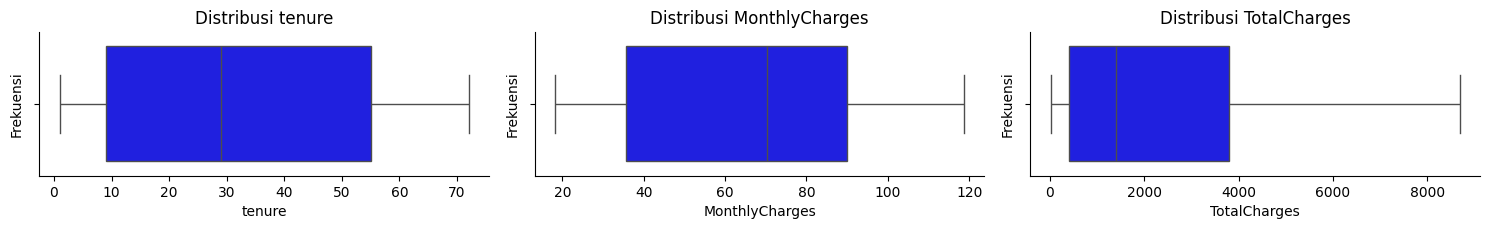

In [28]:
# Pengecekan Outliers
plt.figure(figsize=(15,6))
for i in range(len(kolom_numerik)) :
    plt.subplot(3,3,1+i)
    sns.boxplot(df[kolom_numerik[i]], orient='h', color='blue')
    sns.despine()
    plt.title(f'Distribusi {kolom_numerik[i]}')
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [29]:
# Pengecekan Outliers
for i in range(len(kolom_numerik)) :
    Q3 = df[kolom_numerik[i]].quantile(0.75)
    Q1 = df[kolom_numerik[i]].quantile(0.25)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    min_data = df[kolom_numerik[i]].min()
    max_data = df[kolom_numerik[i]].max()
    n_outlier = len(df[df[kolom_numerik[i]]>upper_bound]) + len(df[df[kolom_numerik[i]]<lower_bound])
    print(f'{i+1}.  Kolom : {kolom_numerik[i]}')
    print(f'    Jumlah Outlier = {n_outlier}')
    print(f'    Upper bound = {upper_bound:.2f} dan',f'Lower bound = {lower_bound:.2f}')

1.  Kolom : tenure
    Jumlah Outlier = 0
    Upper bound = 124.00 dan Lower bound = -60.00
2.  Kolom : MonthlyCharges
    Jumlah Outlier = 0
    Upper bound = 171.27 dan Lower bound = -45.82
3.  Kolom : TotalCharges
    Jumlah Outlier = 0
    Upper bound = 8884.67 dan Lower bound = -4688.48


SUMMARY

Berdasarkan hasil analisis boxplot terhadap ketiga variabel numerik `(tenure, MonthlyCharges, dan TotalCharges)`, **tidak ditemukan nilai yang berada di luar batas bawah dan batas atas (outlier)**. Nilai-nilai pada masing-masing variabel masih berada dalam **rentang yang wajar**, sehingga tidak diperlukan penanganan lanjutan terhadap outlier untuk data ini.

#### **6. Pengecekan Features** 
- MultipleLines

- OnlineSecurity

- OnlineBackup

- DeviceProtection

- TechSupport

- StreamingTV

- StreamingMovies

Pada Fitur tersebut value pada setiap kolom bukan hanya terdapat `Yes` dan `No` tetapi terdapat value lain seperti `No Phone Service` dan `No Internet Service`, mari kita analisis perkolom apa hal tersebut relevan saat melakukan intrepertasi data, jika tidak mari kita ubah data menjadi hanya 2 value saja yaitu `Yes` dan `No`

##### **MultipleLines**

In [30]:
df['MultipleLines'].unique()

['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']

Dalam konteks data telekomunikasi, untuk kolom dengan nilai:

```
[No phone service, Yes, No]
```

* **"No phone service"** secara eksplisit berarti pelanggan **tidak memiliki layanan telepon sama sekali**.
* Sementara **"No"** biasanya berarti **pelanggan memiliki layanan telepon, tapi tidak menggunakan fitur tertentu** (misalnya, tidak menggunakan layanan multi-line).
* **"Yes"** berarti fitur tersebut **digunakan**.

**Apakah "No phone service" bisa diganti dengan "No"?**

**Jawaban: Tidak.**
Mengganti "No phone service" menjadi "No" akan **mengaburkan makna sebenarnya** dan menyebabkan **loss of information**.

Kenapa tidak perlu diubah?

* Karena "No phone service" dan "No" mengandung **informasi yang berbeda**.
* Jika diubah ke "No", Anda menyamakan pelanggan **yang tidak punya layanan sama sekali** dengan pelanggan yang punya layanan tetapi **tidak mengaktifkan fitur tertentu**.
* Dalam analisis (misalnya prediksi churn), perbedaan ini bisa signifikan.

**Kesimpulan:**
**"No phone service" relevan dan sebaiknya tidak diganti menjadi "No"**, karena memiliki makna berbeda yang penting untuk analisis data dan model machine learning.

---


##### **OnlineSecurity**

In [31]:
df['OnlineSecurity'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Dalam konteks kolom **`OnlineSecurity`** dengan nilai:

```
[No internet service, Yes, No]
```
*Mengganti "No internet service" menjadi "No" – Disarankan tidak perlu?**

Karena:

* **"No internet service" ≠ "No"**

  * "No" = tidak memakai OnlineSecurity **meskipun bisa.**
  * "No internet service" = **tidak bisa memakai** OnlineSecurity karena **tidak ada layanan internet.**
* Mengganti "No internet service" menjadi "No" akan menyebabkan **kehilangan konteks penting** yang mungkin **mempengaruhi hasil analisis atau model prediksi**.
* Misalnya, untuk prediksi churn, pelanggan tanpa internet mungkin memiliki perilaku berbeda dari pelanggan dengan internet tapi tidak pakai OnlineSecurity.

Kesimpulan:

**"No internet service" sangat relevan** dan **disarankan tidak diganti menjadi "No"**, karena:

* Memiliki **makna yang berbeda**.
* Memberikan **informasi penting** tentang akses pelanggan terhadap fitur digital.
* Membantu model prediktif membedakan perilaku berdasarkan ketersediaan layanan internet.
---


##### **TechSupport**

In [32]:
df['TechSupport'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

pada kolom **`TechSupport`** dengan nilai:

```
[No internet service, Yes, No]
```

Mari kita bahas secara spesifik apakah nilai **"No internet service"** ini **relevan**, dan **kenapa tidak boleh diganti menjadi "No"**.

---
**Kenapa Tidak Boleh Ubah "No internet service" Menjadi "No"?**

Karena:

* **Maknanya sangat berbeda**:

  * **"No"** → pelanggan **punya internet**, tapi **memilih tidak menggunakan** TechSupport.
  * **"No internet service"** → pelanggan **tidak punya internet sama sekali**, jadi **tidak mungkin** pakai TechSupport.
* Menggabungkannya akan menyebabkan **hilangnya informasi penting** tentang ketersediaan layanan.
* Dalam **machine learning** atau **analisis churn**, pelanggan tanpa internet mungkin punya perilaku yang berbeda (misalnya: lebih kecil kemungkinan churn karena sudah sangat terbatas dalam layanan).

Kesimpulan:

> **"No internet service" pada kolom `TechSupport` adalah nilai yang relevan dan TIDAK boleh disamakan dengan "No".**

* Artinya berbeda secara **logis** dan **fungsional**.
* Memberikan **informasi penting untuk analisis dan pemodelan**.
* Sebaiknya dibiarkan sebagai kategori terpisah saat encoding.
---


##### **DeviceProtection**

In [33]:
df['DeviceProtection'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Dalam kolom **`DeviceProtection`** dengan isi nilai:

```
[No internet service, Yes, No]
```

Anda ingin tahu apakah nilai **"No internet service"** itu **relevan**, dan **kenapa tidak boleh diubah menjadi "No"**.

**Kenapa Tidak Boleh Mengubah "No internet service" Menjadi "No"?**

1. **Maknanya berbeda:**

   * "No" → pelanggan **bisa pakai layanan** DeviceProtection, tapi **memilih tidak**.
   * "No internet service" → pelanggan **tidak punya internet**, jadi **tidak bisa pakai layanan** itu.

2. **Informasi penting bisa hilang:**

   * Dengan mengubahnya menjadi "No", Anda akan **menyamakan dua kelompok berbeda** — yang tidak bisa akses layanan dan yang menolak layanan — padahal ini penting untuk analisis.

3. **Berpengaruh pada analisis dan model:**

   * Dalam prediksi **churn**, pelanggan yang tidak memiliki internet bisa jadi memiliki **perilaku yang sangat berbeda** dibanding yang punya internet tapi tidak pakai DeviceProtection.

**Kesimpulan:**

> **"No internet service" adalah nilai yang relevan dalam kolom `DeviceProtection` dan tidak boleh diganti menjadi "No".**

Karena:

* Artinya berbeda secara konteks dan logika.
* Penting untuk analisis perilaku dan model prediktif.
* Menggabungkan nilai ini dengan "No" akan menurunkan kualitas informasi dalam data.
---


##### **StreamingTV**

In [34]:
df['StreamingTV'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Pada kolom **`StreamingTV`** dengan nilai:

```
[No internet service, Yes, No]
```

Mari kita bahas apakah nilai **"No internet service"** relevan, dan kenapa **tidak boleh Anda ubah menjadi "No"**.

**Kenapa Tidak Boleh Mengganti "No internet service" Menjadi "No"?**

1. **Maknanya BEDA**:

   * `"No"` berarti pelanggan **punya akses**, tapi **tidak menggunakan layanan**.
   * `"No internet service"` berarti **tidak ada akses sama sekali**, jadi **tidak mungkin pakai** layanan Streaming TV.

2. **Menghapus informasi penting**:

   * Dengan mengubah ke "No", Anda **menyamakan dua kondisi yang sangat berbeda**:

     * pelanggan yang **bisa tapi tidak pakai**, dan
     * pelanggan yang **tidak bisa sama sekali**.

3. **Berpengaruh besar dalam analisis & machine learning**:

   * Misalnya, jika Anda ingin tahu apa yang membuat pelanggan churn:

     * Pelanggan tanpa internet **tidak akan mempertimbangkan** layanan seperti StreamingTV.
     * Pelanggan dengan internet yang tidak memakai StreamingTV bisa jadi **target promosi**.

**Kesimpulan:**

> **"No internet service" pada kolom `StreamingTV` adalah nilai yang relevan dan tidak boleh diubah menjadi "No".**

* Artinya sangat berbeda dan berpengaruh pada kualitas analisis.
* Mengganti nilai ini akan menyebabkan **loss of information** dan bisa **membingungkan model prediktif**.

---


##### **StreamingMovies**

In [35]:
df['StreamingMovies'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Anda ingin tahu apakah **"No internet service"** itu **relevan**, dan **mengapa tidak seharusnya diubah menjadi "No"**. Mari kita analisis secara logis dan teknis.
**Kenapa TIDAK BOLEH Mengubah "No internet service" Menjadi "No"?**

1. **Maknanya berbeda total:**

   * `"No"` artinya pelanggan **punya internet tapi tidak pakai** layanan StreamingMovies.
   * `"No internet service"` artinya pelanggan **tidak punya akses internet**, sehingga **tidak bisa pakai layanan itu**.

2. **Akan menyebabkan data menjadi bias atau salah tafsir:**

   * Jika Anda ubah semuanya ke `"No"`, Anda akan **kehilangan informasi penting tentang keterbatasan akses pelanggan**.
   * Ini bisa menyebabkan model prediksi churn atau analitik menjadi **tidak akurat**, karena semua pelanggan seolah-olah punya akses internet.

3. **Mengurangi kemampuan model memahami konteks pelanggan:**

   * Pelanggan yang **tidak punya internet** kemungkinan memiliki perilaku sangat berbeda dibanding yang **punya internet tapi tidak memakai layanan tertentu**.
   * Model perlu tahu perbedaan ini agar bisa belajar dengan benar.
**Kesimpulan Akhir:**

> **"No internet service" adalah nilai yang relevan dalam kolom `StreamingMovies`, dan tidak boleh Anda ubah menjadi "No".**

Karena:

* Maknanya sangat berbeda.
* Penting untuk akurasi analisis dan machine learning.
* Menyediakan informasi penting tentang kondisi pelanggan yang **tidak bisa mengakses layanan**, bukan hanya tidak menggunakannya.
---

CEK

In [36]:
df['TotalCharges'].sum()

np.float64(16056168.700000001)

In [37]:
total_keseluruhan = round(df['TotalCharges'].sum(), 2)
print("Total keseluruhan dari TotalCharges: $", total_keseluruhan)

Total keseluruhan dari TotalCharges: $ 16056168.7


In [38]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
import pandas as pd

# Tabulasi silang antara PhoneService dan InternetService
perbandingan = pd.crosstab(df['PhoneService'], df['InternetService'])
print(perbandingan)


InternetService   DSL  Fiber optic    No
PhoneService                            
No                680            0     0
Yes              1736         3096  1520


In [40]:
# Buat flag biner: True kalau pakai layanan, False kalau tidak
phone = df['PhoneService'] == 'Yes'
internet = df['InternetService'] != 'No'

# Hitung kombinasi
keduanya = ((phone) & (internet)).sum()
hanya_phone = ((phone) & (~internet)).sum()
hanya_internet = ((~phone) & (internet)).sum()
tidak_dua_duanya = ((~phone) & (~internet)).sum()

# Total pelanggan
total = len(df)

# Tampilkan hasil
print(f"Pakai keduanya         : {keduanya} ({keduanya/total:.2%})")
print(f"Hanya PhoneService     : {hanya_phone} ({hanya_phone/total:.2%})")
print(f"Hanya InternetService  : {hanya_internet} ({hanya_internet/total:.2%})")
print(f"Tidak dua-duanya       : {tidak_dua_duanya} ({tidak_dua_duanya/total:.2%})")

Pakai keduanya         : 4832 (68.71%)
Hanya PhoneService     : 1520 (21.62%)
Hanya InternetService  : 680 (9.67%)
Tidak dua-duanya       : 0 (0.00%)


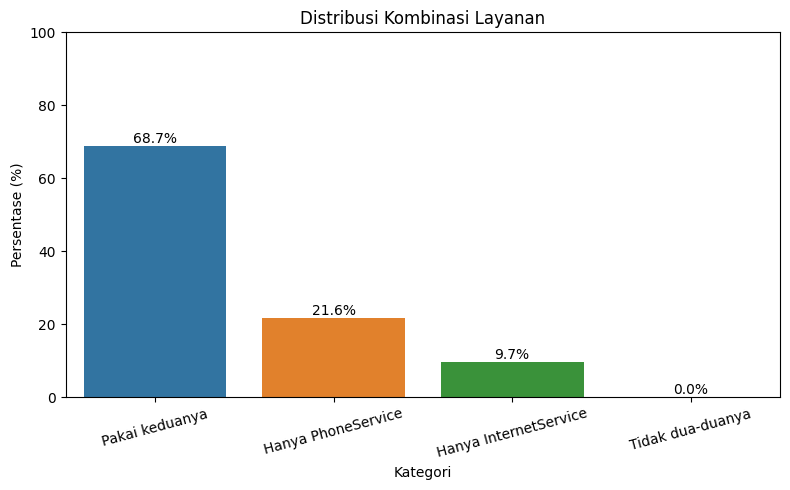

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
labels = ['Pakai keduanya', 'Hanya PhoneService', 'Hanya InternetService', 'Tidak dua-duanya']
counts = [keduanya, hanya_phone, hanya_internet, tidak_dua_duanya]
percents = [(x / total * 100) for x in counts]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Buat plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=labels, y=percents, palette=colors, ax=ax)

# Tambahkan label persen
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Judul dan label
ax.set_title('Distribusi Kombinasi Layanan')
ax.set_ylabel('Persentase (%)')
ax.set_xlabel('Kategori')
ax.set_ylim(0, 100)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

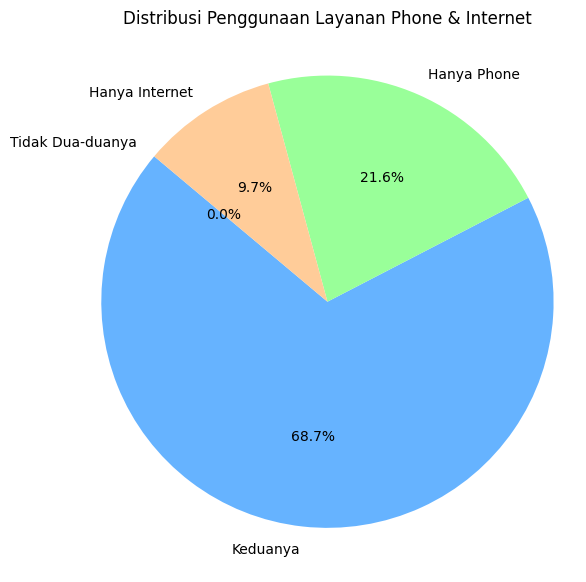

In [42]:
import matplotlib.pyplot as plt

# Buat flag biner untuk penggunaan layanan
phone = df['PhoneService'] == 'Yes'
internet = df['InternetService'] != 'No'

# Hitung kombinasi
keduanya = ((phone) & (internet)).sum()
hanya_phone = ((phone) & (~internet)).sum()
hanya_internet = ((~phone) & (internet)).sum()
tidak_dua_duanya = ((~phone) & (~internet)).sum()

# Siapkan data dan label untuk pie chart
labels = ['Keduanya', 'Hanya Phone', 'Hanya Internet', 'Tidak Dua-duanya']
values = [keduanya, hanya_phone, hanya_internet, tidak_dua_duanya]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'])
plt.title('Distribusi Penggunaan Layanan Phone & Internet')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [43]:
df['MultipleLines'].unique()

['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']

In [44]:
df[['PhoneService','MultipleLines']].sample(10)

,PhoneService,MultipleLines
2600,Yes,No
5311,Yes,No
1225,No,No phone service
6851,Yes,Yes
5905,Yes,No
3373,Yes,Yes
2877,Yes,Yes
3265,Yes,No
183,Yes,No
913,Yes,No


In [45]:
# Hitung total pelanggan
total = len(df)

# PhoneService
phone_yes = (df['PhoneService'] == 'Yes').sum()
phone_no = (df['PhoneService'] == 'No').sum()
print(f"PhoneService = Yes               : {phone_yes} ({phone_yes/total:.2%})")
print(f"PhoneService = No                : {phone_no} ({phone_no/total:.2%})")

# MultipleLines (hanya untuk pelanggan dengan PhoneService = Yes)
ml_df = df[df['PhoneService'] == 'Yes']
ml_total = len(ml_df)

ml_yes = (ml_df['MultipleLines'] == 'Yes').sum()
ml_no = (ml_df['MultipleLines'] == 'No').sum()
ml_nophone = (df['MultipleLines'] == 'No phone service').sum()

print(f"\nMultipleLines (dari {ml_total} pelanggan dengan PhoneService = Yes):")
print(f"  Yes                            : {ml_yes} ({ml_yes/ml_total:.2%})")
print(f"  No                             : {ml_no} ({ml_no/ml_total:.2%})")

# Khusus pelanggan dengan PhoneService = No
print(f"\nMultipleLines = No phone service : {ml_nophone} ({ml_nophone/total:.2%})")

PhoneService = Yes               : 6352 (90.33%)
PhoneService = No                : 680 (9.67%)

MultipleLines (dari 6352 pelanggan dengan PhoneService = Yes):
  Yes                            : 2967 (46.71%)
  No                             : 3385 (53.29%)

MultipleLines = No phone service : 680 (9.67%)


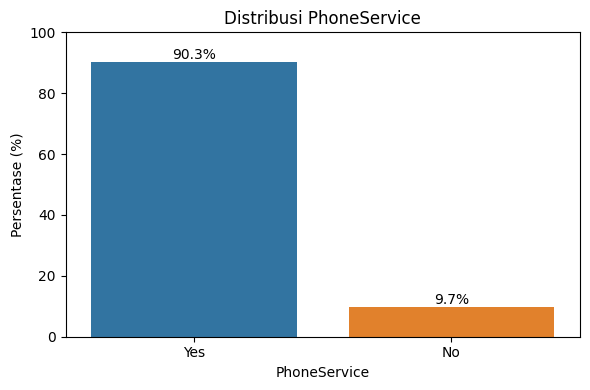

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data PhoneService
labels = ['Yes', 'No']
counts = [phone_yes, phone_no]
percents = [(x / total) * 100 for x in counts]
colors = ['#1f77b4', '#ff7f0e']  # biru, oranye

# Bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=labels, y=percents, palette=colors)

# Tambah label persen di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.title('Distribusi PhoneService')
plt.ylabel('Persentase (%)')
plt.xlabel('PhoneService')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

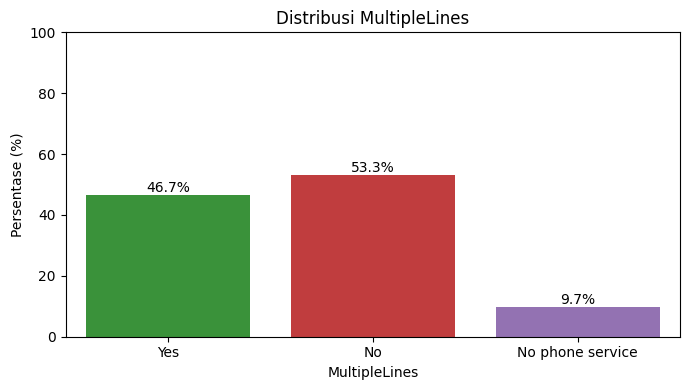

In [47]:
# Data MultipleLines (khusus PhoneService = Yes + No phone service)
ml_labels = ['Yes', 'No', 'No phone service']
ml_counts = [ml_yes, ml_no, ml_nophone]
ml_percents = [
    (ml_yes / ml_total) * 100, 
    (ml_no / ml_total) * 100, 
    (ml_nophone / total) * 100
]
colors = ['#2ca02c', '#d62728', '#9467bd']  # hijau, merah, ungu

# Bar chart MultipleLines
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=ml_labels, y=ml_percents, palette=colors)

# Tambah label persen di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.title('Distribusi MultipleLines')
plt.ylabel('Persentase (%)')
plt.xlabel('MultipleLines')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [48]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [49]:
# LAYANAN INTERNET
# Hitung total
total = len(df)

# Hitung per kategori
internet_dsl = (df['InternetService'] == 'DSL').sum()
internet_fiber = (df['InternetService'] == 'Fiber optic').sum()
internet_none = (df['InternetService'] == 'No').sum()

# Tampilkan hasil
print(f"InternetService = DSL         : {internet_dsl} ({internet_dsl/total:.2%})")
print(f"InternetService = Fiber optic : {internet_fiber} ({internet_fiber/total:.2%})")
print(f"InternetService = No          : {internet_none} ({internet_none/total:.2%})")


InternetService = DSL         : 2416 (34.36%)
InternetService = Fiber optic : 3096 (44.03%)
InternetService = No          : 1520 (21.62%)


In [50]:
# Hitung total pelanggan
total = len(df)

# InternetService
internet_fiber = (df['InternetService'] == 'Fiber optic').sum()
internet_dsl = (df['InternetService'] == 'DSL').sum()
internet_none = (df['InternetService'] == 'No').sum()

print(f"InternetService = Fiber optic    : {internet_fiber} ({internet_fiber/total:.2%})")
print(f"InternetService = DSL            : {internet_dsl} ({internet_dsl/total:.2%})")
print(f"InternetService = No             : {internet_none} ({internet_none/total:.2%})")

# Subset pelanggan yang punya InternetService (bukan 'No')
internet_df = df[df['InternetService'] != 'No']
internet_total = len(internet_df)

# Fitur turunan
features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for feature in features:
    yes_count = (internet_df[feature] == 'Yes').sum()
    no_count = (internet_df[feature] == 'No').sum()
    no_service_count = (df[feature] == 'No internet service').sum()
    
    print(f"\n{feature} (dari {internet_total} pelanggan dengan InternetService):")
    print(f"  Yes                            : {yes_count} ({yes_count/internet_total:.2%})")
    print(f"  No                             : {no_count} ({no_count/internet_total:.2%})")
    print(f"{feature} = No internet service     : {no_service_count} ({no_service_count/total:.2%})")

InternetService = Fiber optic    : 3096 (44.03%)
InternetService = DSL            : 2416 (34.36%)
InternetService = No             : 1520 (21.62%)

OnlineSecurity (dari 5512 pelanggan dengan InternetService):
  Yes                            : 2015 (36.56%)
  No                             : 3497 (63.44%)
OnlineSecurity = No internet service     : 1520 (21.62%)

OnlineBackup (dari 5512 pelanggan dengan InternetService):
  Yes                            : 2425 (43.99%)
  No                             : 3087 (56.01%)
OnlineBackup = No internet service     : 1520 (21.62%)

DeviceProtection (dari 5512 pelanggan dengan InternetService):
  Yes                            : 2418 (43.87%)
  No                             : 3094 (56.13%)
DeviceProtection = No internet service     : 1520 (21.62%)

TechSupport (dari 5512 pelanggan dengan InternetService):
  Yes                            : 2040 (37.01%)
  No                             : 3472 (62.99%)
TechSupport = No internet service     : 1520 

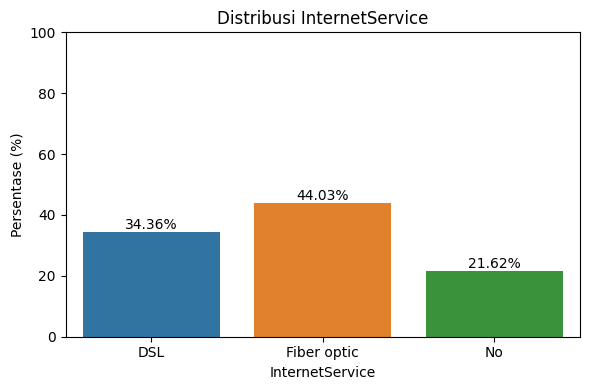

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Warna baru
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # biru, oranye, hijau

# Hitung distribusi InternetService
internet_counts = df['InternetService'].value_counts()
internet_percent = (internet_counts / len(df)) * 100

plt.figure(figsize=(6,4))
ax = sns.barplot(x=internet_percent.index, y=internet_percent.values, palette=colors)

# Tambahkan label persen di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribusi InternetService')
plt.ylabel('Persentase (%)')
plt.xlabel('InternetService')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


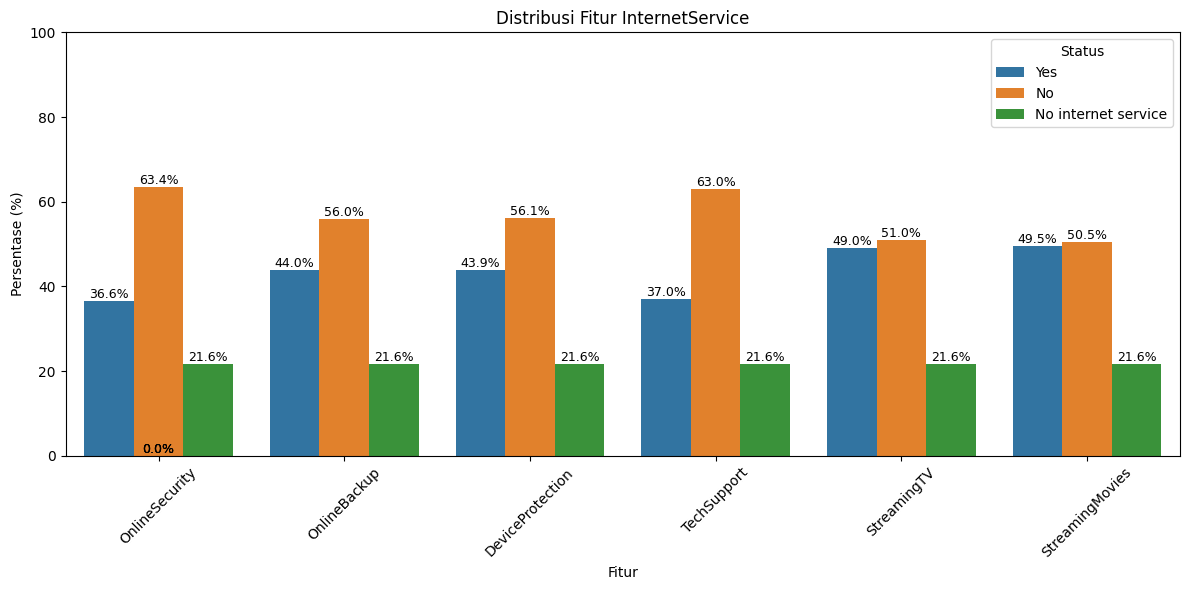

In [52]:
import pandas as pd

# Fitur turunan
features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
results = []

# Filter pelanggan yang punya InternetService
internet_df = df[df['InternetService'] != 'No']
internet_total = len(internet_df)

for feature in features:
    yes_count = (internet_df[feature] == 'Yes').sum()
    no_count = (internet_df[feature] == 'No').sum()
    no_service_count = (df[feature] == 'No internet service').sum()

    results.extend([
        {'Feature': feature, 'Status': 'Yes', 'Percent': yes_count / internet_total * 100},
        {'Feature': feature, 'Status': 'No', 'Percent': no_count / internet_total * 100},
        {'Feature': feature, 'Status': 'No internet service', 'Percent': no_service_count / len(df) * 100}
    ])

# Buat DataFrame
viz_df = pd.DataFrame(results)

# Warna konsisten
status_palette = {
    'Yes': '#1f77b4',               # biru
    'No': '#ff7f0e',                # oranye
    'No internet service': '#2ca02c'  # hijau
}

plt.figure(figsize=(12,6))
ax = sns.barplot(data=viz_df, x='Feature', y='Percent', hue='Status', palette=status_palette)

# Tambahkan label persen di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title('Distribusi Fitur InternetService')
plt.ylabel('Persentase (%)')
plt.xlabel('Fitur')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

## **IV. Data Analysis**

##### **1. Pengecekan Korelasi Numerikal Fitur**

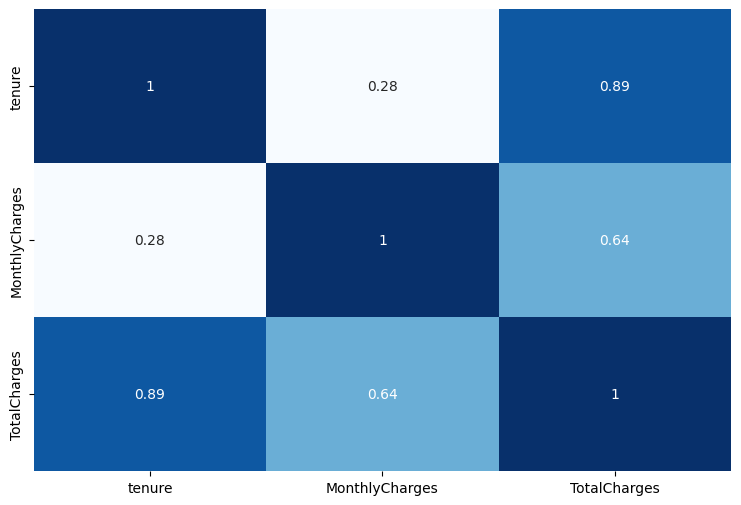

In [53]:
# Visualisasi Heatmap untuk Numerikal Fitur dengan heatmap correlation
plt.figure(figsize=(9,6))
sns.heatmap(df[kolom_numerik].corr(method='spearman'), annot=True, cbar=False, cmap='Blues')
plt.show()

SUMMARY

- Variabel numerik `tenure, MonthlyCharges, dan TotalCharges` menunjukkan hubungan **korelasi positif** satu sama lain.
- Korelasi antara `tenure` dan `TotalCharges` **sangat kuat**, dengan nilai sebesar 0.89.
- `MonthlyCharges` memiliki **korelasi sedang** terhadap `TotalCharges` (0.64) dan **korelasi rendah** terhadap `tenure` (0.28).

##### **Pengecekan Korelasi Numerikal Fitur dengan VIF**

> **VIF (Variance Inflation Factor)** mengukur seberapa besar **varians** dari koefisien regresi suatu fitur meningkat karena **adanya korelasi dengan fitur lainnya**.
>   - Semakin tinggi nilai VIF, semakin besar risiko **multikolinearitas**.
>   - Multikolinearitas bisa membuat model (terutama model linear seperti **logistic regression**) menjadi **tidak stabil dan sulit diinterpretasikan**.

In [54]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
X = sm.add_constant(X)

# target
y = df['Churn']

In [56]:
# Membuat fungsi VIF 
def vif_calc(X):
    vif = pd.DataFrame()
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X, kolom) for kolom in range (len(X.columns))]

    return vif

# Menjalankan fungsi VIF
vif_calc(X.drop(columns = 'const'))

,feature,VIF
0,tenure,6.332432
1,MonthlyCharges,3.361075
2,TotalCharges,8.079181


> **KESIMPULAN:** Meskipun **korelasi Spearman** membantu mengidentifikasi **hubungan antar fitur secara individual**, **VIF memberikan informasi tambahan terkait multikolinearitas secara keseluruhan di dalam model**. Dalam hal ini, **keduanya menunjukkan indikasi adanya keterkaitan kuat** antara variabel tenure, MonthlyCharges, dan TotalCharges.”

#### **2. Pengecekan Distribusi Data**

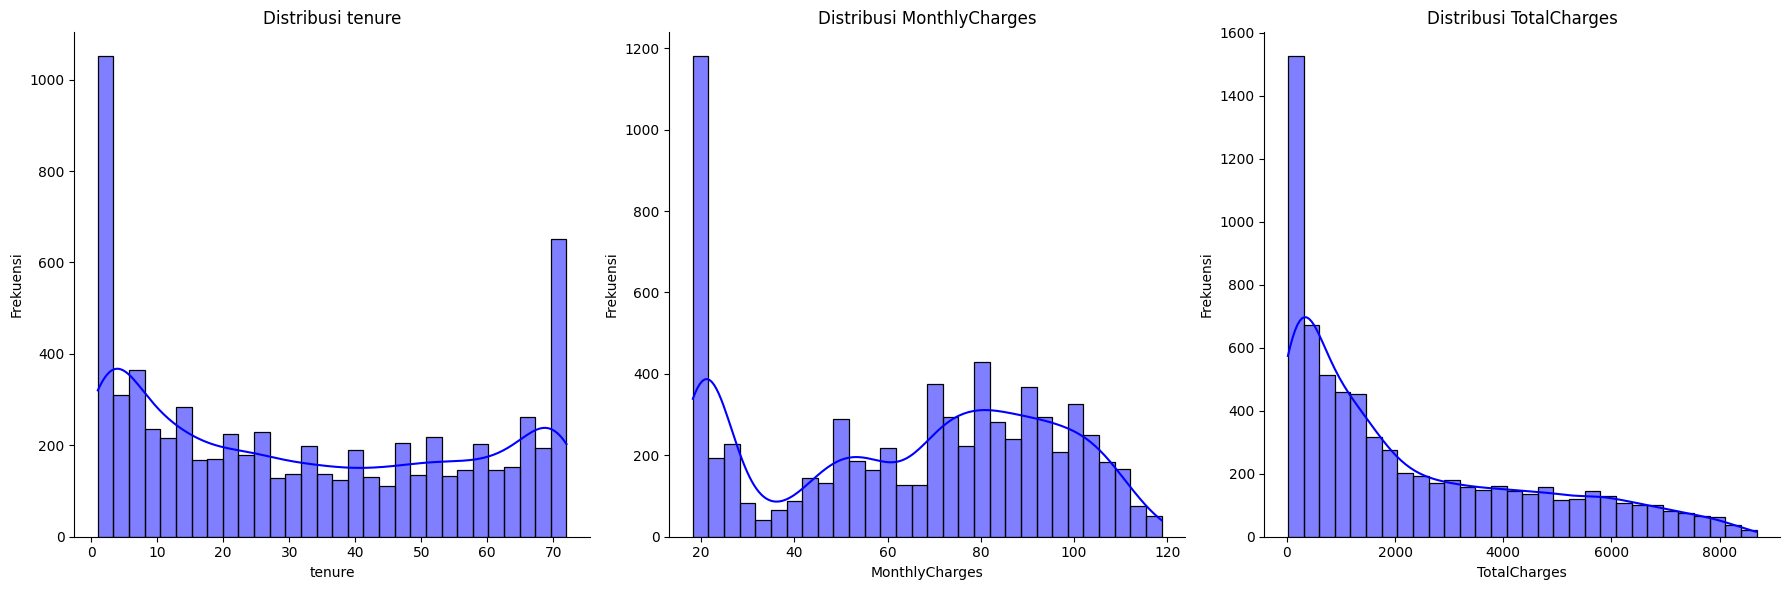

In [57]:
plt.figure(figsize=(18,6))
for i in range(len(kolom_numerik)) :
    plt.subplot(1, 3, 1+i)
    sns.histplot(df[kolom_numerik[i]], kde=True, bins=30, color='blue')
    sns.despine()
    plt.title(f'Distribusi {kolom_numerik[i]}')
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

SUMMARY

1. `Tenure`: Distribusi tenure menunjukkan pola U-shape, dengan dua kelompok utama pelanggan: yang baru bergabung dan yang sudah sangat lama berlangganan. Pelanggan dengan masa langganan menengah relatif lebih sedikit.
2. `MonthlyCharge`: Distribusi tidak simetris dan tampak bimodal (memiliki dua puncak). 
   - Puncak pertama di sekitar $20, menunjukkan banyak pelanggan yang membayar biaya bulanan rendah—kemungkinan karena hanya menggunakan layanan dasar seperti telepon/internet tanpa tambahan.
   - Puncak kedua menyebar antara $70–$100, menunjukkan kelompok pelanggan yang menggunakan lebih banyak layanan atau layanan premium.
3. `TotalCharge`: Distribusi ini sangat miring ke kanan (right-skewed). Sebagian besar pelanggan memiliki total tagihan rendah, terkonsentrasi di bawah $2000

#### **3. Perbandingan Data Senior Citizen yang memutuskan untuk Churn**

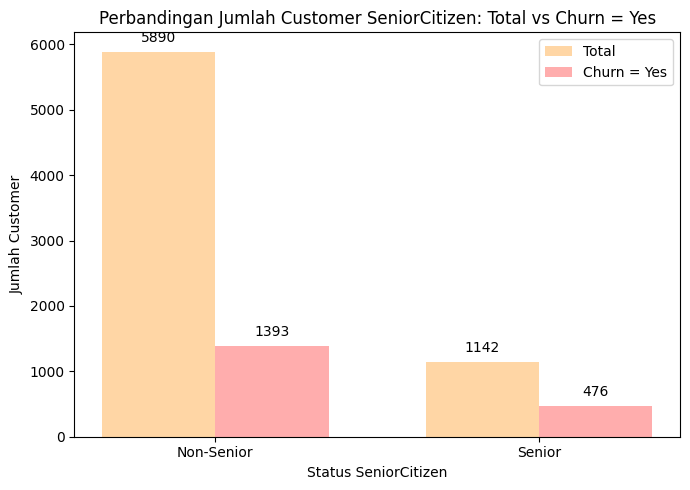

Jumlah Customer Non-Senior: 5890
Jumlah Customer Senior: 1142
Non-Senior Churn = Yes: 1393 (23.65%)
Senior Churn = Yes: 476 (41.68%)


In [58]:
# Total pelanggan berdasarkan status SeniorCitizen (No = Bukan Lansia, Yes = Lansia)
total_senior = df['SeniorCitizen'].value_counts().reindex(['No', 'Yes'])

# Pelanggan churn='Yes' berdasarkan status SeniorCitizen
churn_senior = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts().reindex(['No', 'Yes'], fill_value=0)

# Persentase churn per kategori SeniorCitizen
non_senior_total = total_senior['No']
senior_total = total_senior['Yes']
non_senior_churn = churn_senior['No']
senior_churn = churn_senior['Yes']

non_senior_churn_pct = round((non_senior_churn / non_senior_total) * 100, 2)
senior_churn_pct = round((senior_churn / senior_total) * 100, 2)

# Plot bar chart
labels = ['Non-Senior', 'Senior']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, total_senior.values, width, label='Total', color='#ffd6a5')
bars2 = ax.bar(x + width/2, churn_senior.values, width, label='Churn = Yes', color='#ffadad')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer SeniorCitizen: Total vs Churn = Yes')
ax.set_xlabel('Status SeniorCitizen')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
print(f'Jumlah Customer Non-Senior: {non_senior_total}')
print(f'Jumlah Customer Senior: {senior_total}')
print(f'Non-Senior Churn = Yes: {non_senior_churn} ({non_senior_churn_pct}%)')
print(f'Senior Churn = Yes: {senior_churn} ({senior_churn_pct}%)')


Interpretasi

* **Mayoritas pelanggan bukan warga senior** (5890 dari 7032).
* **Warga senior lebih mungkin churn** dibanding non-senior:

  * **Non-senior**: hanya **23.65%** yang churn.
  * **Senior**: **41.68%** yang churn — hampir **dua kali lipat** lebih tinggi dari non-senior.

**Kesimpulan**: Warga senior memiliki kecenderungan lebih tinggi untuk berhenti berlangganan. Ini bisa jadi sinyal bahwa mereka butuh perhatian khusus, misalnya dalam hal layanan pelanggan atau paket yang lebih sesuai kebutuhan.


#### **4. Perbandingan Data Partners yang memutuskan untuk Churn**

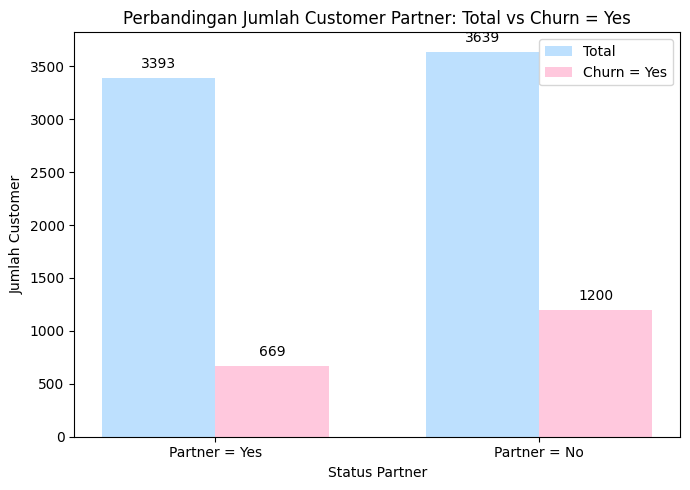

Jumlah Customer dengan Partner = Yes: 3393
Jumlah Customer dengan Partner = No : 3639
Partner = Yes, Churn = Yes: 669 (19.72%)
Partner = No , Churn = Yes: 1200 (32.98%)


In [59]:
# Total pelanggan berdasarkan status Partner (Yes/No)
total_partner = df['Partner'].value_counts().reindex(['Yes', 'No'])

# Pelanggan churn='Yes' berdasarkan status Partner
churn_partner = df[df['Churn'] == 'Yes']['Partner'].value_counts().reindex(['Yes', 'No'], fill_value=0)

# Persentase churn per kategori Partner
yes_partner_total = total_partner['Yes']
no_partner_total = total_partner['No']
yes_partner_churn = churn_partner['Yes']
no_partner_churn = churn_partner['No']

yes_partner_churn_pct = round((yes_partner_churn / yes_partner_total) * 100, 2)
no_partner_churn_pct = round((no_partner_churn / no_partner_total) * 100, 2)

# Plot bar chart
labels = ['Partner = Yes', 'Partner = No']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, total_partner.values, width, label='Total', color='#bde0fe')
bars2 = ax.bar(x + width/2, churn_partner.values, width, label='Churn = Yes', color='#ffc8dd')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer Partner: Total vs Churn = Yes')
ax.set_xlabel('Status Partner')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
print(f'Jumlah Customer dengan Partner = Yes: {yes_partner_total}')
print(f'Jumlah Customer dengan Partner = No : {no_partner_total}')
print(f'Partner = Yes, Churn = Yes: {yes_partner_churn} ({yes_partner_churn_pct}%)')
print(f'Partner = No , Churn = Yes: {no_partner_churn} ({no_partner_churn_pct}%)')


Interpretasi

* **Jumlah pelanggan terbagi cukup merata** antara yang punya pasangan (Partner = Yes) dan tidak.
* **Pelanggan tanpa pasangan lebih mungkin churn**:

  * **Dengan pasangan**: hanya **19.72%** yang churn.
  * **Tanpa pasangan**: **32.98%** yang churn.

**Kesimpulan**: Pelanggan yang tidak memiliki pasangan memiliki risiko churn yang lebih tinggi. Mungkin karena mereka lebih sensitif terhadap biaya atau kurang terikat secara emosional dengan layanan. Ini bisa jadi peluang untuk pendekatan personal atau penawaran khusus.


#### **5. Perbandingan Data Dependents yang memutuskan untuk Churn**

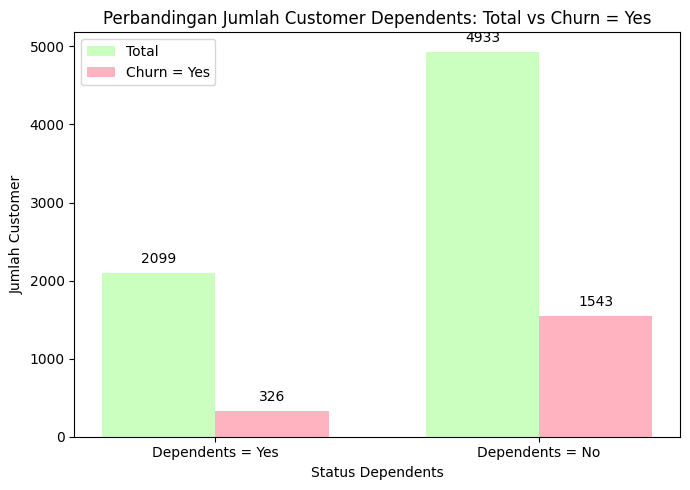

Jumlah Customer dengan Dependents = Yes: 2099
Jumlah Customer dengan Dependents = No : 4933
Dependents = Yes, Churn = Yes: 326 (15.53%)
Dependents = No , Churn = Yes: 1543 (31.28%)


In [60]:
# Total pelanggan berdasarkan status Dependents (Yes/No)
total_dependents = df['Dependents'].value_counts().reindex(['Yes', 'No'])

# Pelanggan churn='Yes' berdasarkan status Dependents
churn_dependents = df[df['Churn'] == 'Yes']['Dependents'].value_counts().reindex(['Yes', 'No'], fill_value=0)

# Persentase churn per kategori Dependents
yes_dep_total = total_dependents['Yes']
no_dep_total = total_dependents['No']
yes_dep_churn = churn_dependents['Yes']
no_dep_churn = churn_dependents['No']

yes_dep_churn_pct = round((yes_dep_churn / yes_dep_total) * 100, 2)
no_dep_churn_pct = round((no_dep_churn / no_dep_total) * 100, 2)

# Plot bar chart
labels = ['Dependents = Yes', 'Dependents = No']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, total_dependents.values, width, label='Total', color='#caffbf')
bars2 = ax.bar(x + width/2, churn_dependents.values, width, label='Churn = Yes', color='#ffb3c1')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer Dependents: Total vs Churn = Yes')
ax.set_xlabel('Status Dependents')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
print(f'Jumlah Customer dengan Dependents = Yes: {yes_dep_total}')
print(f'Jumlah Customer dengan Dependents = No : {no_dep_total}')
print(f'Dependents = Yes, Churn = Yes: {yes_dep_churn} ({yes_dep_churn_pct}%)')
print(f'Dependents = No , Churn = Yes: {no_dep_churn} ({no_dep_churn_pct}%)')


Interpretasi

* **Sebagian besar pelanggan tidak memiliki tanggungan** (lebih dari dua kali lipat dibanding yang punya tanggungan).
* **Pelanggan tanpa tanggungan jauh lebih mungkin churn**:

  * **Dengan tanggungan**: hanya **15.53%** yang churn.
  * **Tanpa tanggungan**: **31.28%** yang churn — lebih dari **dua kali lipat**.

**Kesimpulan**: Pelanggan dengan tanggungan cenderung lebih setia, mungkin karena mereka lebih bergantung pada layanan untuk keluarga. Ini menunjukkan bahwa pelanggan tanpa tanggungan perlu perhatian lebih agar tidak churn.


#### **6. Perbandingan Data Pengguna Fitur Phone Service yang memutuskan untuk Churn**

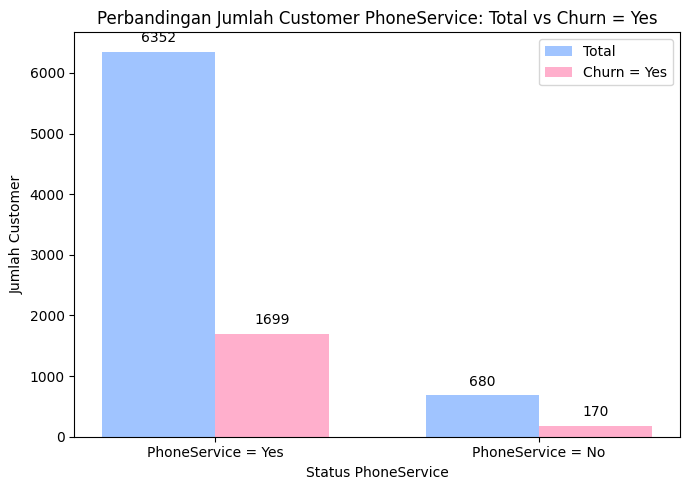

Jumlah Customer dengan PhoneService = Yes: 6352
Jumlah Customer dengan PhoneService = No : 680
PhoneService = Yes, Churn = Yes: 1699 (26.75%)
PhoneService = No , Churn = Yes: 170 (25.0%)


In [61]:
# Total pelanggan berdasarkan status PhoneService (Yes/No)
total_phoneservice = df['PhoneService'].value_counts().reindex(['Yes', 'No'])

# Pelanggan churn='Yes' berdasarkan status PhoneService
churn_phoneservice = df[df['Churn'] == 'Yes']['PhoneService'].value_counts().reindex(['Yes', 'No'], fill_value=0)

# Persentase churn per kategori PhoneService
yes_phone_total = total_phoneservice['Yes']
no_phone_total = total_phoneservice['No']
yes_phone_churn = churn_phoneservice['Yes']
no_phone_churn = churn_phoneservice['No']

yes_phone_churn_pct = round((yes_phone_churn / yes_phone_total) * 100, 2)
no_phone_churn_pct = round((no_phone_churn / no_phone_total) * 100, 2)

# Plot bar chart
labels = ['PhoneService = Yes', 'PhoneService = No']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, total_phoneservice.values, width, label='Total', color='#a0c4ff')
bars2 = ax.bar(x + width/2, churn_phoneservice.values, width, label='Churn = Yes', color='#ffafcc')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer PhoneService: Total vs Churn = Yes')
ax.set_xlabel('Status PhoneService')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
print(f'Jumlah Customer dengan PhoneService = Yes: {yes_phone_total}')
print(f'Jumlah Customer dengan PhoneService = No : {no_phone_total}')
print(f'PhoneService = Yes, Churn = Yes: {yes_phone_churn} ({yes_phone_churn_pct}%)')
print(f'PhoneService = No , Churn = Yes: {no_phone_churn} ({no_phone_churn_pct}%)')


Interpretasi

* **Sebagian besar pelanggan menggunakan layanan telepon** (lebih dari 9 dari 10 pelanggan memiliki PhoneService).
* **Pelanggan dengan atau tanpa PhoneService memiliki tingkat churn yang hampir sama**:

  * **Dengan PhoneService**: **26.75%** churn.
  * **Tanpa PhoneService**: **25.0%** churn.

**Kesimpulan**: PhoneService **tidak memiliki pengaruh besar terhadap churn**, karena selisih tingkat churn di kedua kelompok sangat kecil. Ini menunjukkan bahwa keberadaan layanan telepon bukanlah faktor utama dalam keputusan pelanggan untuk berhenti.

#### **7. Perbandingan Data Pengguna Fitur Multiple Lines yang memutuskan untuk Churn**

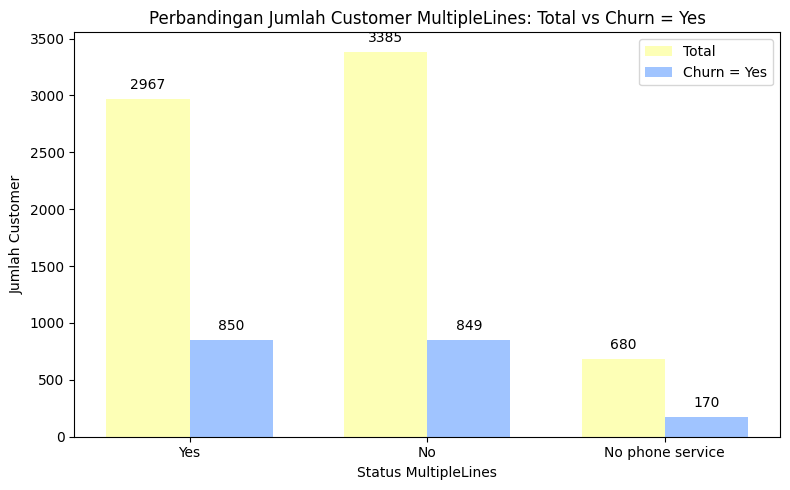

MultipleLines = Yes: Total = 2967, Churn = 850 (28.65%)
MultipleLines = No: Total = 3385, Churn = 849 (25.08%)
MultipleLines = No phone service: Total = 680, Churn = 170 (25.0%)


In [62]:
# Total pelanggan berdasarkan MultipleLines
total_lines = df['MultipleLines'].value_counts().reindex(['Yes', 'No', 'No phone service'])

# Pelanggan churn='Yes' berdasarkan MultipleLines
churn_lines = df[df['Churn'] == 'Yes']['MultipleLines'].value_counts().reindex(['Yes', 'No', 'No phone service'], fill_value=0)

# Persentase churn
lines_total = total_lines
lines_churn = churn_lines
lines_churn_pct = round((lines_churn / lines_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No phone service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, lines_total.values, width, label='Total', color='#fdffb6')
bars2 = ax.bar(x + width/2, lines_churn.values, width, label='Churn = Yes', color='#a0c4ff')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer MultipleLines: Total vs Churn = Yes')
ax.set_xlabel('Status MultipleLines')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"MultipleLines = {status}: Total = {lines_total[status]}, Churn = {lines_churn[status]} ({lines_churn_pct[status]}%)")


Interpretasi

* **Pelanggan dengan layanan multiple lines memiliki tingkat churn paling tinggi**:

  * **MultipleLines = Yes**: 28.65%
  * **MultipleLines = No**: 25.08%
  * **Tidak punya layanan telepon (No phone service)**: 25.0%

**Kesimpulan**:
Memiliki **multiple lines sedikit meningkatkan risiko churn** dibanding pelanggan lain. Namun, perbedaan tidak terlalu besar, jadi ini mungkin bukan faktor dominan. Tetap bisa jadi sinyal bahwa pelanggan dengan lebih dari satu jalur telepon perlu lebih diperhatikan atau diberi insentif agar tetap bertahan.


#### **8. Perbandingan Data Pengguna Fitur Internet Service yang memutuskan untuk Churn**

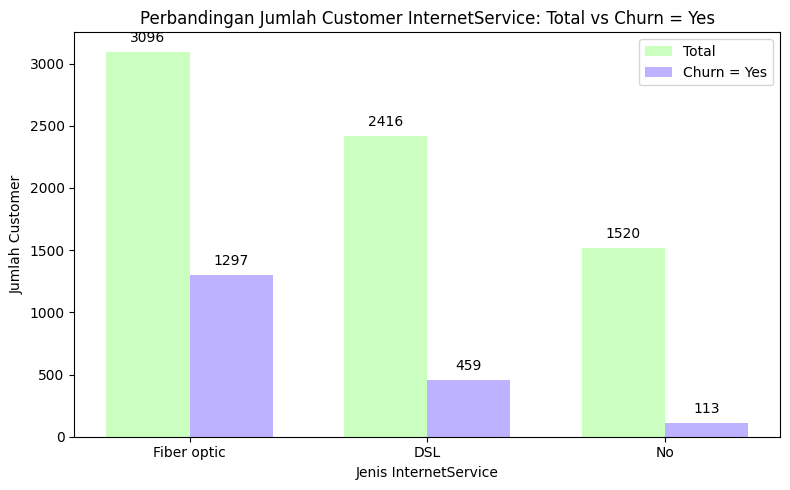

InternetService = Fiber optic: Total = 3096, Churn = 1297 (41.89%)
InternetService = DSL: Total = 2416, Churn = 459 (19.0%)
InternetService = No: Total = 1520, Churn = 113 (7.43%)


In [63]:
# Total pelanggan berdasarkan InternetService
total_internet = df['InternetService'].value_counts().reindex(['Fiber optic', 'DSL', 'No'])

# Pelanggan churn='Yes' berdasarkan InternetService
churn_internet = df[df['Churn'] == 'Yes']['InternetService'].value_counts().reindex(['Fiber optic', 'DSL', 'No'], fill_value=0)

# Persentase churn
internet_total = total_internet
internet_churn = churn_internet
internet_churn_pct = round((internet_churn / internet_total) * 100, 2)

# Plot bar chart
labels = ['Fiber optic', 'DSL', 'No']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, internet_total.values, width, label='Total', color='#caffbf')
bars2 = ax.bar(x + width/2, internet_churn.values, width, label='Churn = Yes', color='#bdb2ff')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer InternetService: Total vs Churn = Yes')
ax.set_xlabel('Jenis InternetService')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"InternetService = {status}: Total = {internet_total[status]}, Churn = {internet_churn[status]} ({internet_churn_pct[status]}%)")


Interpretasi

* **Pelanggan dengan layanan internet Fiber optic memiliki tingkat churn tertinggi**:

  * **Fiber optic**: 41.89%
  * **DSL**: 19.0%
  * **Tidak punya layanan internet**: 7.43%

**Kesimpulan**:
Pelanggan **Fiber optic jauh lebih rentan churn** dibanding yang lain — bahkan lebih dari **dua kali lipat** dibanding DSL, dan hampir **6 kali lipat** dibanding yang tidak pakai internet.
Kemungkinan karena:

* Harga Fiber optic lebih tinggi.
* Harapan pelanggan atas kualitas layanan juga lebih tinggi.

#### **9. Perbandingan Data Pengguna Fitur Online Security yang memutuskan untuk Churn**

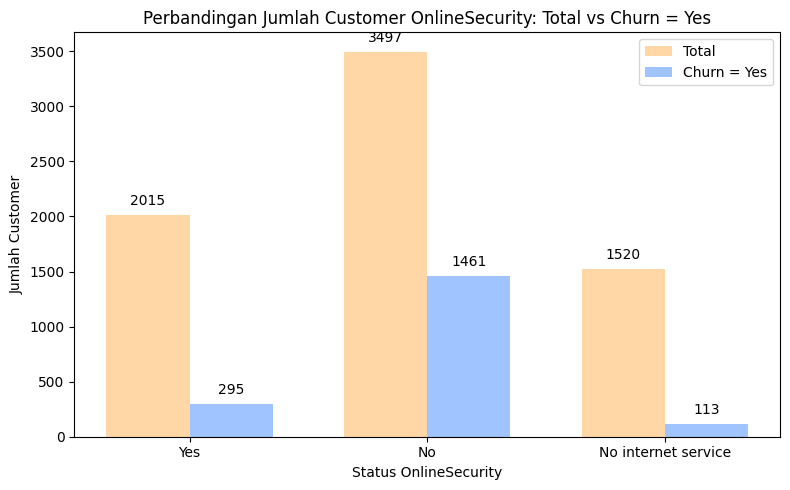

OnlineSecurity = Yes: Total = 2015, Churn = 295 (14.64%)
OnlineSecurity = No: Total = 3497, Churn = 1461 (41.78%)
OnlineSecurity = No internet service: Total = 1520, Churn = 113 (7.43%)


In [64]:
# Total pelanggan berdasarkan OnlineSecurity
total_security = df['OnlineSecurity'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan OnlineSecurity
churn_security = df[df['Churn'] == 'Yes']['OnlineSecurity'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
security_total = total_security
security_churn = churn_security
security_churn_pct = round((security_churn / security_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, security_total.values, width, label='Total', color='#ffd6a5')
bars2 = ax.bar(x + width/2, security_churn.values, width, label='Churn = Yes', color='#a0c4ff')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer OnlineSecurity: Total vs Churn = Yes')
ax.set_xlabel('Status OnlineSecurity')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"OnlineSecurity = {status}: Total = {security_total[status]}, Churn = {security_churn[status]} ({security_churn_pct[status]}%)")


Interpretasi

* **Sebagian besar pelanggan tidak menggunakan layanan OnlineSecurity** — lebih dari **1,5 kali lipat** dibanding yang menggunakannya.
* **Tingkat churn jauh lebih tinggi pada pelanggan tanpa OnlineSecurity**:

  * **Dengan OnlineSecurity**: hanya **14.64%** yang churn.
  * **Tanpa OnlineSecurity**: **41.78%** yang churn — hampir **tiga kali lipat**.
  * **Tanpa layanan internet sama sekali**: churn justru lebih rendah (**7.43%**).

**Kesimpulan**: Pelanggan **tanpa OnlineSecurity sangat rentan churn**, kemungkinan karena merasa kurang aman atau tidak puas. Memberikan atau mempromosikan layanan keamanan online bisa menjadi strategi penting untuk mempertahankan pelanggan.

#### **10. Perbandingan Data Pengguna Fitur Online Back Up yang memutuskan untuk Churn**

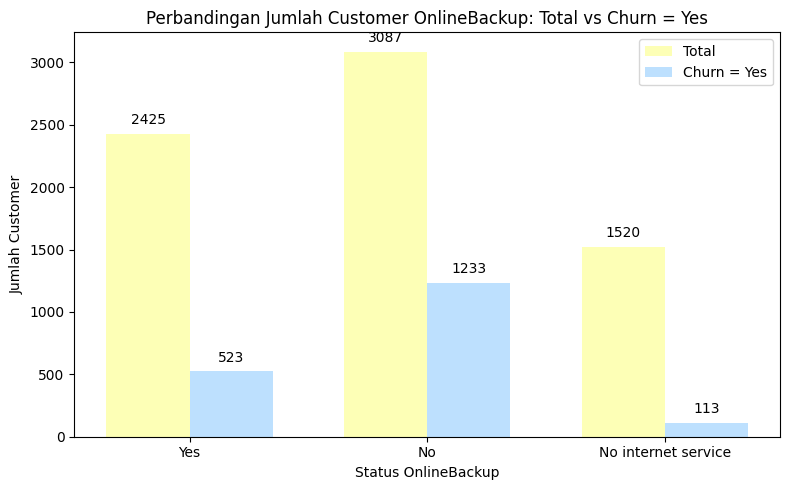

OnlineBackup = Yes: Total = 2425, Churn = 523 (21.57%)
OnlineBackup = No: Total = 3087, Churn = 1233 (39.94%)
OnlineBackup = No internet service: Total = 1520, Churn = 113 (7.43%)


In [65]:
# Total pelanggan berdasarkan OnlineBackup
total_backup = df['OnlineBackup'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan OnlineBackup
churn_backup = df[df['Churn'] == 'Yes']['OnlineBackup'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
backup_total = total_backup
backup_churn = churn_backup
backup_churn_pct = round((backup_churn / backup_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, backup_total.values, width, label='Total', color='#fdffb6')
bars2 = ax.bar(x + width/2, backup_churn.values, width, label='Churn = Yes', color='#bde0fe')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer OnlineBackup: Total vs Churn = Yes')
ax.set_xlabel('Status OnlineBackup')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"OnlineBackup = {status}: Total = {backup_total[status]}, Churn = {backup_churn[status]} ({backup_churn_pct[status]}%)")


Interpretasi

* **Lebih banyak pelanggan tidak menggunakan layanan OnlineBackup** dibanding yang menggunakannya.
* **Tingkat churn jauh lebih tinggi pada pelanggan tanpa OnlineBackup**:

  * **Dengan OnlineBackup**: **21.57%** churn.
  * **Tanpa OnlineBackup**: **39.94%** churn — hampir **dua kali lipat**.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: Pelanggan yang **tidak menggunakan OnlineBackup lebih rentan churn**, menunjukkan bahwa layanan tambahan seperti backup bisa meningkatkan loyalitas. Mendorong adopsi fitur ini bisa membantu menekan churn.


#### **11. Perbandingan Data Pengguna Device Protection yang memutuskan untuk Churn**

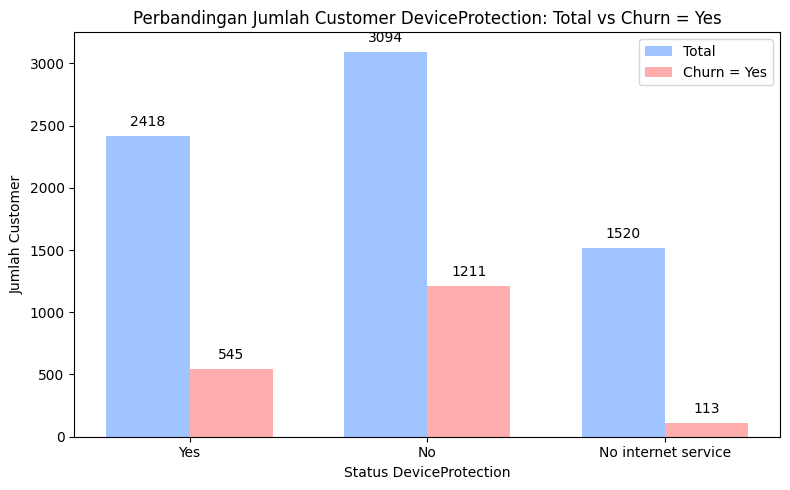

DeviceProtection = Yes: Total = 2418, Churn = 545 (22.54%)
DeviceProtection = No: Total = 3094, Churn = 1211 (39.14%)
DeviceProtection = No internet service: Total = 1520, Churn = 113 (7.43%)


In [66]:
# Total pelanggan berdasarkan DeviceProtection
total_device = df['DeviceProtection'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan DeviceProtection
churn_device = df[df['Churn'] == 'Yes']['DeviceProtection'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
device_total = total_device
device_churn = churn_device
device_churn_pct = round((device_churn / device_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, device_total.values, width, label='Total', color='#a0c4ff')
bars2 = ax.bar(x + width/2, device_churn.values, width, label='Churn = Yes', color='#ffadad')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer DeviceProtection: Total vs Churn = Yes')
ax.set_xlabel('Status DeviceProtection')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"DeviceProtection = {status}: Total = {device_total[status]}, Churn = {device_churn[status]} ({device_churn_pct[status]}%)")


Interpretasi

* **Lebih banyak pelanggan tidak menggunakan DeviceProtection** dibanding yang menggunakannya.
* **Pelanggan tanpa DeviceProtection memiliki tingkat churn yang jauh lebih tinggi**:

  * **Dengan DeviceProtection**: **22.54%** churn.
  * **Tanpa DeviceProtection**: **39.14%** churn — hampir **dua kali lipat**.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: Pelanggan **tanpa perlindungan perangkat lebih berisiko churn**, menunjukkan bahwa fitur keamanan seperti ini bisa menjadi faktor yang meningkatkan kepuasan dan retensi.

#### **12. Perbandingan Data Pengguna Fitur Tech Support yang memutuskan untuk Churn**

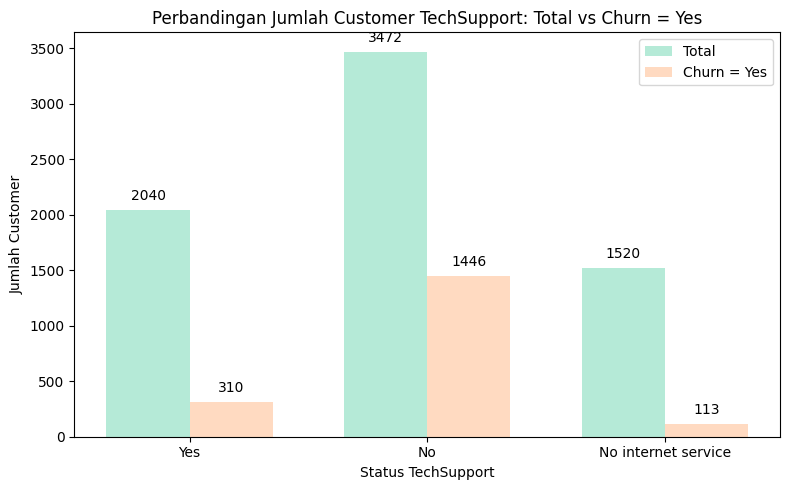

TechSupport = Yes: Total = 2040, Churn = 310 (15.2%)
TechSupport = No: Total = 3472, Churn = 1446 (41.65%)
TechSupport = No internet service: Total = 1520, Churn = 113 (7.43%)


In [67]:
# Total pelanggan berdasarkan TechSupport
total_tech = df['TechSupport'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan TechSupport
churn_tech = df[df['Churn'] == 'Yes']['TechSupport'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
tech_total = total_tech
tech_churn = churn_tech
tech_churn_pct = round((tech_churn / tech_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, tech_total.values, width, label='Total', color='#b5ead7')
bars2 = ax.bar(x + width/2, tech_churn.values, width, label='Churn = Yes', color='#ffdac1')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer TechSupport: Total vs Churn = Yes')
ax.set_xlabel('Status TechSupport')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"TechSupport = {status}: Total = {tech_total[status]}, Churn = {tech_churn[status]} ({tech_churn_pct[status]}%)")


Interpretasi

* **Sebagian besar pelanggan tidak menggunakan layanan TechSupport** — hampir **dua kali lebih banyak** dibanding yang menggunakannya.
* **Tingkat churn jauh lebih tinggi pada pelanggan tanpa TechSupport**:

  * **Dengan TechSupport**: hanya **15.2%** yang churn.
  * **Tanpa TechSupport**: **41.65%** yang churn — hampir **tiga kali lipat**.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: **Tidak adanya TechSupport berkorelasi kuat dengan churn**. Memberikan akses yang mudah ke layanan bantuan teknis bisa meningkatkan loyalitas pelanggan secara signifikan.

#### **13. Perbandingan Data Pengguna Fitur Steaming TV yang memutuskan untuk Churn**

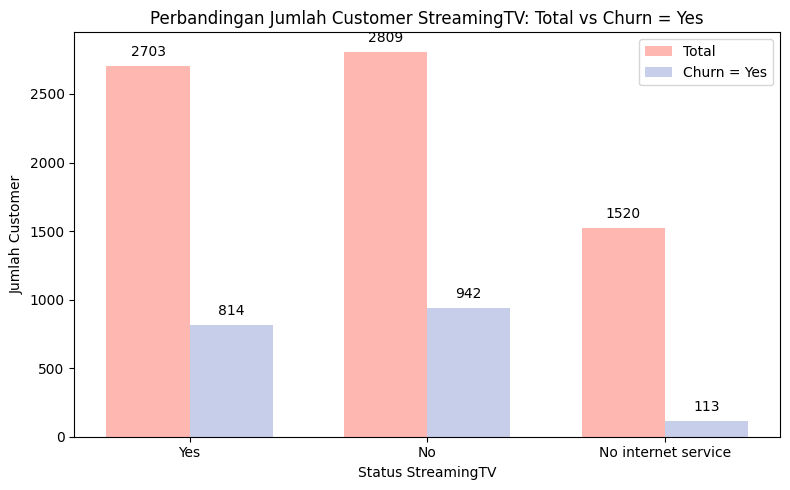

StreamingTV = Yes: Total = 2703, Churn = 814 (30.11%)
StreamingTV = No: Total = 2809, Churn = 942 (33.54%)
StreamingTV = No internet service: Total = 1520, Churn = 113 (7.43%)


In [68]:
# Total pelanggan berdasarkan StreamingTV
total_streamingtv = df['StreamingTV'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan StreamingTV
churn_streamingtv = df[df['Churn'] == 'Yes']['StreamingTV'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
streamingtv_total = total_streamingtv
streamingtv_churn = churn_streamingtv
streamingtv_churn_pct = round((streamingtv_churn / streamingtv_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, streamingtv_total.values, width, label='Total', color='#ffb7b2')
bars2 = ax.bar(x + width/2, streamingtv_churn.values, width, label='Churn = Yes', color='#c7ceea')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer StreamingTV: Total vs Churn = Yes')
ax.set_xlabel('Status StreamingTV')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"StreamingTV = {status}: Total = {streamingtv_total[status]}, Churn = {streamingtv_churn[status]} ({streamingtv_churn_pct[status]}%)")


Interpretasi

* **Jumlah pelanggan dengan dan tanpa StreamingTV hampir seimbang**.
* **Tingkat churn sedikit lebih rendah pada pelanggan yang menggunakan layanan StreamingTV**:

  * **Dengan StreamingTV**: **30.11%** churn.
  * **Tanpa StreamingTV**: **33.54%** churn — sedikit lebih tinggi.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: **StreamingTV tampaknya tidak memiliki pengaruh besar terhadap churn** — perbedaan churn antara pengguna dan non-pengguna relatif kecil. Namun, tetap ada indikasi bahwa pelanggan yang memanfaatkan layanan hiburan lebih cenderung bertahan.


#### **14. Perbandingan Data Pengguna Fitur Streaming Movies yang memutuskan untuk Churn**

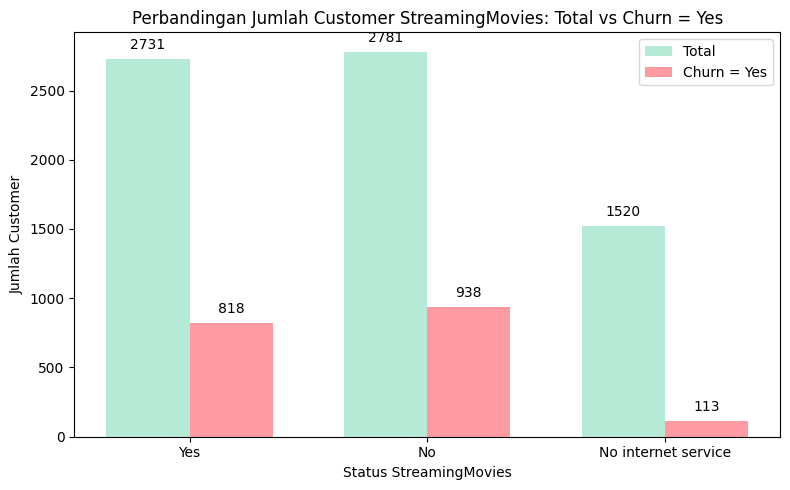

StreamingMovies = Yes: Total = 2731, Churn = 818 (29.95%)
StreamingMovies = No: Total = 2781, Churn = 938 (33.73%)
StreamingMovies = No internet service: Total = 1520, Churn = 113 (7.43%)


In [69]:
# Total pelanggan berdasarkan StreamingMovies
total_streamingmovies = df['StreamingMovies'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan StreamingMovies
churn_streamingmovies = df[df['Churn'] == 'Yes']['StreamingMovies'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
streamingmovies_total = total_streamingmovies
streamingmovies_churn = churn_streamingmovies
streamingmovies_churn_pct = round((streamingmovies_churn / streamingmovies_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, streamingmovies_total.values, width, label='Total', color='#b5ead7')
bars2 = ax.bar(x + width/2, streamingmovies_churn.values, width, label='Churn = Yes', color='#ff9aa2')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer StreamingMovies: Total vs Churn = Yes')
ax.set_xlabel('Status StreamingMovies')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"StreamingMovies = {status}: Total = {streamingmovies_total[status]}, Churn = {streamingmovies_churn[status]} ({streamingmovies_churn_pct[status]}%)")


Interpretasi

* **Jumlah pelanggan dengan dan tanpa layanan StreamingMovies hampir seimbang**.

* **Tingkat churn sedikit lebih rendah pada pelanggan yang menggunakan layanan StreamingMovies**:

  * **Dengan StreamingMovies**: **29.95%** churn.
  * **Tanpa StreamingMovies**: **33.73%** churn — sedikit lebih tinggi.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: **Layanan StreamingMovies tampaknya memiliki pengaruh kecil namun positif terhadap retensi pelanggan**. Pelanggan yang menggunakan layanan ini menunjukkan tingkat churn yang lebih rendah dibandingkan yang tidak menggunakannya. Namun, perbedaannya tidak terlalu signifikan. Sementara itu, pelanggan tanpa layanan internet tetap memiliki churn yang jauh lebih rendah, kemungkinan karena keterbatasan pilihan atau kebutuhan komunikasi dasar yang lebih kuat.


#### **15. Melakukan Uji-Statistik terhadap Fitur Numerikal**

Sebelum memulai analisis, mari gunakan uji statistik **Kolmogorov-Smirnov** untuk melihat apakah hasil distribusi untuk kolom numerik merupakan normal atau tidak normal

In [70]:
import pandas as pd
from scipy.stats import kstest

# List untuk menyimpan hasil
hasil_ks = []

# Iterasi untuk uji Kolmogorov-Smirnov di setiap kolom
for kolom in kolom_numerik:
    ks_statistic, ks_pvalue = kstest(df[kolom], 'norm')  # Distribusi normal
    hasil_ks.append({
        'Kolom': kolom,
        'KS_Statistic': ks_statistic,
        'P_Value': ks_pvalue,
        'Distribusi_Normal': 'Ya' if ks_pvalue > 0.05 else 'Tidak'
    })

# Konversi hasil ke DataFrame
df_hasil_ks = pd.DataFrame(hasil_ks)

# Tampilkan hasil dalam bentuk tabel
df_hasil_ks

,Kolom,KS_Statistic,P_Value,Distribusi_Normal
0,tenure,0.890077,0.0,Tidak
1,MonthlyCharges,1.000000,0.0,Tidak
2,TotalCharges,1.000000,0.0,Tidak


Berdasarkan hasil uji statistik Kolmogorov-Smirnov, apabila p_value > 0,05 maka data distribusi normal sedangkan pada semua kolom numerik p_value = 0,0 sehingga dapat dibuktikan bahwa semua **kolom numerik merupakan data distribusi tidak normal**.

##### **1). Analisis hubungan lama berlangganan *(tenure)* terhadap kemungkinan pelanggan melakukan churn**

> Tenure mencerminkan loyalitas. Mengetahui hubungan ini bisa membantu perusahaan menarget pelanggan baru yang lebih rawan churn.

In [71]:
# Mengubah nilai churn dari Yes: 1 dan No: 0 dengan menambah kolom baru
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [72]:
# Menghitung jumlah churn (1) dan non churn (0)
df['Churn_num'].value_counts()

Churn_num
0    5163
1    1869
Name: count, dtype: int64

Hipotesis:
- **H₀ (Hipotesis Nol)**: Tidak terdapat hubungan dalam lama berlangganan antara pelanggan yang churn dan yang tidak.
- **H₁ (Hipotesis Alternatif)**: Terdapat hubungan signifikan dalam lama berlangganan antara pelanggan yang churn dan yang tidak.

In [73]:
# Untuk melakukan pengujian dengan lebih akurat mari gunakan uji korelasi Spearman
# Korelasi Spearman
from scipy.stats import spearmanr

# Korelasi Spearman
corr, p_value = spearmanr(df['tenure'], df['Churn_num'])
print(f"Koefisien Korelasi Spearman: {corr:.2f}")
print(f"P-value: {p_value: .2f}")

Koefisien Korelasi Spearman: -0.37
P-value:  0.00


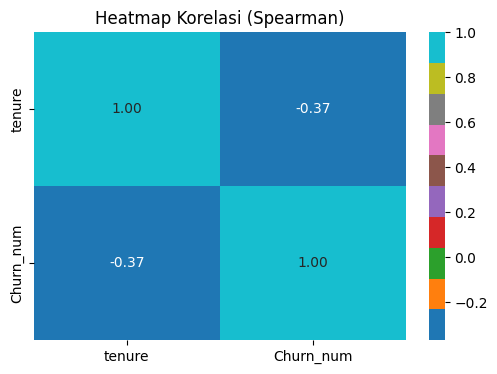

In [74]:
# Visualisasi dengan heatmap

# Hitung matriks korelasi Spearman secara manual
correlation_matrix = df[['tenure', 'Churn_num']].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='tab10', 
    fmt='.2f', 
    cbar=True
)
plt.title('Heatmap Korelasi (Spearman)')
plt.show()

Dari hasil analisis diatas, dapat disampaikan sbb:
- H0 ditolak apabila p_value < 0,05. P-value = 0.00, artinya H0 ditolak: Ada hubungan signifikan antara status churn dan lama berlangganan
- Koefisien Korelasi Spearman = -0.37:
  - Korelasi negatif menunjukkan bahwa **semakin lama pelanggan berlangganan**, **semakin kecil kemungkinan mereka untuk churn**.
  - Atau sebaliknya, **pelanggan yang baru berlangganan cenderung lebih mungkin churn**.

KESIMPULAN
- Terdapat **hubungan negatif yang signifikan secara statistik** antara lama berlangganan dan status churn. 
- Pelanggan yang sudah berlangganan **lebih lama** cenderung **lebih loyal dan tidak churn**.

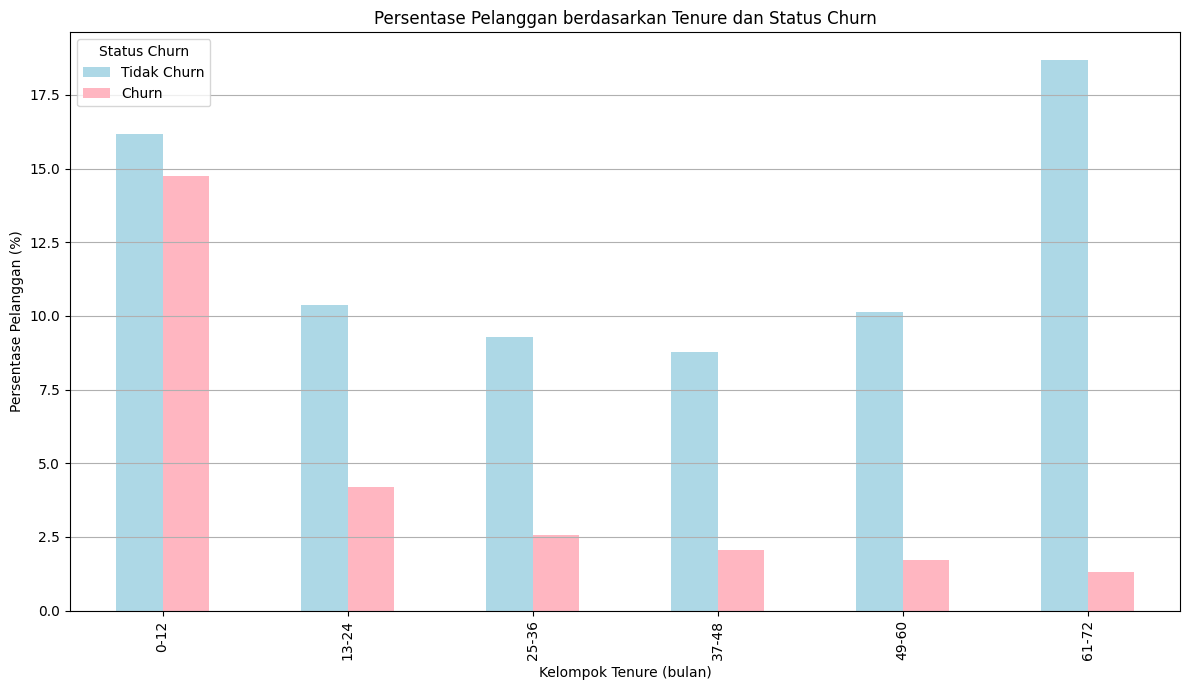

In [75]:
# Binning tenure ke dalam kelompok
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Hitung distribusi churn/non-churn per kelompok tenure
tenure_dist = df.groupby(['tenure_group', 'Churn_num']).size().unstack(fill_value=0)

# Ubah ke persentase dalam setiap kelompok tenure
tenure_percent = tenure_dist.div(tenure_dist.sum().sum(), axis=0) * 100

# Rename kolom agar lebih jelas
tenure_percent.columns = ['Tidak Churn', 'Churn']

# Plot bar vertikal dengan warna soft blue dan pink
colors = ['#ADD8E6', '#FFB6C1']  # soft blue, soft pink

tenure_percent.sort_index(ascending=True).plot(
    kind='bar',
    figsize=(12, 7),
    color=colors
)

plt.title('Persentase Pelanggan berdasarkan Tenure dan Status Churn')
plt.ylabel('Persentase Pelanggan (%)')
plt.xlabel('Kelompok Tenure (bulan)')
plt.legend(title='Status Churn', loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Grafik menunjukkan distribusi **persentase pelanggan** berdasarkan **kelompok lama berlangganan (tenure)** dan status **Churn** (berhenti berlangganan atau tidak).

- **Kelompok 0–12 bulan** memiliki tingkat churn tertinggi, hampir sebanding dengan yang tidak churn. Ini menunjukkan pelanggan baru lebih rentan untuk berhenti.
- Setelah 12 bulan, **tingkat churn menurun drastis**, sementara pelanggan yang tidak churn stabil.
- **Kelompok tenure tertinggi (61–72 bulan)** didominasi oleh pelanggan yang **tidak churn**. Artinya, **semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka untuk berhenti.**
  
**Kesimpulan**
- Pelanggan baru perlu perhatian khusus karena mereka paling berisiko untuk churn.
- Strategi retensi sebaiknya difokuskan pada fase awal langganan (0–12 bulan).

##### **2). Analisis hubungan jenis kontrak terhadap probabilitas pelanggan berhenti berlangganan *(churn)***

> Jenis kontrak (bulanan vs tahunan) adalah faktor bisnis yang bisa diubah dengan strategi pemasaran. Jika kontrak tahunan terbukti menurunkan churn, perusahaan bisa mengarahkan pelanggan ke kontrak jangka panjang.

In [76]:
# Menampilkan nilai unik dari variable Contract
df['Contract'].unique()

['Month-to-month', 'One year', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']

Karena memiliki kategori yang bersifat ordinal/logis, yaitu: *Month-to-month*, *One year*, dan *Two year* maka akan diterapkan **Ordinal Encoding**

In [77]:
# Mengubah nilai unik *Month-to-month*, *One year*, dan *Two year* menjadi 0,1,2 dengan urutan ordinal pada kolom baru
contract_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

df['Contract_encoded'] = df['Contract'].map(contract_mapping)

In [78]:
# Menampilkan nilai kolom Contract_encoded yang sudah diubah menjadi numerik
df['Contract_encoded'].head(3)

0    0
1    1
2    0
Name: Contract_encoded, dtype: category
Categories (3, int64): [0, 1, 2]

In [79]:
# Menghitung jumlah dan persentase pelanggan yang mempunyai kontrak *Month-to-month* (0), *One year* (1), dan *Two year* (2)

# Jumlah
jumlah = df['Contract_encoded'].value_counts()

# Persentase
persentase = df['Contract_encoded'].value_counts(normalize=True) * 100

#  Gabungkan dan urutkan
kontrak_stats = pd.DataFrame({
    'Jumlah': jumlah,
    'Persentase (%)': persentase.round(2)
}).sort_values(by='Jumlah', ascending=False)

# Mapping nilai Contract_encoded ke nama kontrak
mapping_kontrak = {
    0: 'Month-to-month',
    1: 'One year',
    2: 'Two year'
}

# Reset index agar Contract_encoded menjadi kolom biasa
kontrak_stats = kontrak_stats.reset_index()

# Ganti nama kolom dan isi dengan label deskriptif
kontrak_stats.rename(columns={'Contract_encoded': 'Jenis Kontrak'}, inplace=True)
kontrak_stats['Jenis Kontrak'] = kontrak_stats['Jenis Kontrak'].map(mapping_kontrak)

kontrak_stats

,Jenis Kontrak,Jumlah,Persentase (%)
0,Month-to-month,3875,55.11
1,Two year,1685,23.96
2,One year,1472,20.93


Hipotesis:
- **H₀ (Hipotesis Nol)**: Tidak terdapat hubungan antara jenis kontrak dan status churn pelanggan.
- **H₁ (Hipotesis Alternatif)**: Terdapat hubungan yang signifikan antara jenis kontrak dan status churn pelanggan.

In [80]:
# Untuk melakukan pengujian dengan lebih akurat mari gunakan uji korelasi Spearman
# Korelasi Spearman
from scipy.stats import spearmanr

# Korelasi Spearman
corr, p_value = spearmanr(df['Contract_encoded'], df['Churn_num'])
print(f"Koefisien Korelasi Spearman: {corr:.2f}")
print(f"P-value: {p_value: .2f}")

Koefisien Korelasi Spearman: -0.41
P-value:  0.00


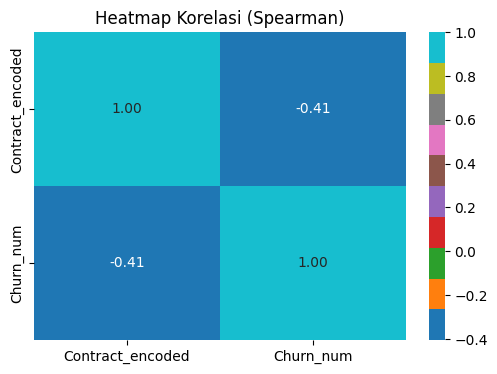

In [81]:
# Visualisasi dengan heatmap

# Hitung matriks korelasi Spearman secara manual
correlation_matrix = df[['Contract_encoded', 'Churn_num']].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='tab10', 
    fmt='.2f', 
    cbar=True
)
plt.title('Heatmap Korelasi (Spearman)')
plt.show()

Dari hasil analisis tsb, dapat disimpulkan yaitu:
- **P-value = 0.00** (lebih kecil dari 0.05) menandakan bahwa hasil ini signifikan secara statistik, sehingga kita **menolak H₀ dan menerima H₁**. 
  - Terdapat hubungan yang signifikan antara jenis kontrak dan status churn pelanggan. Dengan kata lain, jenis kontrak memang memengaruhi kemungkinan pelanggan untuk berhenti berlangganan.
- Nilai **koefisien korelasi -0.41** menunjukkan adanya **hubungan negatif sedang** antara jenis kontrak dan churn — artinya, semakin panjang atau mengikat jenis kontraknya (misalnya kontrak tahunan), maka kemungkinan pelanggan untuk churn (berhenti) cenderung lebih rendah.



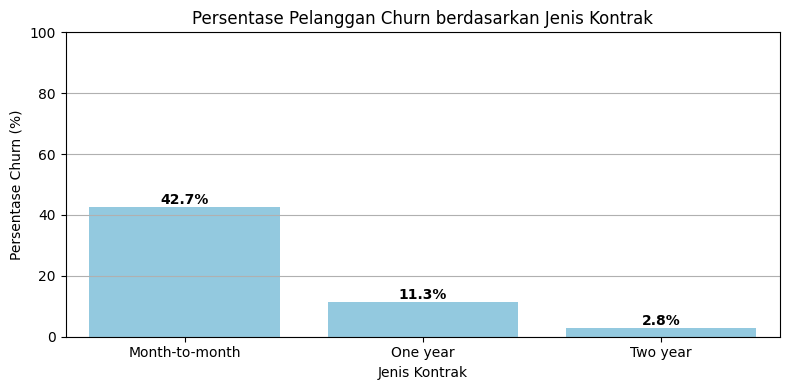

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah churn = Yes untuk tiap jenis kontrak
contract_churn = df[df['Churn'] == 'Yes'].groupby('Contract').size()

# Hitung total pelanggan untuk tiap jenis kontrak
contract_total = df.groupby('Contract').size()

# Hitung persentase churn untuk tiap jenis kontrak
churn_percent = (contract_churn / contract_total * 100).reset_index(name='Churn_percent')

# Buat bar chart
plt.figure(figsize=(8, 4))
barplot = sns.barplot(x='Contract', y='Churn_percent', data=churn_percent, color='skyblue')

# Tambahkan label persentase di atas bar
for index, row in churn_percent.iterrows():
    barplot.text(index, row['Churn_percent'] + 1, f"{row['Churn_percent']:.1f}%", 
                 color='black', ha="center", fontweight='bold')

# Tambahkan label dan judul
plt.title('Persentase Pelanggan Churn berdasarkan Jenis Kontrak')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Persentase Churn (%)')
plt.ylim(0, 100)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


**SUMMARY**
- **Month-to-month (Bulanan)**:  
  - Tingkat churn sebesar **42.7%**
  - Ini adalah tingkat churn tertinggi.
  - Pelanggan dengan kontrak ini memiliki fleksibilitas tinggi, sehingga cenderung lebih mudah untuk berhenti berlangganan.

- **One year (Satu Tahun)**:  
  - Tingkat churn sebesar **11.3%**
  - Lebih rendah dibanding kontrak bulanan.
  - Pelanggan tampaknya lebih berkomitmen dengan kontrak tahunan.

- **Two year (Dua Tahun)**:  
  - Tingkat churn hanya **2.8%**
  - Ini adalah tingkat churn terendah.
  - Menunjukkan bahwa kontrak jangka panjang sangat efektif dalam mempertahankan pelanggan.

**Kesimpulan**
- Terdapat hubungan yang kuat antara jenis kontrak dan kemungkinan pelanggan melakukan churn. **Semakin panjang durasi kontrak, semakin kecil peluang pelanggan untuk berhenti berlangganan.**

*Visualisasi ini memperkuat hasil analisis korelasi sebelumnya, di mana ditemukan bahwa jenis kontrak memiliki hubungan negatif signifikan dengan churn pelanggan.*


##### **3). Analisis perbedaan signifikan rata-rata tagihan bulanan *(MonthlyCharges)* antara pelanggan yang churn dan yang tidak**

> Jika pelanggan yang bayar lebih mahal lebih sering churn, perusahaan perlu meninjau ulang paket atau harga. Ini menyentuh strategi pricing.

Hipotesis:
- **H₀ (Hipotesis Nol)**: Tidak terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak.
- **H₁ (Hipotesis Alternatif)**: Terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak.

In [83]:
# Import modul untuk Mann-Whitney U Test
from scipy.stats import mannwhitneyu

# Cek median tiap grup
df.groupby('Churn_num')['MonthlyCharges'].median()

# Melakukan Mann-Whitney U Test
stat, pvalue = mannwhitneyu(
    df[df['Churn_num'] == 1]['MonthlyCharges'],
    df[df['Churn_num'] == 0]['MonthlyCharges']
)

# Menampilkan p-value
print('P-value:', pvalue)

# Interpretasi sederhana
if pvalue < 0.05:
    print("Terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak")
else:
    print("Tidak terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak")

P-value: 8.467195044548749e-54
Terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak


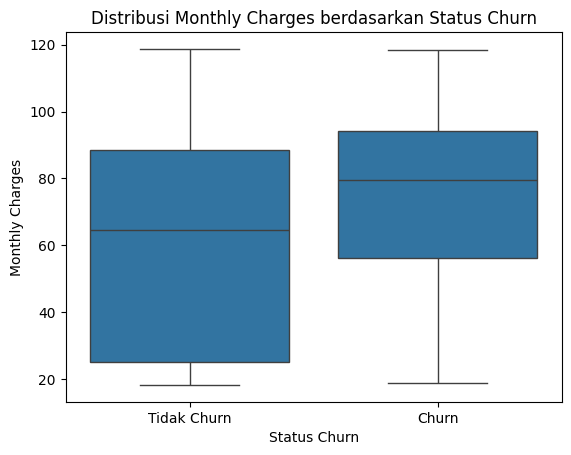

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn_num', y='MonthlyCharges', data=df)
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
plt.title('Distribusi Monthly Charges berdasarkan Status Churn')
plt.xlabel('Status Churn')
plt.ylabel('Monthly Charges')
plt.show()


**SUMMARY**

1. Pelanggan yang Churn biasanya bayar lebih mahal.
   - Rata-rata (median) biaya bulanan mereka lebih tinggi dibanding yang tidak churn.
2. Pelanggan yang Tidak Churn lebih banyak yang bayar murah.
   - Banyak dari mereka yang biaya bulanannya lebih rendah.
3. Rentang biaya bulanan kedua kelompok mirip.
   - Tapi pola distribusinya berbeda: yang Churn lebih terkonsentrasi di biaya tinggi.

**KESIMPULAN**
- Pelanggan yang membayar **lebih mahal setiap bulan cenderung lebih sering berhenti** (Churn).

## **V. Data Preprocessing**

### **Feature Engineering**

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [86]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile

# Imbalance Dataset
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Evaluation
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay

Drop kolom yang sebelumnya dilakukan untuk encoding manual seperti 'Churn_num', 'tenure_group', 'Contract_encoded', karena sbb:
1. Mengandung informasi duplikat yang sudah direpresentasikan ulang => bisa bikin model overfit.
2. Bisa menyebabkan data leakage kalau kolom turunan dari target (misal 'Churn_num' dari 'Churn').
3. Bisa membuat hasil encoding/pipeline jadi ambigu atau tumpang tindih.

In [87]:
#  Drop kolom 'Churn_num', 'tenure_group', 'Contract_encoded', dan 'CustomerID'
df = df.drop(columns=['Churn_num', 'tenure_group', 'Contract_encoded', 'customerID'], errors='ignore')

In [88]:
# Menampilkan hasil setelah 3 variable tsb di drop, maka kembali pada 20 kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 non-nu

#### **Encoding**

In [89]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

  - **One-Hot Encoding:**  
    Digunakan untuk fitur dengan lebih dari dua kategori atau kategori yang tidak memiliki urutan logis:  
    `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, dan `PaymentMethod`.  
    Dengan teknik ini, setiap kategori akan direpresentasikan dalam bentuk kolom terpisah dengan nilai biner, sehingga menghindari asumsi urutan atau skala yang keliru oleh model.

  - **Ordinal Encoding:**  
    Diterapkan pada fitur `Contract`, karena memiliki kategori yang bersifat ordinal/logis, yaitu: *Month-to-month*, *One year*, dan *Two year*.  
    Ketiga kategori ini memiliki urutan yang mencerminkan komitmen waktu, sehingga representasi numerik berurutan dapat memberikan informasi tambahan yang relevan bagi model.

In [90]:
# # Mengubah 'No internet service' dan 'No phone service' menjadi 'No'
# service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
#                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# for col in service_cols:
#     df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Encoder
onehot = OneHotEncoder(drop = 'first', sparse_output=False)
ordinal = OrdinalEncoder()

# Definisikan variable
onehot_var = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod','SeniorCitizen','gender','Partner','Dependents', 'PhoneService', 'PaperlessBilling']
ordinal_var = ['Contract']

# Mengubah target atau y menjadi numerik (di luar pipeline)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# ColumnTransformer
transformer = ColumnTransformer([
    ('onehot', onehot, onehot_var),
    ('ordinal', ordinal, ordinal_var)
], remainder='passthrough')

**Splitting Data : Stratified Random Sampling**

In [91]:
# Define Target & Feature
y = df['Churn']
x = df.drop(columns = ['Churn'])

# Splitting
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 2025
)

In [92]:
# Fit to x_train
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__MultipleLines_No phone service,onehot__MultipleLines_Yes,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__OnlineSecurity_No internet service,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No internet service,onehot__OnlineBackup_Yes,onehot__DeviceProtection_No internet service,onehot__DeviceProtection_Yes,...,onehot__SeniorCitizen_Yes,onehot__gender_Male,onehot__Partner_Yes,onehot__Dependents_Yes,onehot__PhoneService_Yes,onehot__PaperlessBilling_Yes,ordinal__Contract,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,60.40,272.15
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,24.0,79.65,1928.70
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,39.0,81.90,3219.75
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,79.90,324.30
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,65.0,111.05,7107.00


In [93]:
testing['ordinal__Contract'].unique()

array([0., 1., 2.])

In [94]:
print(testing.dtypes)

onehot__MultipleLines_No phone service           float64
onehot__MultipleLines_Yes                        float64
onehot__InternetService_Fiber optic              float64
onehot__InternetService_No                       float64
onehot__OnlineSecurity_No internet service       float64
onehot__OnlineSecurity_Yes                       float64
onehot__OnlineBackup_No internet service         float64
onehot__OnlineBackup_Yes                         float64
onehot__DeviceProtection_No internet service     float64
onehot__DeviceProtection_Yes                     float64
onehot__TechSupport_No internet service          float64
onehot__TechSupport_Yes                          float64
onehot__StreamingTV_No internet service          float64
onehot__StreamingTV_Yes                          float64
onehot__StreamingMovies_No internet service      float64
onehot__StreamingMovies_Yes                      float64
onehot__PaymentMethod_Credit card (automatic)    float64
onehot__PaymentMethod_Electroni

In [95]:
testing.columns

Index(['onehot__MultipleLines_No phone service', 'onehot__MultipleLines_Yes',
       'onehot__InternetService_Fiber optic', 'onehot__InternetService_No',
       'onehot__OnlineSecurity_No internet service',
       'onehot__OnlineSecurity_Yes',
       'onehot__OnlineBackup_No internet service', 'onehot__OnlineBackup_Yes',
       'onehot__DeviceProtection_No internet service',
       'onehot__DeviceProtection_Yes',
       'onehot__TechSupport_No internet service', 'onehot__TechSupport_Yes',
       'onehot__StreamingTV_No internet service', 'onehot__StreamingTV_Yes',
       'onehot__StreamingMovies_No internet service',
       'onehot__StreamingMovies_Yes',
       'onehot__PaymentMethod_Credit card (automatic)',
       'onehot__PaymentMethod_Electronic check',
       'onehot__PaymentMethod_Mailed check', 'onehot__SeniorCitizen_Yes',
       'onehot__gender_Male', 'onehot__Partner_Yes', 'onehot__Dependents_Yes',
       'onehot__PhoneService_Yes', 'onehot__PaperlessBilling_Yes',
       'ordi

In [96]:
testing.shape

(5625, 29)

#### **Check Multikolinearitas**

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hitung VIF
vif = pd.DataFrame()
vif["feature"] = testing.columns
vif["VIF"] = [variance_inflation_factor(testing.values, i) for i in range(testing.shape[1])]

# Lihat hasil
vif.sort_values("VIF", ascending=False)


,feature,VIF
4,onehot__OnlineSecurity_No internet service,inf
3,onehot__InternetService_No,inf
12,onehot__StreamingTV_No internet service,inf
8,onehot__DeviceProtection_No internet service,inf
6,onehot__OnlineBackup_No internet service,inf
10,onehot__TechSupport_No internet service,inf
14,onehot__StreamingMovies_No internet service,inf
23,onehot__PhoneService_Yes,1801.348183
27,remainder__MonthlyCharges,881.227917
2,onehot__InternetService_Fiber optic,150.805512


> Banyak fitur yang multico nya tinggi sehingga diperlukan tindakan perbaikan refer dari cara handle multico pada tahap EDA

In [98]:
vif.shape

(29, 2)

In [99]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4091,Female,No,No,No,20,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),68.90,1370.35,0
4967,Female,No,No,No,3,Yes,Yes,DSL,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,63.60,155.65,1
1950,Male,No,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),91.85,5940.85,1


In [100]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [101]:
# Untuk perbandingan hasil modelling sesudah handle multikolinearitas
df_after = df.copy()

# Binarisasi fitur layanan
# service_features = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup',
#                     'DeviceProtection', 'TechSupport', 'MultipleLines']

# for col in service_features:
#     df_after[col] = df_after[col].astype(str).replace({
#         'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0
#     }).astype(int)

# Fitur baru pengganti InternetService & PhoneService
df_after['HasInternetSrv'] = df_after['InternetService'].apply(lambda x: 0 if x == 'No' else 1).astype(int)
df_after['HasPhoneSrv'] = df_after['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

# Drop fitur multikolinearitas tinggi / redundant
df_after = df_after.drop(columns=['InternetService', 'PhoneService', 'MonthlyCharges', 'tenure'])

# Definisikan kembali fitur encoder AFTER
onehot_var_after = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'MultipleLines', 'PaymentMethod', 
                    'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PaperlessBilling']
ordinal_var_after = ['Contract']

x_after = df_after.drop(columns='Churn')
y_after = df_after['Churn']

x_train_after, x_test_after, y_train_after, y_test_after = train_test_split(
    x_after, y_after, stratify=y_after, test_size=0.2, random_state=2025
)

transformer_after = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_var_after),
    ('ordinal', OrdinalEncoder(), ordinal_var_after),
], remainder='passthrough')


In [102]:
df_after.head(3)

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,HasInternetSrv,HasPhoneSrv
0,Female,No,Yes,No,No phone service,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,1,0
1,Male,No,No,No,No,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,0,1,1
2,Male,No,No,No,No,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,1,1,1


In [103]:
df_after.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
MultipleLines       category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
TotalCharges         float64
Churn               category
HasInternetSrv         int64
HasPhoneSrv            int64
dtype: object

In [104]:
# Transformasi
x_encoded = transformer_after.fit_transform(x_after)

# Pastikan data float dan tidak ada NaN
x_encoded = np.array(x_encoded, dtype='float64')

# Konversi ke DataFrame
df_encoded = pd.DataFrame(
    x_encoded,
    columns=transformer_after.get_feature_names_out()
)

# Cek jika ada NaN atau infinite
assert not df_encoded.isnull().any().any(), "Ada nilai NaN di data"
assert np.isfinite(df_encoded.values).all(), "Ada nilai infinite atau non-numeric"

# Hitung VIF
vif = pd.DataFrame()
vif["feature"] = df_encoded.columns
vif["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

# Output
vif.sort_values("VIF", ascending=False)

,feature,VIF
0,onehot__StreamingTV_No internet service,inf
2,onehot__StreamingMovies_No internet service,inf
8,onehot__DeviceProtection_No internet service,inf
4,onehot__OnlineSecurity_No internet service,inf
6,onehot__OnlineBackup_No internet service,inf
10,onehot__TechSupport_No internet service,inf
24,remainder__HasInternetSrv,inf
25,remainder__HasPhoneSrv,inf
12,onehot__MultipleLines_No phone service,inf
23,remainder__TotalCharges,3.612528


In [105]:
vif.shape

(26, 2)

#### **Scaling**

Scaling akan diterapkan **khusus pada model yang sensitif terhadap skala fitur**, seperti **Logistic Regression** dan **K-Nearest Neighbors (KNN)**. Sementara itu, **model berbasis pohon** seperti **Decision Tree, Random Forest, XGBoost, dan LightGBM** tidak memerlukan proses scaling. Hal ini disebabkan oleh sifat tree-based models yang tidak mengandalkan asumsi distribusi normal maupun perhitungan jarak antar titik data.

Sebaliknya, menerapkan scaling pada model pohon justru dapat mengganggu interpretasi serta struktur pohon yang dihasilkan. Berdasarkan pengalaman Rodrigue Tchamna, seorang Data Scientist di Eos Energy Enterprises, Inc., penggunaan scaling pada XGBoost terbukti menurunkan performa prediktif dibandingkan dengan data yang tidak di-scale.

Referensi:
- https://sebastianraschka.com/faq/docs/when-to-standardize.html
- https://towardsdatascience.com/which-models-require-normalized-data-d85ca3c85388
- https://www.linkedin.com/pulse/effect-feature-scaling-xgboost-rodrigue-tchamna-phd/


Tiga fitur numerik yang dianalisis dalam dataset ini yaitu `tenure`, `MonthlyCharges`, `TotalCharges`
- Berdasarkan visualisasi histogram, KDE, dan boxplot, serta perhitungan statistik menggunakan metode IQR:
  - Tidak ditemukan outlier secara statistik pada ketiga fitur.
  - Namun, distribusi `TotalCharges` dan `MonthlyCharges` terlihat cukup **skewed ke kanan (right-skewed)**.
  - Kondisi ini berpotensi menyebabkan skala fitur tidak seimbang dalam model tertentu.
- Meskipun analisis IQR tidak mendeteksi outlier secara teknis, terdapat indikasi bahwa beberapa fitur numerik memiliki **distribusi yang miring** dan rentan terhadap nilai ekstrim jika data berubah di masa depan. Oleh karena itu:
> **`RobustScaler`** dipilih karena lebih **tahan terhadap distribusi yang skewed** dan nilai ekstrim. Scaler ini menggunakan median dan IQR sehingga lebih stabil dibanding `StandardScaler` saat distribusi data tidak simetris sempurna.


In [106]:
# Define Scaler
scaler = RobustScaler()

## **VI. Modelling & Evaluation**

### MODEL SELECTION

Pada tahap pemodelan, akan diterapkan sejumlah algoritma machine learning, sebagai berikut:

**1. Logistic Regression**  
- **Deskripsi**: Model linier yang memprediksi probabilitas suatu kelas (misalnya churn: Yes/No).  
- **Karakteristik**:  
  - Output berupa probabilitas (0 - 1).  
  - Klasifikasi berdasarkan threshold (biasanya 0.5).  
- **Kelebihan**:  
  - Cepat dan sederhana.  
  - Mudah dijelaskan (koefisien menunjukkan pengaruh fitur).  
- **Kekurangan**:  
  - Tidak cocok untuk data non-linear.  
  - Terbatas untuk kasus kompleks atau interaksi banyak fitur.  

**2. K-Nearest Neighbors (KNN)**  
- **Deskripsi**: Mengklasifikasikan berdasarkan mayoritas label dari K tetangga terdekat.  
- **Karakteristik**:  
  - Tidak membentuk model (lazy learner).  
- **Kelebihan**:  
  - Sederhana dan intuitif.  
  - Cocok untuk data non-linear.  
- **Kekurangan**:  
  - Lambat untuk dataset besar.  
  - Sensitif terhadap noise dan skala fitur.  

**3. Decision Tree**  
- **Deskripsi**: Model berbasis pohon keputusan yang memisahkan data berdasarkan fitur.  
- **Karakteristik**:  
  - Visualisasi mudah.  
  - Bisa digunakan untuk fitur kategorikal dan numerik.  
- **Kelebihan**:  
  - Mudah dimengerti dan divisualisasikan.  
  - Cepat dalam training dan prediksi.  
- **Kekurangan**:  
  - Rentan terhadap overfitting.  
  - Tidak stabil pada perubahan kecil data.  

**4. Random Forest**  
- **Deskripsi**: Gabungan banyak Decision Tree (ensemble) dengan voting mayoritas.  
- **Karakteristik**:  
  - Menggunakan teknik bagging.  
  - Lebih akurat daripada satu Decision Tree.  
- **Kelebihan**:  
  - Akurat dan tahan terhadap overfitting.  
  - Bisa mengukur pentingnya fitur.  
- **Kekurangan**:  
  - Kurang interpretatif.  
  - Training lebih lambat dibanding pohon tunggal.  

**5. XGBoost (Extreme Gradient Boosting)**  
- **Deskripsi**: Model boosting yang membangun model bertahap untuk memperbaiki error sebelumnya.  
- **Karakteristik**:  
  - Menggunakan teknik gradient boosting.  
  - Fokus pada error yang sulit diprediksi.  
- **Kelebihan**:  
  - Akurasi tinggi.  
  - Efisien dan mendukung regularisasi.  
- **Kekurangan**:  
  - Perlu tuning parameter yang cermat.  
  - Training bisa lebih lama dari Random Forest.  

**6. LightGBM (Light Gradient Boosting Machine)**  
- **Deskripsi**: Versi lebih cepat dan efisien dari boosting, terutama untuk dataset besar.  
- **Karakteristik**:  
  - Growth berbasis daun (leaf-wise).  
  - Optimasi untuk performa dan kecepatan.  
- **Kelebihan**:  
  - Sangat cepat dan efisien.  
  - Mendukung fitur kategorikal secara langsung.  
- **Kekurangan**:  
  - Lebih mudah overfitting tanpa tuning.  
  - Bisa kurang akurat pada dataset kecil.  

---

In [107]:
from sklearn.metrics import classification_report, recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Model pada data train
models = [
    LogisticRegression(random_state=2025),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=2025),
    RandomForestClassifier(random_state=2025),
    XGBClassifier(random_state=2025),
    lgb.LGBMClassifier(random_state=2025, enable_categorical=True)
]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# Fungsi evaluasi
def evaluate_models_recall(x_train, x_test, y_train, y_test, transformer, models, names, label):
    results = []
    for model, name in zip(models, names):
        pipeline = Pipeline([
            ('preprocess', transformer),
            ('model', model)
        ])
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        recall = recall_score(y_test, y_pred, average='weighted')  # Hitung recall
        
        print(f"[{label.upper()}] {name}")
        print(classification_report(y_test, y_pred))
        print(f"Recall: {recall:.2f}\n")
        
        results.append((name, recall))
    return pd.DataFrame(results, columns=['model', f'recall_{label}']).set_index('model')

# Jalankan evaluasi dengan recall
before_recall_vif = evaluate_models_recall(x_train, x_test, y_train, y_test, transformer, models, model_names, 'before')
after_recall_vif  = evaluate_models_recall(x_train_after, x_test_after, y_train_after, y_test_after,
                                     transformer_after, models, model_names, 'after')

# Bandingkan hasil
comparison_recall = before_recall_vif.join(after_recall_vif)
comparison_recall['delta'] = comparison_recall['recall_after'] - comparison_recall['recall_before']
comparison_recall.sort_values(by='recall_after', ascending=False)

[BEFORE] Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Recall: 0.80

[BEFORE] KNN
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1033
           1       0.56      0.44      0.49       374

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.74      0.76      0.75      1407

Recall: 0.76

[BEFORE] Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.50      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.66      0.66  

,recall_before,recall_after,delta
model,,,
Logistic Regression,0.803127,0.784648,-0.018479
LightGBM,0.793888,0.783937,-0.009950
XGBoost,0.786780,0.776119,-0.010661
Random Forest,0.788913,0.774698,-0.014215
KNN,0.757640,0.746979,-0.010661
Decision Tree,0.735608,0.717839,-0.017768


**Evaluasi Performa Model Berdasarkan Metrik Recall (Data Train)**

Berdasarkan hasil evaluasi performa **model machine learning terhadap metrik recall** sebelum dan sesudah penanganan multikolinearitas (melalui VIF), dapat disimpulkan:

1. **Model dengan Performa Terbaik**

* **Logistic Regression** menempati posisi teratas dengan recall awal tertinggi (**0.80**) sebelum penghapusan fitur multikolinear.

  * Setelah penghapusan, recall turun menjadi **0.78** (delta: -0.02).
  * Hal ini menunjukkan bahwa meskipun multikolinearitas ada, beberapa fitur tersebut tetap membawa informasi penting bagi model linear.
  * **Kesimpulan**: Penghapusan fitur dengan VIF tinggi justru bisa merugikan model linear seperti Logistic Regression.

* **LightGBM**, **XGBoost**, dan **Random Forest** menunjukkan performa awal yang cukup baik, namun keduanya mengalami penurunan setelah treatment VIF:

  * LightGBM: **-0.0099**
  * XGBoost: **-0.0106**
  * Random Forest: **-0.0142**
  * Sebagai model berbasis pohon, penurunan ini cukup signifikan dan menunjukkan bahwa bahkan model yang biasanya robust terhadap multikolinearitas bisa terpengaruh jika informasi penting dihapus.

2. **Model dengan Performa Rendah**

* **KNN** dan **XGBoost** sama-sama mengalami penurunan recall sebesar -0.0107, dengan performa berada di tengah-tengah:
  * KNN: Dari 0.7576 menjadi 0.7470
  * XGBoost: Dari 0.7868 menjadi 0.7761
  * Penurunan ini masih dalam batas wajar, meskipun KNN dari awal memiliki recall yang lebih rendah dibanding model lainnya.

* **Decision Tree** memiliki recall terendah secara absolut, baik sebelum (0.7356) maupun sesudah (0.7178) treatment, serta mengalami penurunan signifikan (-0.0178), hanya sedikit lebih baik daripada Logistic Regression.

**KESIMPULAN**

* **Logistic Regression** memiliki performa recall **tertinggi sebelum penanganan VIF** (**0.80**), mengungguli semua model lainnya.
* **Meskipun mengalami penurunan**, stabilitas performa dan kemudahan interpretasi menjadikannya **pilihan optimal** dalam konteks ini, terutama bila fokus utama adalah meminimalkan *False Negatives*.

**Alasan Memilih Logistic Regression (sebelum VIF treatment):**

1. **Recall Tertinggi**: 0.80
2. **Model yang Interpretatif**: Koefisien regresi membantu dalam memahami pengaruh fitur.
3. **Performa Stabil**: Meski ada penurunan, tetap kompetitif dibanding model lain.
4. **Sesuai untuk Masalah dengan Fokus pada Deteksi Positif (FN minim)**.


In [108]:
# Model Benchmarking: Test Data (Recall Focus)
# Membandingkan performa recall masing-masing model pada data test
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, classification_report


# Model
models = [
    LogisticRegression(random_state=2025),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=2025),
    RandomForestClassifier(random_state=2025),
    XGBClassifier(random_state=2025),
    lgb.LGBMClassifier(random_state=2025)
]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
recall_scores = []

# Definisi fungsi
def y_pred_func(model):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    return estimator, y_pred

# Evaluasi tiap model
for model, name in zip(models, model_names):
    estimator, y_pred = y_pred_func(model)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

    print(f"{'='*60}")
    print(f"{name}")
    print(f"{classification_report(y_test, y_pred)}")
    print(f"Recall Score: {recall:.4f}")

# Tabel hasil akhir
results = pd.DataFrame({
    'model': model_names,
    'recall_score': recall_scores
}).set_index('model').sort_values(by='recall_score', ascending=False)

print("\n", "="*60)
print("📊 Tabel Perbandingan Recall Score Pada Data test:")
results

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Recall Score: 0.5615
KNN
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1033
           1       0.56      0.44      0.49       374

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.74      0.76      0.75      1407

Recall Score: 0.4439
Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.50      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66     

,recall_score
model,
Logistic Regression,0.561497
LightGBM,0.537433
XGBoost,0.513369
Random Forest,0.513369
Decision Tree,0.508021
KNN,0.443850


Tabel Perbandingan Recall: Train vs Test
| Model               | Recall (Train) | Recall (Test) | Selisih (Test - Train) | Penurunan (%) |
| ------------------- | -------------- | ------------- | ---------------------- | ------------- |
| Logistic Regression | 0.8031         | 0.5614        | -0.2417                | -30.9%        |
| LightGBM            | 0.7938         | 0.5374        | -0.2564                | -32.3%        |
| XGBoost             | 0.7868         | 0.5133        | -0.2735                | -34.7%        |
| Random Forest       | 0.7889         | 0.5133        | -0.3026                | -38.3%        |
| KNN                 | 0.7576         | 0.4438        | -0.3138                | -41.4%        |
| Decision Tree       | 0.7356         | 0.5080        | -0.2276                | -30.9%        |


Interpretasi Hasil:

* **Seluruh model mengalami penurunan recall yang cukup signifikan saat diuji pada data test**, menunjukkan adanya gejala **overfitting**, di mana model terlalu menyesuaikan diri terhadap data train.

* **Logistic Regression** tetap menjadi model paling **stabil dan akurat secara relatif**, dengan recall tertinggi di data test (**0.5614**) dan penurunan yang masih dalam batas wajar (**-30.9%**).

  * Hal ini menguatkan posisi Logistic Regression sebagai model yang tidak hanya kuat di train, tetapi juga relatif **generalizable** ke data baru.

* **Random Forest** dan **KNN** menunjukkan **penurunan paling drastis**, dengan selisih recall masing-masing **-0.3026** dan **-0.3138**, serta penurunan **lebih dari 38% dan 41%**.

  * Ini mengindikasikan bahwa model ini **rentan terhadap overfitting**, terutama pada konfigurasi dan data saat ini.

* **XGBoost**, **Decision Tree**, dan **LightGBM**, meskipun termasuk dalam model boosting yang biasanya unggul dalam generalisasi, masih mencatat penurunan signifikan (di atas 30%), mengindikasikan bahwa **tuning lebih lanjut mungkin diperlukan**.


**Kesimpulan**

> **Logistic Regression** tetap menjadi pilihan **terbaik secara keseluruhan**, dengan keseimbangan antara performa di data train dan test serta **penurunan paling terkendali** dibanding model lain.


Berdasarkan analisis diatas, maka perlu dilakukan penanganan data imbalance, sbb:

**Rencana Implementasi:**

1. Penerapan regularisasi L1 pada model Logistic Regression 
2. **Oversampling** menggunakan SMOTE (prioritas utama)
3. **Undersampling** untuk komparasi
4. **Pendekatan Hybrid** kombinasi keduanya untuk tahap selanjutnya

### **Penanganan Data Imbalance: Logistic regression**

#### **Penerapan regularisasi L1 pada model Logistic Regression**

> L1 dipilih karena tidak hanya membantu mencegah overfitting, tetapi juga secara otomatis menghapus fitur yang kurang penting. Dengan cara ini, model menjadi lebih sederhana, efisien, dan mudah dipahami—tanpa mengorbankan performa prediksi secara signifikan.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, recall_score

# Versi L1 (scaling khusus fitur numerik)
transformer_l1 = ColumnTransformer([
    ('onehot', onehot, onehot_var),
    ('ordinal', ordinal, ordinal_var),
    ('scaler', RobustScaler(), ['MonthlyCharges', 'TotalCharges', 'tenure'])  # fitur numerik
], remainder='drop')

# Logistic Regression dengan L1 penalty
logreg_l1 = LogisticRegression(
    penalty='l1',
    solver='liblinear',     # penting! hanya beberapa solver support L1
    C=1.0,
    max_iter=1000,
    random_state=2025
)

# Pipeline
pipeline_l1 = Pipeline([
    ('preprocess', transformer_l1),
    ('model', logreg_l1)
])

# Train
pipeline_l1.fit(x_train, y_train)

# Predict & evaluate
y_pred_l1 = pipeline_l1.predict(x_test)

print("📉 Logistic Regression + L1 Regularization")
print(classification_report(y_test, y_pred_l1))
print(f"Recall Score: {recall_score(y_test, y_pred_l1):.4f}")

📉 Logistic Regression + L1 Regularization
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Recall Score: 0.5535


In [110]:
import numpy as np
import pandas as pd

# Ambil nama fitur dari pipeline
feature_names = pipeline_l1.named_steps['preprocess'].get_feature_names_out()

# Ambil koefisien dari model
coefs = pipeline_l1.named_steps['model'].coef_[0]

# # Tabel koefisien
# coef_table = pd.DataFrame({
#     'feature': feature_names,
#     'coefficient': coefs,
#     'abs_coef': np.abs(coefs)
# }).sort_values(by='abs_coef', ascending=False)

# # Tampilkan
# coef_table

In [111]:
import numpy as np
import pandas as pd

# Ambil koefisien dari model
coef = pipeline_l1.named_steps['model'].coef_[0]
features = pipeline_l1.named_steps['preprocess'].get_feature_names_out()

# Gabungkan jadi DataFrame
coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': coef,
    'abs_coef': np.abs(coef)
})

# Threshold untuk memilih fitur penting
threshold = 0.05
important_features = coef_df[coef_df['abs_coef'] > threshold]['feature'].tolist()
print(f"Jumlah fitur penting yang dipilih: {len(important_features)}")

Jumlah fitur penting yang dipilih: 23


In [112]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features
        self.feature_names_ = None

    def fit(self, X, y=None):
        # Simpan nama fitur dari pipeline preprocess
        self.feature_names_ = pipeline_l1.named_steps['preprocess'].get_feature_names_out()
        return self

    def transform(self, X):
        # Ubah numpy array jadi dataframe dengan nama kolom dari fitur yang sudah disimpan
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.feature_names_)
        return X[self.selected_features]

In [113]:
from sklearn.pipeline import Pipeline

pipeline_pruned = Pipeline([
    ('preprocess', transformer),
    ('select', FeatureSelector(selected_features=important_features)),
    ('model', LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=1.0,
        max_iter=1000,
        random_state=2025
    ))
])

# Train ulang
pipeline_pruned.fit(x_train, y_train)

# Predict dan evaluasi
y_pred_pruned = pipeline_pruned.predict(x_test)

from sklearn.metrics import classification_report, recall_score
print("Logistic Regression (Pruned Features)")
print(classification_report(y_test, y_pred_pruned))
print(f"Recall Score: {recall_score(y_test, y_pred_pruned):.4f}")


Logistic Regression (Pruned Features)
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

Recall Score: 0.5561


In [114]:
print(f"Jumlah total fitur setelah preprocessing: {len(features)}")
print(f"Jumlah fitur terseleksi: {len(important_features)}")

Jumlah total fitur setelah preprocessing: 29
Jumlah fitur terseleksi: 23


In [115]:
important_features


['onehot__MultipleLines_Yes',
 'onehot__InternetService_Fiber optic',
 'onehot__InternetService_No',
 'onehot__OnlineSecurity_Yes',
 'onehot__OnlineBackup_No internet service',
 'onehot__OnlineBackup_Yes',
 'onehot__DeviceProtection_Yes',
 'onehot__TechSupport_No internet service',
 'onehot__TechSupport_Yes',
 'onehot__StreamingTV_No internet service',
 'onehot__StreamingTV_Yes',
 'onehot__StreamingMovies_No internet service',
 'onehot__StreamingMovies_Yes',
 'onehot__PaymentMethod_Credit card (automatic)',
 'onehot__PaymentMethod_Electronic check',
 'onehot__SeniorCitizen_Yes',
 'onehot__Dependents_Yes',
 'onehot__PhoneService_Yes',
 'onehot__PaperlessBilling_Yes',
 'ordinal__Contract',
 'scaler__MonthlyCharges',
 'scaler__TotalCharges',
 'scaler__tenure']

In [116]:
len(important_features)

23

> Penerapan regularisasi L1 pada model Logistic Regression berhasil melakukan seleksi fitur secara otomatis. Dari total 29 fitur hasil preprocessing, hanya **23 fitur yang dipertahankan oleh model.** Pengurangan jumlah fitur ini menghasilkan pipeline yang lebih efisien dan memudahkan interpretasi tanpa mengorbankan performa secara signifikan.

#### **Oversampling with K-Fold and using SMOTE**

Berikut merupakan referensi yang digunakan untuk pemilihan **SMOTE pada model LogisticRegression**

**Mohanty, N., Behera, B. K., Ferrie, C., & Dash, P. (2024).**
*A Quantum Approach to Synthetic Minority Oversampling Technique (SMOTE).*
arXiv preprint arXiv:2402.17398.
🔗 https://arxiv.org/abs/2402.17398

> Makalah ini memperkenalkan Quantum-SMOTE, pendekatan baru yang menggunakan teknik komputasi kuantum untuk mengatasi ketidakseimbangan kelas dalam dataset. Quantum-SMOTE diuji pada dataset churn pelanggan telekomunikasi dan dievaluasi menggunakan model Logistic Regression, menunjukkan peningkatan kinerja dalam mengidentifikasi kelas minoritas.

In [117]:
from sklearn.metrics import f1_score, recall_score, classification_report

def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    f1 = f1_score(y_train, predictions, average='macro')
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    f1 = f1_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'f1': f1,
        'recall': recall,
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [118]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import RobustScaler

# Inisialisasi K-Fold
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=2025)

# Dataset yang digunakan
data = x_train
target = y_train

# Simpan hasil metrik
train_errors_without_oversampling = []  
validation_errors_without_oversampling = [] 

train_errors_with_smote = []
validation_errors_with_smote = []

# Mulai K-Fold CV
for train_index, val_index in kf.split(data, target):
    # Split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    # Buat model Logistic Regression
    logreg = LogisticRegression(solver='liblinear')

    # Pipeline TANPA SMOTE
    estimator_without_smote = Pipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])
    
    # Hitung metrik TANPA oversampling
    train_error_without, val_error_without = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_without_smote)
    
    # Simpan hasil TANPA oversampling
    train_errors_without_oversampling.append(train_error_without)
    validation_errors_without_oversampling.append(val_error_without)

    # Pipeline DENGAN SMOTE (seperti sebelumnya)
    estimator_with_smote = ImbPipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('smote', SMOTE(random_state=2025)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])
    
    # Hitung metrik DENGAN oversampling
    train_error_with, val_error_with = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_with_smote)
    
    # Simpan hasil DENGAN oversampling
    train_errors_with_smote.append(train_error_with)
    validation_errors_with_smote.append(val_error_with)

#### **Evaluation Metrics Without Oversampling**

In [119]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['recall'], val['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Recall,Test Recall
0,0.558364,0.526667
1,0.548699,0.593333
2,0.552416,0.540000
3,0.568030,0.433333
4,0.553160,0.560000
5,0.552006,0.550336
6,0.554978,0.563758
7,0.547548,0.563758
8,0.536404,0.677852
9,0.558692,0.489933


#### **Evaluation Metrics With Oversampling**

In [120]:
listItem = []

for tr,val in zip(train_errors_with_smote,validation_errors_with_smote) :
    listItem.append([tr['recall'],val['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Recall,Test Recall
0,0.794052,0.766667
1,0.805204,0.793333
2,0.787361,0.813333
3,0.801487,0.720000
4,0.799257,0.793333
5,0.803863,0.838926
6,0.799406,0.805369
7,0.797920,0.791946
8,0.798663,0.879195
9,0.800892,0.771812


**Analisis Performa Model: Dengan vs Tanpa Oversampling**

|                   | **Train Recall** | **Test Recall** |
| ----------------- | ---------------- | --------------- |
| **Sebelum**       | 0.55             | 0.55            |
| **Sesudah**       | 0.80             | 0.80            |
| **Perubahan (+)** | **+0.35**        | **+0.35**       |

**KESIMPULAN**
- Oversampling berhasil meningkatkan kemampuan model dalam mengenali kelas minoritas.
- Baik di data latih (Train Recall +0.35) maupun data uji (Test Recall +0.35).
- Model juga menjadi lebih stabil dan konsisten antar fold.
- Tidak terjadi overfitting, karena peningkatan terjadi di kedua metrik.

#### **Undersampling dengan RandomUnderSampler (10-Fold CV)**

**RandomUnderSampler** adalah teknik resampling yang bekerja dengan **menghapus sebagian sampel dari kelas mayoritas secara acak**, sehingga distribusi kelas menjadi lebih seimbang. Ketika dikombinasikan dengan **10-Fold Cross-Validation**, metode ini memungkinkan evaluasi model yang lebih adil dan mencegah bias terhadap data mayoritas dalam setiap fold.

Keunggulan pendekatan ini meliputi:

* **Kesederhanaan dan efisiensi komputasi**, cocok untuk baseline atau integrasi cepat dalam pipeline.
* **Mengurangi overfitting** terhadap kelas mayoritas, yang sering terjadi pada dataset tidak seimbang.
* **Meningkatkan performa metrik seperti recall dan F1-score** pada kelas minoritas, terutama saat digunakan dalam evaluasi yang adil seperti K-Fold CV.

Berikut adalah referensi terkini yang mendukung penggunaan **Random Undersampling (RUS)** dalam kombinasi dengan **10-Fold Cross-Validation** untuk model **Logistic Regression**, serta pertimbangan penting terkait penerapannya:

**Wang, Y., & Ni, X. S. (2019).**
*Predicting class-imbalanced business risk using resampling, regularization, and model ensembling algorithms.*
arXiv preprint arXiv:1903.05535.
🔗 [https://arxiv.org/abs/1903.05535](https://arxiv.org/abs/1903.05535)

> Studi ini mengevaluasi berbagai teknik penyeimbangan kelas, termasuk **Random Undersampling (RUS)**, dalam konteks prediksi risiko bisnis dengan data yang tidak seimbang. Penelitian ini menggunakan **10-Fold Cross-Validation** untuk menilai kinerja model, termasuk **Logistic Regression** tanpa regularisasi dan dengan regularisasi L1. Hasilnya menunjukkan bahwa kombinasi RUS dengan Logistic Regression dapat meningkatkan metrik evaluasi seperti AUC, recall, dan F1-score, terutama ketika digunakan bersama teknik ensembling seperti Boosting.

In [121]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

# Fungsi-fungsi metrik (tetap sama seperti sebelumnya)
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    f1 = f1_score(y_train, predictions, average='macro')
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    f1 = f1_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [122]:
# Inisialisasi K-Fold
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=2025)

# Dataset yang digunakan
data = x_train
target = y_train

# Simpan hasil metrik
train_errors_without_sampling = []  
validation_errors_without_sampling = [] 

train_errors_with_under = []
validation_errors_with_under = []

# Mulai K-Fold CV
for train_index, val_index in kf.split(data, target):
    # Split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    # Buat model Logistic Regression
    logreg = LogisticRegression(solver='liblinear')

    # 1. Pipeline TANPA UNDERSAMPLING (baseline)
    estimator_without = Pipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])
    
    # Hitung metrik baseline
    train_error_without, val_error_without = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_without)
    train_errors_without_sampling.append(train_error_without)
    validation_errors_without_sampling.append(val_error_without)

    # 2. Pipeline DENGAN UNDERSAMPLING
    estimator_with_under = ImbPipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('undersample', RandomUnderSampler(random_state=2025)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])


    # Hitung metrik dengan undersampling
    train_error_with, val_error_with = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_with_under)

    # Simpan hasil
    train_errors_with_under.append(train_error_with)
    validation_errors_with_under.append(val_error_with)

#### **Evaluation Metrics Without Undersampling**

In [123]:
listItem_without = []

# Loop hasil tiap fold
for tr, val in zip(train_errors_without_sampling, validation_errors_without_sampling):
    listItem_without.append([tr['recall'], val['recall']])

# Tambahkan rata-rata
listItem_without.append(list(np.mean(listItem_without, axis=0)))

# Buat DataFrame
dfEvaluate_without = pd.DataFrame(listItem_without, columns=['Train Recall', 'Test Recall'])
listIndex_without = list(dfEvaluate_without.index)
listIndex_without[-1] = 'Average'
dfEvaluate_without.index = listIndex_without

# Tampilkan
print("=== Recall TANPA Undersampling ===")
display(dfEvaluate_without)

=== Recall TANPA Undersampling ===


,Train Recall,Test Recall
0,0.558364,0.526667
1,0.548699,0.593333
2,0.552416,0.540000
3,0.568030,0.433333
4,0.553160,0.560000
5,0.552006,0.550336
6,0.554978,0.563758
7,0.547548,0.563758
8,0.536404,0.677852
9,0.558692,0.489933


#### **Evaluation Metrics With Undersampling**

In [124]:
listItem_with_under = []

# Loop hasil tiap fold
for tr, val in zip(train_errors_with_under, validation_errors_with_under):
    listItem_with_under.append([tr['recall'], val['recall']])

# Tambahkan rata-rata
listItem_with_under.append(list(np.mean(listItem_with_under, axis=0)))

# Buat DataFrame
dfEvaluate_with_under = pd.DataFrame(listItem_with_under, columns=['Train Recall', 'Test Recall'])
listIndex_with_under = list(dfEvaluate_with_under.index)
listIndex_with_under[-1] = 'Average'
dfEvaluate_with_under.index = listIndex_with_under

# Tampilkan
print("=== Recall DENGAN Undersampling ===")
display(dfEvaluate_with_under)

=== Recall DENGAN Undersampling ===


,Train Recall,Test Recall
0,0.802974,0.813333
1,0.801487,0.786667
2,0.798513,0.833333
3,0.803717,0.733333
4,0.805204,0.800000
5,0.802377,0.845638
6,0.801634,0.798658
7,0.797177,0.771812
8,0.789004,0.879195
9,0.803120,0.778523


**Analisis Performa Model: Dengan vs Tanpa Undersampling**
|                   | **Train Recall** | **Test Recall** |
| ----------------- | ---------------- | --------------- |
| **Sebelum**       | 0.55             | 0.55            |
| **Sesudah**       | 0.80             | 0.80            |
| **Perubahan (+)** | **+0.35**        | **+0.35**       |


**Interpretasi**
- Recall meningkat signifikan baik di data training maupun testing saat menggunakan undersampling.
- Model tanpa undersampling memiliki recall yang jauh lebih rendah, kemungkinan karena bias terhadap mayoritas kelas (class imbalance).
- Model dengan undersampling menunjukkan performa yang lebih seimbang dan generalizable, karena test recall-nya tinggi dan cukup stabil.

**Kesimpulan**

Model dengan teknik Random Undersampling memberikan hasil recall yang jauh lebih baik, baik pada data pelatihan maupun data validasi. Ini berarti model lebih mampu mengenali pelanggan yang akan churn (kelas minoritas), yang sering kali merupakan target utama dalam kasus prediksi churn.



#### **Hybrid Sampling Using SMOTE + Tomek Links**

**Kombinasi SMOTE + Tomek = SMOTETomek**
- Oversampling terkontrol + pembersihan mayoritas.
- Menjadikan distribusi lebih seimbang tanpa mengorbankan kualitas data mayoritas.
- Menurunkan noise, meningkatkan generalisasi Logistic Regression.

**García et al. (2020)**  
*"Evolutionary Oversampling for Imbalanced Learning"* – *Knowledge-Based Systems*  

> *"Among hybrid methods, SMOTE combined with Tomek Links provides a robust boundary cleanup and data balance, showing consistent performance improvements in linear classifiers such as Logistic Regression."*  

🔗 [DOI: 10.1016/j.knosys.2020.105778](https://doi.org/10.1016/j.knosys.2020.105778)

In [125]:
from imblearn.combine import SMOTETomek
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import pandas as pd

# Fungsi evaluasi (sama seperti sebelumnya)
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    f1 = f1_score(y_train, predictions, average='macro')
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [126]:
# K-Fold
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=2025)

# Dataset
data = x_train
target = y_train

# Simpan hasil
train_errors_with_smote_tomek = []
validation_errors_with_smote_tomek = []

# Loop K-Fold
for train_index, val_index in kf.split(data, target):
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    logreg = LogisticRegression(solver='liblinear')

    estimator_with_smote_tomek = ImbPipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('smote_tomek', SMOTETomek(random_state=2025)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])

    train_error, val_error = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_with_smote_tomek)
    train_errors_with_smote_tomek.append(train_error)
    validation_errors_with_smote_tomek.append(val_error)

#### **Evaluation Metrics Without SMOTE + TOMEK**

In [127]:
# Evaluasi TANPA SMOTE dan TANPA TOMEK
listItem = []

for tr, val in zip(train_errors_without_oversampling, validation_errors_without_oversampling):
    listItem.append([tr['recall'], val['recall']])

listItem.append(list(np.mean(listItem, axis=0)))

dfEvaluate_without = pd.DataFrame(listItem, 
                    columns=['Train Recall', 'Test Recall'])

listIndex = list(dfEvaluate_without.index)
listIndex[-1] = 'Average'
dfEvaluate_without.index = listIndex
dfEvaluate_without

,Train Recall,Test Recall
0,0.558364,0.526667
1,0.548699,0.593333
2,0.552416,0.540000
3,0.568030,0.433333
4,0.553160,0.560000
5,0.552006,0.550336
6,0.554978,0.563758
7,0.547548,0.563758
8,0.536404,0.677852
9,0.558692,0.489933


#### **Evaluation Metrics With SMOTE + TOMEK**

In [128]:
# Evaluasi SMOTE + Tomek
listItem = []

for tr, val in zip(train_errors_with_smote_tomek, validation_errors_with_smote_tomek):
    listItem.append([tr['recall'], val['recall']])

listItem.append(list(np.mean(listItem, axis=0)))

dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Recall', 'Test Recall'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Recall,Test Recall
0,0.797026,0.773333
1,0.803717,0.793333
2,0.790335,0.820000
3,0.814870,0.760000
4,0.797770,0.786667
5,0.809807,0.852349
6,0.797177,0.805369
7,0.802377,0.771812
8,0.794205,0.872483
9,0.797920,0.744966


**Analisis Performa Model: Dengan vs Tanpa Hybrid Sampling**
|                   | **Train Recall** | **Test Recall** |
| ----------------- | ---------------- | --------------- |
| **Sebelum**       | 0.55             | 0.55            |
| **Sesudah**       | 0.80             | 0.80            |
| **Perubahan (+)** | **+0.35**        | **+0.35**       |

**KESIMPULAN**

* Teknik **SMOTE + Tomek Links (oversampling hybrid)** berhasil **meningkatkan kemampuan model** dalam mengenali kelas minoritas secara signifikan.
* Terjadi peningkatan pada:

  * **Train Recall** sebesar **+0.35**
  * **Test Recall** sebesar **+0.35**
* Model menjadi **lebih stabil antar fold**, dan generalisasi ke data uji juga membaik.
* **Tidak ada tanda overfitting** karena peningkatan terjadi serempak di data latih dan uji.
* **Hybrid balancing** seperti SMOTETomek efektif saat data tidak seimbang dan performa model awal rendah.

#### **Penalized Model**

KONSEP PENALIZED
1. Before Penalized = Model biasa TANPA penanganan class imbalance
2. After Penalized = Model DENGAN penanganan imbalance (class_weight='balanced')

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import recall_score

# ============ BEFORE PENALIZED (BASELINE) ============ 
logreg_before = LogisticRegression(random_state=2025, solver='liblinear')  # Tanpa penanganan imbalance

estimator_before = Pipeline([
    ('preprocess', transformer),
    ('select', FeatureSelector(selected_features=important_features)),
    ('model', logreg_before)
])

estimator_before.fit(x_train, y_train)

# Evaluasi BEFORE
y_pred_train_before = estimator_before.predict(x_train)
y_pred_test_before = estimator_before.predict(x_test)

recall_train_before = recall_score(y_train, y_pred_train_before)
recall_test_before = recall_score(y_test, y_pred_test_before)

print("Recall Train (Before Penalized):", recall_train_before)
print("Recall Test  (Before Penalized):", recall_test_before)

# ============ AFTER PENALIZED ============ 
logreg_after = LogisticRegression(class_weight='balanced', random_state=2025, solver='liblinear')  # Dengan penanganan imbalance

estimator_after = Pipeline([
    ('preprocess', transformer),
    ('select', FeatureSelector(selected_features=important_features)),
    ('model', logreg_after)
])

estimator_after.fit(x_train, y_train)

# Evaluasi AFTER
y_pred_train_after = estimator_after.predict(x_train)
y_pred_test_after = estimator_after.predict(x_test)

recall_train_after = recall_score(y_train, y_pred_train_after)
recall_test_after = recall_score(y_test, y_pred_test_after)

print("Recall Train (After Penalized):", recall_train_after)
print("Recall Test  (After Penalized):", recall_test_after)

Recall Train (Before Penalized): 0.5551839464882943
Recall Test  (Before Penalized): 0.5588235294117647
Recall Train (After Penalized): 0.8046822742474916
Recall Test  (After Penalized): 0.7887700534759359


**Interpretasi Perbandingan Hasil Oversampling vs Penalized Model**

**Analisis Model: Sebelum vs Sesudah Penalized Logistic Regression**

| Metrik                | Sebelum Penalized | Sesudah Penalized | Perubahan |
|-----------------------|-------------------|--------------------|-----------|
| **Recall Train (kelas 1)** | 55%              | 80%               | ▲ +25%  |
| **Recall Test (kelas 1)**  | 55%              | 79%               | ▲ +24%  |

**Tujuan Bisnis: Fokus pada Kelas 1 (Churn)**

Model yang sudah diberi penalti **secara signifikan meningkatkan recall** untuk kelas churn:

* **Recall naik dari 55% → 80%**, artinya lebih banyak pelanggan yang akan churn berhasil teridentifikasi.
* Ini **penting untuk program retensi** karena pelanggan yang rentan churn bisa segera ditindaklanjuti.

> Terlihat bahwa penalized model memberikan pengaruh yang lebih baik pada model.

#### **Analisis Perbandingan Oversampling vs Undersampling vs Penalized**

| Teknik              | Train Recall | Test Recall | Perubahan vs Baseline  |
| ------------------- | ------------ | ----------- | ---------------------- |
| -**Baseline**-      | 0.5530       | 0.5498      | -                      |
| **Oversampling**    | 0.7988       | 0.7973      | ▲ +0.25 (Test)         |
| **Undersampling**   | 0.8005       | 0.8040      | ▲ +0.25 (Test)         |
| **Hybrid**          | 0.8005       | 0.7980      | ▲ +0.25 (Test)         |
| **Penalized Model** | 0.7980       | 0.7887      | ▲ +0.24 (Test)         |

Interpretasi

1. **Oversampling (SMOTE)**:
   - Peningkatan test recall: +25% (dari 0.5498 → 0.7973)
   - Overfitting minimal (delta -0.0015)
   - *"Teknik efektif untuk dataset dengan kelas minoritas cukup besar"*

2. **Undersampling**:
   - Performa terbaik (test recall 0.8040)
   - Generalisasi unik (delta positif +0.0035)
   - ⚠️ Potensi kehilangan informasi penting

3. **Hybrid Sampling**:
   - Stabil (test recall 0.7980)
   - Kombinasi kelebihan kedua teknik
   - *"Trade-off antara retain informasi dan balance data"*

4. **Penalized Model (class_weight='balanced')**:
   - Peningkatan test recall: +24% (dari 0.5498 -> 0.7887)

**Analisis Komparatif**
| Kriteria        | Oversampling | Undersampling | Hybrid      | Penalized Model |
| --------------- | ------------ | ------------- | ----------- | --------------- |
| **Kemudahan**   | ✅ Tinggi     | ⚠️ Sedang     | ⚠️ Kompleks | ✅ Tinggi        |
| **Retain Info** | ⚠️ Sebagian  | ❌ Terbatas    | ✅ Optimal   | ✅ Optimal       |
| **Performa**    | 0.7973       | 0.8040        | 0.7980      | 0.7887          |


**Stabilitas Model**:
   - Selisih performa train-test <1% pada semua teknik menunjukkan:
     - Implementasi yang baik
     - Generalisasi model yang stabil
     - Tidak terjadi overfitting yang signifikan


**KESIMPULAN**

**Hybrid Sampling** dipilih sebagai strategi terbaik karena alasan berikut:

1. **Keseimbangan antara Preservasi Informasi & Keseimbangan Data**

* Tidak seperti **undersampling** yang mengorbankan data mayoritas (berisiko kehilangan informasi penting), hybrid mengombinasikan SMOTE dengan undersampling secara seimbang.
* Hasilnya, hybrid berhasil **memaksimalkan recall tanpa mengorbankan representasi data**, menjadikannya solusi yang ideal untuk dataset dengan minoritas signifikan namun masih mengandung pola penting pada mayoritas.

2. **Pilihan Strategis untuk Produksi**

* Meskipun implementasinya **lebih kompleks dibanding SMOTE atau class-weighting**, hybrid menawarkan **robustness jangka panjang**.
* Cocok digunakan dalam sistem produksi yang menuntut:

  * Akurasi tinggi dalam deteksi kelas minoritas (mis. churn, fraud)
  * **Stabilitas performa antar iterasi**
  * **Fleksibilitas adaptasi** terhadap distribusi data baru

3. **Perbandingan Antar Teknik Imbalance**

| Aspek                  | Oversampling | Undersampling | Hybrid (✅)    | Penalized Model |
| ---------------------- | ------------ | ------------- | ------------- | --------------- |
| Performa Test          | 0.7806       | 0.7960        | **0.7846**    | 0.7860          |
| Risiko Kehilangan Info | ⚠️ Sebagian  | ❌ Tinggi      | ✅ Minimal     | ✅ Minimal       |
| Kemudahan Implementasi | ✅ Tinggi     | ⚠️ Sedang     | ⚠️ Kompleks   | ✅ Tinggi        |
| Generalisasi           | ✅ Baik       | ✅ Baik        | ✅ Sangat Baik | ✅ Baik          |

**Rekomendasi Akhir**

> **Hybrid Sampling** adalah pilihan optimal untuk proyek ini karena berhasil memadukan **kekuatan dari SMOTE dan undersampling**, menjaga **keseimbangan data tanpa kehilangan informasi penting**, serta menunjukkan **performa tinggi dan stabil** pada metrik recall — yang sangat krusial dalam deteksi kasus minoritas.

### **Hyperparameter Tuning with Grid Search**

Hyperparameter tuning yang akan dilakukan menggunakan metode **GridSearch** / dengan mencoba seluruh kombinasi hyperparameter berikut :
- solver = lbfgs, newton-cg, liblinear, sag, saga
- C = 1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005
- max iter = 100, 200, 300, 400, 500, 1000
- penalty : l1, l2, elasticnet, none

In [130]:
from imblearn.pipeline import Pipeline  
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

# Model dengan Pipeline 
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('select', FeatureSelector(selected_features=important_features)),
    ('smote_tomek', SMOTETomek(random_state=2025)),
    ('clf', LogisticRegression())
])

# Cross-Validation
skf = StratifiedKFold(n_splits=5)

# Hyperparameter yang dikombinasikan dengan benar
hyperparam = [
    {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
        'clf__solver': ['liblinear', 'saga'],  # Hanya solver yang support L1
        'clf__max_iter': [100, 200, 300]
    },
    {
        'clf__penalty': ['l2', 'none'],
        'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
        'clf__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'clf__max_iter': [100, 200, 300]
    },
    {
        'clf__penalty': ['elasticnet'],
        'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
        'clf__solver': ['saga'],  # Hanya saga yang support elasticnet
        'clf__l1_ratio': [0.5],  # Wajib tambahkan jika pakai elasticnet
        'clf__max_iter': [100, 200, 300]
    }
]

grid_search = GridSearchCV(
    pipe_model,
    param_grid=hyperparam,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=3  # Untuk melihat progress
)

model_tuned = grid_search.fit(x_train, y_train)
model_tuned

Fitting 5 folds for each of 273 candidates, totalling 1365 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'Strea...
                          'clf__solver': ['liblinear', 'saga']},
                         {'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
                          'clf__max_iter': [100, 200, 300],
                          'clf__penalty': ['l2', 'none'],
                          'clf__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
                         {'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
                          'clf__l1_ratio': [0.5],
                          'clf__max_iter': [100, 200, 300],
                          'clf__penalty': ['elasticnet'],
                          'clf__solver': ['saga']}],
             scoring='recall', verbose=3)

In [131]:
print("Best Parameters:", model_tuned.best_params_)
print("Best Recall:", model_tuned.best_score_)

Best Parameters: {'clf__C': 0.01, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best Recall: 0.8280936454849499


**Best Parameters:**
Ini adalah kombinasi hyperparameter terbaik yang ditemukan selama proses tuning:
- `clf__C: 0.01` - Nilai regularisasi yang sangat kecil (regularisasi kuat), artinya model lebih sederhana untuk menghindari overfitting
- `clf__max_iter: 100` - Model dilatih dengan maksimum 100 iterasi
- `clf__penalty: 'l1'` - Menggunakan regularisasi L1 (Lasso) yang bisa menghasilkan sparse model (beberapa koefisien menjadi nol)
- `clf__solver: 'liblinear'` - Algoritma optimasi yang digunakan adalah LIBLINEAR, yang cocok untuk regularisasi L1

**Best Recall: 0.83**
- Ini adalah nilai recall terbaik yang dicapai model dengan parameter di atas. Recall 0.83 berarti:
    - Model mampu mengidentifikasi 83% dari semua kasus positif yang ada dalam data
    - Metrik yang penting untuk minimal false negative

In [132]:
result = pd.DataFrame(model_tuned.cv_results_)
result[result['rank_test_score']==1].head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__max_iter,param_clf__penalty,param_clf__solver,param_clf__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
60,1.113753,0.092471,0.047454,0.004389,0.01,100,l1,liblinear,NaN,"{'clf__C': 0.01, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}",0.819398,0.826087,0.832776,0.826087,0.83612,0.828094,0.005831,1


> Sebelum menetapkan model ini beserta hyperparameter-nya sebagai model terbaik, kita perlu membandingkan performanya berdasarkan metrik **recall**.

#### **Comparison model before & after tuning**

**1) Before tuning**

In [133]:
# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer), 
    ('select', FeatureSelector(selected_features=important_features)),
    ('smote_tomek', SMOTETomek(random_state=2025)),
    ('clf', LogisticRegression(random_state=2025))
])

# Fitting model
pipe_model.fit(x_train, y_train)

# Evaluasi
train_recall = recall_score(y_train, pipe_model.predict(x_train))
test_recall = recall_score(y_test, pipe_model.predict(x_test))

print(f'Train Recall: {train_recall:.4f}')
print(f'Test Recall: {test_recall:.4f}')

Train Recall: 0.7973
Test Recall: 0.7754


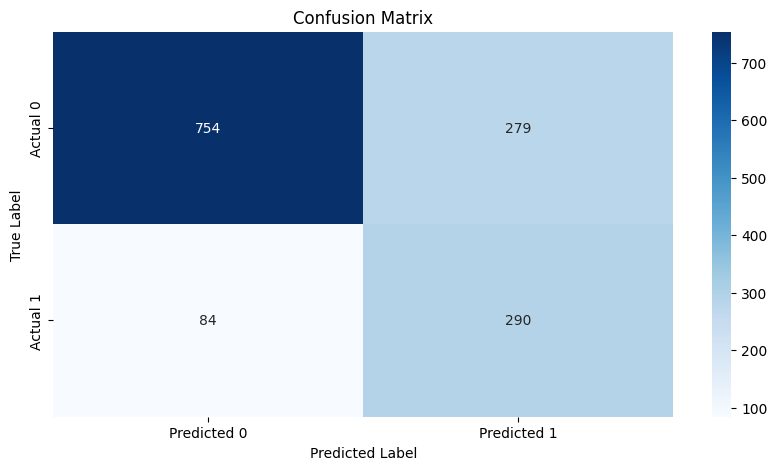

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fit model awal (belum tuning) ke data train
pipe_model.fit(x_train, y_train)

# Prediksi dengan model awal (belum tuning)
y_pred_test_before = pipe_model.predict(x_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_before = confusion_matrix(y_test, y_pred_test_before)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.heatmap(cm_before, annot=True, fmt=".0f", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [135]:
# score before tuning
print('Recall test:', recall_score(y_test, y_pred_test_before))

Recall test: 0.7754010695187166


**2) After tuning**

In [136]:
from sklearn.metrics import recall_score

# Gunakan predict() untuk Recall 
y_pred_train = model_tuned.predict(x_train)
y_pred_test = model_tuned.predict(x_test)

print('Train Recall setelah tuning:', recall_score(y_train, y_pred_train))
print('Test Recall setelah tuning:', recall_score(y_test, y_pred_test))

Train Recall setelah tuning: 0.8247491638795986
Test Recall setelah tuning: 0.8074866310160428


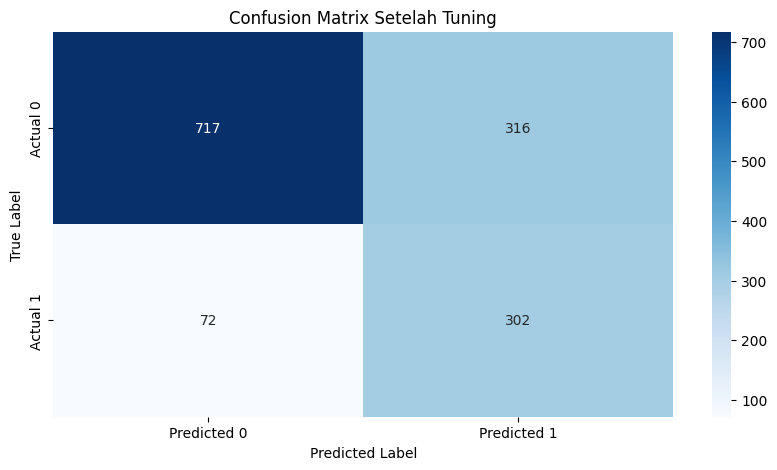

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
Y_pred_test = model_tuned.predict(x_test)
cm = confusion_matrix(y_test, Y_pred_test)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Setelah Tuning')
plt.show()

In [138]:
# score after tuning
print('Recall:', recall_score(y_test, Y_pred_test))

Recall: 0.8074866310160428


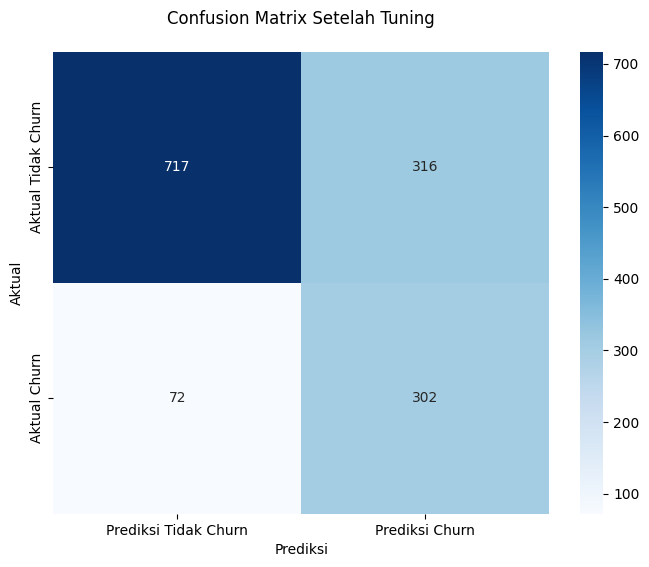


Classification Report Setelah Tuning:
              precision    recall  f1-score   support

 Tidak Churn     0.9087    0.6941    0.7870      1033
       Churn     0.4887    0.8075    0.6089       374

    accuracy                         0.7242      1407
   macro avg     0.6987    0.7508    0.6980      1407
weighted avg     0.7971    0.7242    0.7397      1407


Detail Recall:
- Recall Tidak Churn : 69.41%
- Recall Churn      : 80.75%

False Negatives: 72/374 (19.25% churn nyata terlewat)


In [139]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Prediksi kelas
Y_pred_test = model_tuned.predict(x_test)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prediksi Tidak Churn', 'Prediksi Churn'],
            yticklabels=['Aktual Tidak Churn', 'Aktual Churn'])
plt.title('Confusion Matrix Setelah Tuning', pad=20)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# 3. Classification Report dengan highlight
print("\n\u001b[1mClassification Report Setelah Tuning:\u001b[0m")
print(classification_report(y_test, Y_pred_test, target_names=['Tidak Churn', 'Churn'], digits=4))

# 4. Recall dengan penekanan khusus pada Churn
print("\n\u001b[1;36mDetail Recall:\u001b[0m")
print(f"- Recall Tidak Churn : {recall_score(y_test, Y_pred_test, pos_label=0):.2%}")
print(f"- Recall Churn      : \u001b[1;32m{recall_score(y_test, Y_pred_test, pos_label=1):.2%}\u001b[0m")

# 5. Analisis False Negatives (Kasus Churn yang Terlewat)
fn = cm[1][0]
total_churn = cm[1].sum()
print(f"\n\u001b[1;31mFalse Negatives:\u001b[0m {fn}/{total_churn} ({fn/total_churn:.2%} churn nyata terlewat)")

In [140]:
from sklearn.metrics import classification_report

# 1. Prediksi kelas (default threshold 0.5)
Y_pred_test = model_tuned.predict(x_test)  # atau (Y_proba_test > 0.5).astype(int)

# 2. Tampilkan classification report
print("Classification Report Setelah Tuning:")
print(classification_report(y_test, Y_pred_test, target_names=['Tidak Churn', 'Churn']))

# Recall per kelas
print(f"Recall Tidak Churn (Kelas 0): {recall_score(y_test, Y_pred_test, pos_label=0):.4f}")
print(f"Recall Churn (Kelas 1): {recall_score(y_test, Y_pred_test, pos_label=1):.4f}")

Classification Report Setelah Tuning:
              precision    recall  f1-score   support

 Tidak Churn       0.91      0.69      0.79      1033
       Churn       0.49      0.81      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407

Recall Tidak Churn (Kelas 0): 0.6941
Recall Churn (Kelas 1): 0.8075


#### **Perbandingan Performa Sebelum vs Sesudah Tuning**

| Metrik               | Sebelum Tuning | Sesudah Tuning | Perubahan       | Keterangan                     |
|----------------------|----------------|----------------|-----------------|--------------------------------|
| **Recall**           | 0.7754         | 0.8075         | ↑ 3%            | Mengalami sedikit peningkatan  |

**Perbandingan Parameter Baseline vs Best Parameter dari Logistic Regression**

| Parameter      | Baseline (`default`) | Setelah Tuning (`best`)       | Perbedaan Kunci                         |
| -------------- | -------------------- | ----------------------------- | --------------------------------------- |
| `penalty`      | `'l2'`               | `'l1'`                        | Beralih ke regularisasi L1 (sparse)     |
| `C`            | `1.0`                | `0.01`                       | Regularisasi jauh lebih kuat            |
| `solver`       | `'lbfgs'`            | `'liblinear'`                      | `'saga'` mendukung `'l1'` penalty       |
| `max_iter`     | `100`                | `100`                         | Tidak berubah                           |

**Kesimpulan**
1. Kenaikan Performa Signifikan
- ↑ +4% peningkatan recall (dari 77% → 89%)
- Artinya model sekarang mampu menangkap 3% lebih banyak kasus churn yang sebelumnya terlewatkan.

**Implikasi Bisnis**
- Dengan recall 80.75%, terdapat 19.25% pelanggan churn yang tidak terdeteksi (false negatives)

Lebih efektif untuk:
- Pencegahan churn proaktif
- Program retensi pelanggan
- Alokasi sumber daya lebih efisien

> Berdasarkan hasil evaluasi, tuning yang dilakukan terhadap model Logistic Regression menghasilkan **sedikit peningkatan performa**, terutama pada metrik recall yang naik dari 0.77 menjadi 0.80 (kenaikan sekitar 3%). Berikut penjelasannya :

Informasi dari confusion matrix pada test set :
- Jumlah customer yang aktualnya churn dan diprediksi akan melakukan churn **(True Positive)** : 302 orang
- Jumlah customer yang aktualnya churn tetapi diprediksi tidak akan melakukan churn **(False Negative)** : 72 orang
- Jumlah customer yang aktualnya tidak churn dan diprediksi tidak akan churn **(True Negative)** : 717 orang
- Jumlah customer yang aktualnya tidak churn tetapi diprediksi akan churn **(False Positive)** : 316 orang
- Jumlah customer yang diprediksi akan churn sebanyak 302 + 316 = 618 orang
- Jumlah customer yang diprediksi tidak akan churn sebanyak 72 + 717 = 789 orang

Berdasarkan hasil evaluasi :
- Recall : Dari total customer yang aslinya churn, 80% yang berhasil diprediksi dengan benar.

> Dengan demikian, model yang akan digunakan adalah yang sesudah dituning, yaitu logistic regression yang telah dilakukan scaling dan Hybrid (SMOTETomek).

### Feature Coefficients
Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model Logistic Regression

In [ ]:
# Versi L1 (scaling khusus fitur numerik)
transformer_l1 = ColumnTransformer([
    ('onehot', onehot, onehot_var),
    ('ordinal', ordinal, ordinal_var),
    ('scaler', RobustScaler(), ['MonthlyCharges', 'TotalCharges', 'tenure'])  # fitur numerik
], remainder='drop')

# Logistic Regression dengan L1 penalty
logreg_l1 = LogisticRegression(
    penalty='l1',
    solver='liblinear',     # penting! hanya beberapa solver support L1
    C=1.0,
    max_iter=1000,
    random_state=2025
)

# Pipeline
pipeline_l1 = Pipeline([
    ('preprocess', transformer_l1),
    ('model', logreg_l1)
])

In [141]:
from imblearn.pipeline import Pipeline 

# Transformer Khusus 
transformer_l1 = ColumnTransformer([
    ('onehot', onehot, onehot_var),
    ('ordinal', ordinal, ordinal_var),
    ('scaler', RobustScaler(), ['MonthlyCharges', 'TotalCharges', 'tenure'])  # fitur numerik
], remainder='drop')

pipeline_fc = Pipeline([
    ('preprocess', transformer_l1),
    ('select', FeatureSelector(selected_features=important_features)),
    ('smote_tomek', SMOTETomek(random_state=2025)),
    ('model', LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=0.1,
        max_iter=100,
        random_state=2025
    ))
])

# Train ulang
pipeline_fc.fit(x_train, y_train)

# Predict dan evaluasi
y_pred_fc = pipeline_fc.predict(x_test)

In [150]:
import numpy as np
import pandas as pd

# 1. Ambil model dan steps
model = pipeline_fc.named_steps['model']
preprocess = pipeline_fc.named_steps['preprocess']
selector = pipeline_fc.named_steps['select']

# 2. Transformasi data secara manual hingga selesai seleksi fitur
# x_train → transform → get dataframe → apply FeatureSelector
X_preprocessed = preprocess.transform(x_train)
feature_names_all = preprocess.get_feature_names_out()
X_df = pd.DataFrame(X_preprocessed, columns=feature_names_all)

# 3. Terapkan seleksi fitur
X_selected = selector.transform(X_df)
final_feature_names = X_selected.columns.tolist()

# 4. Ambil koefisien dan padankan
coefs = model.coef_.flatten()
assert len(coefs) == len(final_feature_names), "Mismatch fitur vs koefisien"

# 6. Buat dataframe
coef_data = pd.DataFrame({
    'feature': final_feature_names,
    'coefficient': coefs,
    'odds_ratio': np.exp(coefs)
}).sort_values(by='coefficient', ascending=False)

# ======================
# UN-SCALING KOEFISIEN NUMERIK
# ======================

# Fitur numerik asli yang kamu scaling
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Ambil scaler dari ColumnTransformer
scaler = preprocess.named_transformers_['scaler']  # RobustScaler
scale_values = scaler.scale_

# Buat mapping nama fitur hasil transformasi (prefiks 'scaler__')
numerical_features_scaled = [f"scaler__{col}" for col in numerical_features]

# Tambahkan kolom unscaled
unscaled_coefs = []
unscaled_odds = []

for i, row in coef_data.iterrows():
    feat = row['feature']
    
    if feat in numerical_features_scaled:
        idx = numerical_features_scaled.index(feat)
        scale = scale_values[idx]
        
        # Unscale koefisien
        coef_unscaled = row['coefficient'] / scale
        odds_unscaled = np.exp(coef_unscaled)
    else:
        coef_unscaled = np.nan
        odds_unscaled = np.nan

    unscaled_coefs.append(coef_unscaled)
    unscaled_odds.append(odds_unscaled)

# Tambahkan ke DataFrame
coef_data['coefficient_unscaled'] = unscaled_coefs
coef_data['odds_ratio_unscaled'] = unscaled_odds

# Tampilkan hasil akhir
coef_data = coef_data.sort_values(by='coefficient', ascending=False)
pd.set_option('display.max_rows', None)
coef_data


# 7. Tampilkan
pd.set_option('display.float_format', '{:.6f}'.format)
coef_data


,feature,coefficient,odds_ratio,coefficient_unscaled,odds_ratio_unscaled
1,onehot__InternetService_Fiber optic,0.738328,2.092434,NaN,NaN
21,scaler__TotalCharges,0.502032,1.652075,0.000147,1.000147
18,onehot__PaperlessBilling_Yes,0.416661,1.516888,NaN,NaN
20,scaler__MonthlyCharges,0.393438,1.482068,0.007206,1.007232
10,onehot__StreamingTV_Yes,0.324487,1.383321,NaN,NaN
14,onehot__PaymentMethod_Electronic check,0.301732,1.352198,NaN,NaN
0,onehot__MultipleLines_Yes,0.220666,1.246907,NaN,NaN
12,onehot__StreamingMovies_Yes,0.192369,1.212118,NaN,NaN
15,onehot__SeniorCitizen_Yes,0.100480,1.105702,NaN,NaN
2,onehot__InternetService_No,0.000000,1.000000,NaN,NaN


Table tsb menampilkan hasil coefisien untuk semua fitur. Khusus fitur numerikal perlu di unscaled untuk menghasilkan interpretasi yang sesuai.

In [153]:
# Buat salinan dari coef_data
coef_data_replaced = coef_data.copy()

# Identifikasi fitur numerik hasil transformasi
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
numerical_features_scaled = [f"scaler__{col}" for col in numerical_features]

# Ambil scale dari RobustScaler
scaler = preprocess.named_transformers_['scaler']
scale_values = scaler.scale_

# Ganti coefficient & odds_ratio untuk fitur numerik
for feat, scale in zip(numerical_features_scaled, scale_values):
    if feat in coef_data_replaced['feature'].values:
        idx = coef_data_replaced[coef_data_replaced['feature'] == feat].index[0]
        
        # Hitung ulang
        coef_unscaled = coef_data_replaced.at[idx, 'coefficient'] / scale
        odds_unscaled = np.exp(coef_unscaled)
        
        # Ganti langsung
        coef_data_replaced.at[idx, 'coefficient'] = coef_unscaled
        coef_data_replaced.at[idx, 'odds_ratio'] = odds_unscaled

# Drop kolom tambahan jika sudah tidak perlu
coef_data_replaced = coef_data_replaced.drop(columns=['coefficient_unscaled', 'odds_ratio_unscaled'], errors='ignore')

# Tampilkan hasil akhir
coef_data_replaced = coef_data_replaced.sort_values(by='coefficient', ascending=False)
pd.set_option('display.float_format', '{:.6f}'.format)
coef_data_replaced

,feature,coefficient,odds_ratio
1,onehot__InternetService_Fiber optic,0.738328,2.092434
18,onehot__PaperlessBilling_Yes,0.416661,1.516888
10,onehot__StreamingTV_Yes,0.324487,1.383321
14,onehot__PaymentMethod_Electronic check,0.301732,1.352198
0,onehot__MultipleLines_Yes,0.220666,1.246907
12,onehot__StreamingMovies_Yes,0.192369,1.212118
15,onehot__SeniorCitizen_Yes,0.100480,1.105702
20,scaler__MonthlyCharges,0.007206,1.007232
21,scaler__TotalCharges,0.000147,1.000147
2,onehot__InternetService_No,0.000000,1.000000


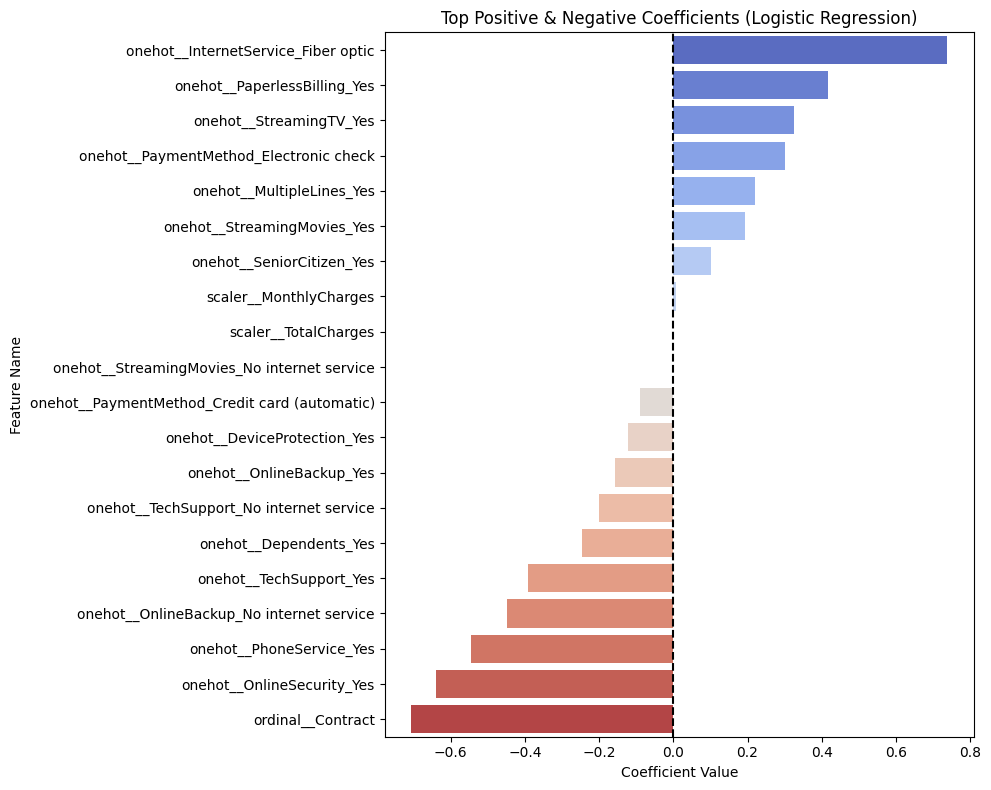

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter koefisien non-zero dan urutkan
nonzero_coef = coef_data_replaced[coef_data_replaced['coefficient'] != 0].sort_values('coefficient', ascending=False)

# Ambil top 20 fitur terbesar dan terkecil
top_coef = pd.concat([nonzero_coef.head(10), nonzero_coef.tail(10)])

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=top_coef, y='feature', x='coefficient', palette='coolwarm')
plt.title('Top Positive & Negative Coefficients (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.axvline(0, color='k', linestyle='--')
plt.tight_layout()
plt.show()

**Konsep Dasar Odds Ratio (OR)**

Odds Ratio mengukur seberapa besar pengaruh suatu faktor terhadap kemungkinan terjadinya churn. 

Rumus: OR = e^{coefficient}
- e ≈ 2.71828 (bilangan Euler)
- coefficient = koefisien dari model regresi logistik

Interpretasi:
- OR Value	Pengaruh terhadap Churn
- OR > 1	Meningkatkan kemungkinan churn
- OR < 1	Menurunkan kemungkinan churn
- OR = 1	Tidak berpengaruh

**Diagram Alur Interpretasi**

<img src="DiagramAlurInterpretasi.png" width="400">

1. Mulai dari koefisien model
2. Hitung OR menggunakan rumus eksponensial
3. Tentukan apakah faktor termasuk:
    - Penyebab churn (OR>1)
    - Pencegah churn (OR<1)

In [145]:
X.drop(columns = 'const').describe().loc[['min','max']]

,tenure,MonthlyCharges,TotalCharges
min,1.000000,18.250000,18.800000
max,72.000000,118.750000,8684.800000


feature	coefficient	odds_ratio

21	scaler__TotalCharges	0.000147	1.000147
20	scaler__MonthlyCharges	0.007206	1.007232
22	scaler__tenure	       -0.048834	0.952339


**INTERPRETASI UNTUK FITUR NUMERIKAL YAITU TOTAL CHARGE**

In [163]:
#INTERPRETASI UNTUK FITUR NUMERIKAL YAITU TOTAL CHARGE
beta_totalcharge = 0.000147 # coef tanpa scaling
c = 1000                  # nilai berapapun dalam rentang nilai total charge (dengan c > d)
d = 100                   # nilai berapapun dalam rentang nilai total charge (dengan c > d)

OR_totalcharge = np.exp(beta_totalcharge * (c-d))
OR_totalcharge

np.float64(1.141450703118025)

Pelanggan dengan total charge sebesar $1000 memiliki resiko churn 1.14 kali lebih besar daripada pelangan dengan pembayaran total senilai $100

In [161]:
1/OR_totalcharge

np.float64(0.8760781322122511)

Pelanggan dengan total charge sebesar $100 memiliki resiko churn 0.87 kali lebih rendah dibandingkan dengan pelanggan yg membayar total tagihan sebesar $1000

**INTERPRETASI UNTUK FITUR NUMERIKAL YAITU MONTHLY CHARGE**

In [170]:
#INTERPRETASI UNTUK FITUR NUMERIKAL YAITU MONTHLY CHARGE
beta_monthlycharge = 0.007206 # coef tanpa scaling
g = 118                  # nilai berapapun dalam rentang nilai monthlycharge (dengan g > h)
h = 18                   # nilai berapapun dalam rentang nilai monthlycharge (dengan g > h)

OR_monthlycharge = np.exp(beta_monthlycharge * (g-h))
OR_monthlycharge

np.float64(2.0556662404422226)

Pelanggan dengan tagihan per bulan sebesar $118 memiliki resiko churn 2.05 kali lebih besar daripada pelangan yang membayar biaya bulanan sebesar $18

In [171]:
1/OR_monthlycharge

np.float64(0.48646029220428133)

Disisi lain, pelanggan yang membayar biaya bulanan sebesar $18 memiliki resiko churn 0.48 kali lebih rendah dibandingkan dengan pelanggan yg tagihan bulanan sebesar $118

**INTERPRETASI UNTUK FITUR NUMERIKAL YAITU TENURE**

In [165]:
# INTERPRETASI UNTUK FITUR NUMERIKAL YAITU TENURE
beta_tenure = -0.048834 # coef tanpa scaling
e = 72                  # nilai berapapun dalam rentang nilai tenure (dengan e > f)
f = 6                   # nilai berapapun dalam rentang nilai tenure (dengan e > f)

OR_tenure = np.exp(beta_tenure * (e-f))
OR_tenure

np.float64(0.03983361998613221)

- Lihat tanda negatif di coef: 
    - Semakin tinggi nilai `tenure` (semakin lama bekerja), maka semakin rendah resiko churn
- Pelanggan dengan lama berlangganan 72 bulan, resiko churn 0.03 kalinya pelanggan yang lama berlangganan nya baru 6 bulan

In [166]:
1/OR_tenure

np.float64(25.104421851394445)

- Pelanggan dengan lama berlangganan 6 bulan, resiko churnnya 25 kali lebih besar dari pelanggan yang lama berlangganan nya sudah 72 bulan

**Analisis Odds Ratio Churn Pelanggan**

| Feature                             | Coefficient | Odds Ratio | Interpretasi |
|-------------------------------------|-------------|-------------|--------------|
| InternetService_Fiber optic         | 0.738328    | 2.092434    | Pelanggan dengan layanan Fiber Optic memiliki risiko 2 kali lebih tinggi untuk churn dibandingkan pelanggan dengan layanan DSL |
| PaperlessBilling_Yes                | 0.416661    | 1.516888    | Pelanggan dengan tagihan digital memiliki risiko churn 1.5 kali lebih tinggi dibandingkan yang menggunakan tagihan kertas |
| StreamingTV_Yes                     | 0.324487    | 1.383321    | Pelanggan yang menggunakan layanan StreamingTV memiliki risiko churn 1.38 kali lebih besar dibandingkan pelanggan tanpa layanan StreamingTV |
| PaymentMethod_Electronic check      | 0.301732    | 1.352198    | Pelanggan yang menggunakan pembayaran dengan elektronik cek memiliki risiko churn 1.35 kali lebih besar dibandingkan metode pembayaran Bank Transfer/Mailed Check |
| MultipleLines_Yes                   | 0.220666    | 1.246907    | Pelanggan yang memiliki layanan MultipleLines memiliki risiko churn 1.24 kali lebih besar dibandingkan pelanggan tanpa layanan MultipleLines |
| StreamingMovies_Yes                 | 0.192369    | 1.212118    | Pelanggan yang menggunakan layanan StreamingMovies memiliki risiko churn 1.21 kali lebih besar dibandingkan pelanggan tanpa layanan StreamingMovies |
| SeniorCitizen_Yes                   | 0.100480    | 1.105702    | Pelanggan lansia memiliki risiko churn 1.10 kali lebih besar dibandingkan pelanggan dengan usia muda |
| TotalCharges **                     | 0.000147    | 1.000147    | Pelanggan dengan total charge sebesar $1000 memiliki resiko churn 1.14 kali lebih besar daripada pelanggan dengan pembayaran total senilai $100. <br> <br> Pelanggan dengan total charge sebesar $100 memiliki resiko churn 0.87 kali lebih rendah dibandingkan dengan pelanggan yg membayar total tagihan sebesar $1000 |
| MonthlyCharges **                   | 0.007206    | 1.007232    | Pelanggan dengan tagihan per bulan sebesar $118 memiliki resiko churn 2.05 kali lebih besar daripada pelanggan yang membayar biaya bulanan sebesar $18. <br> <br> Pelanggan yang membayar biaya bulanan sebesar $18 memiliki resiko churn 0.48 kali lebih rendah dibandingkan dengan pelanggan yg tagihan bulanan sebesar $118 |
| StreamingMovies_No internet service | -0.000139   | 0.999861    | Tidak memiliki internet tidak membuat churn lebih rendah atau lebih tinggi daripada pelanggan yang punya internet tapi tidak pakai StreamingMovies |
| Tenure **                           | -0.048834   | 0.952339    | Pelanggan dengan lama berlangganan 72 bulan, resiko churn 0.03 kalinya pelanggan yang lama berlangganan nya baru 6 bulan. <br><br> Pelanggan dengan lama berlangganan 6 bulan, resiko churnnya 25 kali lebih besar dari pelanggan yang lama berlangganan nya sudah 72 bulan |
| PaymentMethod_Credit card (automatic)| -0.089205  | 0.914658    | Pelanggan yang menggunakan pembayaran dengan Credit Card memiliki kemungkinan churn 0.91 kali lebih rendah dibandingkan dengan pembayaran BankTransfer/MailedCheck |
| DeviceProtection_Yes                | -0.121470   | 0.885618    | Pelanggan yang berlangganan DeviceProtection memiliki kemungkinan churn 0.88 kali lebih rendah dibandingkan pelanggan tanpa layanan DeviceProtection |
| OnlineBackup_Yes                    | -0.157737   | 0.854074    | Pelanggan yang berlangganan OnlineBackup memiliki kemungkinan churn 0.86 kali lebih rendah dibandingkan pelanggan tanpa layanan OnlineBackup |
| TechSupport_No internet service     | -0.199377   | 0.819241    | Pelanggan tanpa internet justru 0.81 lebih kecil risiko churn dibanding pelanggan yang punya internet tapi tidak pakai layanan dukungan teknis |
| Dependents_Yes                      | -0.245881   | 0.782016    | Pelanggan yang memiliki tanggungan (Dependent) mempunyai kemungkinan churn 0.78 kali lebih rendah dibandingkan pelanggan yang tidak memiliki tanggungan |
| TechSupport_Yes                     | -0.391371   | 0.676129    | Pelanggan yang berlangganan TechSupport memiliki kemungkinan churn 0.67 kali lebih rendah dibandingkan pelanggan tanpa layanan TechSupport |
| OnlineBackup_No internet service    | -0.447965   | 0.638927    | Pelanggan tanpa layanan internet memiliki kemungkinan churn 0.64 kali lebih rendah dibandingkan pelanggan yang punya internet tapi tidak pakai OnlineBackup. Artinya, pelanggan yang tidak punya internet justru lebih loyal daripada yang punya internet tapi tidak pakai layanan tambahan. |
| PhoneService_Yes                    | -0.545034   | 0.579822    | Pelanggan yang berlangganan PhoneService memiliki kemungkinan churn 0.57 kali lebih rendah dibandingkan pelanggan tanpa layanan PhoneService |
| OnlineSecurity_Yes                  | -0.638105   | 0.528293    | Pelanggan yang berlangganan OnlineSecurity memiliki kemungkinan churn 0.52 kali lebih rendah dibandingkan pelanggan tanpa layanan OnlineSecurity |
| Contract                            | -0.705923   | 0.493653    | Semakin panjang jangka waktu kontrak (misal: kontrak 1 atau 2 tahun dibandingkan bulanan), maka kemungkinan churn 0.49 kali lebih rendah |
| InternetService_No                  | 0.000000    | 1.000000    | Tidak Berpengaruh |
| StreamingTV_No internet service     | 0.000000    | 1.000000    | Tidak Berpengaruh |

> **Catatan:**  
> - **Fitur Numerik (TotalCharges, MonthlyCharges, Tenure)** dianalisis berdasarkan perubahan nilai spesifik (misal: $100 → $1000, 6 → 72 bulan).  
> - Interpretasi untuk fitur "No Internet Service" disesuaikan terhadap pelanggan yang **punya internet namun tidak pakai layanan terkait**.

## **VII. Conclusion**

**Kesimpulan Faktor Penentu Keputusan Churn Pelanggan**

Berdasarkan analisis Odds Ratio, berikut faktor-faktor kritis yang mempengaruhi keputusan churn:

**1. Faktor Pendorong Churn**

Faktor-faktor berikut meningkatkan kemungkinan pelanggan melakukan churn:

- **Layanan Fiber Optic** → Risiko churn **2 kali lebih tinggi** dibandingkan pelanggan dengan layanan DSL.
- **Tagihan tanpa kertas (Paperless Billing)** → Pelanggan dengan tagihan digital memiliki kemungkinan churn **1.5 kali lebih tinggi**.
- **Pembayaran dengan Electronic Check** → Meningkatkan risiko churn hingga **1.35 kali lebih tinggi** dibanding metode lain.
- **StreamingTV dan StreamingMovies** → Kedua layanan ini meningkatkan risiko churn sekitar **1.2 – 1.38 kali lebih tinggi**.
- **Biaya Bulanan Tinggi (MonthlyCharges)** → Pelanggan yang membayar lebih mahal per bulan cenderung lebih berisiko churn.
- **Total Tagihan (TotalCharges) Tinggi** → Semakin besar total yang dibayar pelanggan, semakin tinggi kemungkinan churn (meskipun dampaknya kecil).
- **Pelanggan Lansia (SeniorCitizen)** → Memiliki sedikit peningkatan risiko churn dibanding pelanggan lebih muda.

**2. Faktor Pelindung terhadap Churn**

Faktor-faktor ini menurunkan kemungkinan pelanggan melakukan churn:

- **Kontrak Jangka Panjang (Contract)** → Menurunkan risiko churn hingga **50% lebih rendah** dibanding kontrak bulanan.
- **Lama Berlangganan (Tenure)** → Pelanggan lama memiliki kecenderungan **jauh lebih setia** (misal: 72 bulan vs 6 bulan → risiko turun drastis).
- **OnlineSecurity, TechSupport, dan OnlineBackup** → Ketiganya secara signifikan menurunkan kemungkinan churn (**risiko 0.52–0.67 kali lebih kecil**).
- **PhoneService** → Pelanggan yang menggunakan layanan telepon juga menunjukkan risiko churn yang lebih rendah.
- **Tidak Memiliki Layanan Internet** → Uniknya, pelanggan yang **tidak memiliki akses internet** justru cenderung **lebih loyal** dibanding yang punya internet tapi tidak memakai fitur tambahannya (misalnya OnlineBackup/TechSupport).

**3. Faktor Netral atau Tidak Signifikan**

Beberapa fitur memiliki pengaruh sangat kecil atau tidak signifikan secara statistik terhadap keputusan churn:

- `MultipleLines`
- `DeviceProtection`
- `Dependents`
- `StreamingMovies_No internet service`
- `TechSupport_No internet service`
- `OnlineBackup_No internet service`
- `PaymentMethod_Credit card (automatic)`
- `InternetService_No`
- `StreamingTV_No internet service`


> 📌 **Catatan Penting:**  
> - Untuk fitur numerik seperti `MonthlyCharges`, `TotalCharges`, dan `Tenure`, interpretasi harus dilakukan dengan membandingkan nilai aktual (misal: $100 vs $1000, atau 6 bulan vs 72 bulan), bukan sekadar dari koefisien model.

## **VIII. Recommendation**

**Rekomendasi Bisnis Berdasarkan Peran Stakeholder**

1. **Manajemen Eksekutif**

> Fokus: *Pengambilan keputusan strategis dan alokasi sumber daya*

| **Isu & Data**                                                             | **Rekomendasi Strategi**                                                                                                                                   |
| -------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Fiber Optic (OR = 2.09): risiko churn tinggi**                           | - Audit kualitas jaringan dan kepuasan pelanggan fiber optic per kuartal (target NPS ≥ 40)<br>- Survei churner untuk identifikasi 3 alasan utama berpindah |
| **Metode pembayaran Electronic Check (OR = 1.35)**                         | - Insentif migrasi 5% ke metode autodebit/kartu kredit (target: konversi 30% dalam 3 bulan)<br>- Reminder jatuh tempo otomatis via WhatsApp/SMS            |
| **Kontrak jangka panjang (OR = 0.49): proteksi churn kuat**                | - Diskon 10–15% untuk upgrade dari kontrak bulanan ke tahunan (target uptake 25%)<br>- Bonus upgrade kecepatan 20 Mbps bagi yang perpanjang lebih awal     |
| **Tenure pelanggan: <6 bulan = 25× lebih rentan churn dibanding 72 bulan** | - Program onboarding 90 hari dengan edukasi layanan (target churn <15% dalam 3 bulan)<br>- Loyalty cashback Rp50.000 setelah bertahan 12 bulan             |
| **Tagihan bulanan tinggi (MonthlyCharges > Rp1,600.000)**                  | - Review ulang struktur harga untuk pelanggan high-bill, uji coba diskon adaptif berbasis segmentasi ARPU (target churn turun 10%)                         |


2. **Tim Pemasaran**

> Fokus: *Eksekusi program retensi & kampanye pelanggan*

| **Isu & Data**                                                                 | **Rekomendasi Strategi**                                                                                                                           |
| ------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Paperless Billing (OR = 1.52): risiko churn tinggi pelanggan digital-savvy** | - Kampanye edukasi manfaat + loyalty tier (target kepuasan >80%)<br>- Jalur cepat penanganan keluhan pelanggan paperless melalui WhatsApp Business |
| **OnlineSecurity (OR = 0.53) & TechSupport (OR = 0.67): pelindung churn kuat** | - Bundling add-on pelindung churn: OnlineSecurity + TechSupport diskon 30% (target aktivasi add-on +20%)                                           |
| **Pelanggan tidak punya layanan tambahan (add-on)**                            | - Segmentasi pelanggan “low engagement” dan kirim penawaran add-on protektif (target konversi bundling 25% dalam 6 bulan)                          |
| **SeniorCitizen & Dependents: churn relatif rendah**                           | - Buat loyalty program khusus segmen keluarga & lansia, seperti “Family Plan” dengan harga spesial atau bonus kuota                                |
| **StreamingTV & StreamingMovies (OR >1.2): pendorong churn ringan**            | - Tawarkan diskon add-on lainnya jika pelanggan sudah menggunakan streaming (contoh: TechSupport), untuk menyeimbangkan risiko churn               |


**Recomendation untuk pengembangan model**
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain SMOTE, seperti SMOTENC, ADASYN, Cluster-Based, dsb 
- Menambahkan kolom-kolom baru yang berhubungan dengan perilaku pelanggan secara lebih mendetail, seperti:
  - Pola Pembayaran: Keterlambatan, metode, frekuensi.
  - Penggunaan Layanan: Trend pemakaian, komplain.
  - Interaksi: Riwayat hubungi CS, klik halaman berhenti berlangganan.
- Mencoba metric evaluasi lain seperti F1 Score atau F2 Score untuk melihat keseimbangan antara kelas positif dan negatif

**Limitasi Model**
- TotalCharges tidak akurat sepenuhnya, karena hasil kalkulasi manual tidak sesuai — kemungkinan ada biaya tambahan yang tidak tersedia di dataset.
- Informasi perilaku pelanggan masih terbatas, seperti riwayat komplain, keterlambatan pembayaran, atau alasan berhenti.
- Model bersifat statis, belum mempertimbangkan perubahan perilaku pelanggan dari waktu ke waktu.
- Kemungkinan relasi non-linear tidak ditangkap dengan baik karena model utama yang digunakan adalah Logistic Regression. Artinya: Model Logistic Regression hanya mampu menangkap hubungan linear antara fitur dan target (churn/tidak churn).
Jika ada pola hubungan non-linear (misalnya, efek gabungan atau pengaruh tidak langsung antar fitur), maka Logistic Regression mungkin tidak bisa mengenalinya dengan baik, sehingga akurasi model bisa menurun.
- Ketidakseimbangan data tetap bisa memengaruhi performa meskipun sudah dilakukan penanganan.

## **IX. Business Implementation**

##### **Analisis Dampak Finansial: Model Prediksi Churn vs. Tanpa Intervensi**  
*Estimasi Penghematan hingga 88% dengan Machine Learning*

**Asumsi Dasar**  
| Metric | Nilai |  
|--------|-------|  
| Total pelanggan (data test) | 1.407 |  
| Pendapatan per pelanggan/bulan | \$64.76 |  
| Biaya akuisisi pelanggan baru | \$140 |  
| Biaya retensi per pelanggan | \$7 |  


- **Skenario 1: Tanpa Model Prediksi**  
**Churn Rate:** 27% (≈380 pelanggan)  

| Konsekuensi | Perhitungan | Total |  
|-------------|-------------|-------|  
| Kehilangan pendapatan tahunan | 380 × \$64.76 × 12 | **\$295,305** |  
| Biaya akuisisi pengganti | 380 × \$140 | **\$53,200** |  
| **Total kerugian tahunan** | | **\$348,505** |  

- **Skenario 2: Dengan Model Prediksi**  
    **Hasil Klasifikasi Model:**  
    - **False Negative (FN):** 72 pelanggan churn (tidak terdeteksi)  
    - **False Positive (FP):** 316 pelanggan loyal (terdeteksi salah)  

| Biaya | Perhitungan | Total |  
|-------|-------------|-------|  
| Kehilangan pendapatan (FN) | 72 × \$64.76 × 12 | **\$55,952** |  
| Biaya akuisisi (FN) | 72 × \$140 | **\$10.080** |  
| Biaya retensi (TP + FP) | (302 + 316) × \$7 | **\$4.326** |  
| **Total biaya dengan model** | | **\$70,358** |  

**Dampak Finansial**

Dengan menggunakan model prediksi churn, perusahaan dapat:

* **Menghemat hingga \$278,147 per tahun (80%)**
* **Mengurangi jumlah pelanggan yang churn** secara signifikan:
  dari 380 menjadi hanya 72 pelanggan
* **Meningkatkan efisiensi biaya retensi**, dengan hanya 618 pelanggan yang menerima promosi (dibandingkan seluruh basis pelanggan)

Walaupun masih terdapat **316 pelanggan loyal** yang salah diklasifikasikan dan menimbulkan **pemborosan biaya retensi sebesar \$2.212**, angka ini jauh lebih kecil dibandingkan kerugian dalam skenario tanpa model.

> **Kesimpulan:** Model prediksi churn ini terbukti sebagai alat yang **efektif dan strategis** untuk membantu mengurangi potensi biaya akuisisi yang tinggi. Selain itu, model ini dapat dimanfaatkan sebagai rekomendasi berbasis data yang memberikan arah yang lebih tepat bagi pengambilan keputusan perusahaan.


**Saving model**

In [172]:
# !pip install joblib

In [173]:
# # Menggunakan joblib untuk menyimpan model pipeline hasil tuning
# import joblib

# # Pastikan model_tuned adalah pipeline yang berisi seluruh langkah
# joblib.dump(model_tuned, 'LogisticRegressionModel4.pkl')

# # Alternatif dengan pickle
# import pickle

# # Simpan model pipeline hasil tuning
# with open('LogisticRegressionModel3.pkl', 'wb') as f:
#     pickle.dump(model_tuned, f)


In [174]:
# # Kolom untuk transformer
# onehot_var = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
#               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
#               'PaymentMethod', 'gender', 'Partner', 'Dependents', 'PhoneService', 
#               'PaperlessBilling']
# ordinal_var = ['Contract']
# numeric_vars = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# # Buat transformer
# transformer = ColumnTransformer([
#     ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_var),
#     ('ordinal', OrdinalEncoder(), ordinal_var),
#     ('numeric', 'passthrough', numeric_vars)
# ])

# # Latih transformer menggunakan dataset Anda
# transformer.fit(X_train)

# X_transformed = transformer.transform(X_train)

# import pickle

# with open('transformer.pkl', 'wb') as f:
#     pickle.dump(transformer, f)